                                     Deep Learning Assignment 

Team Members: 

1. Naghul Krishna  -  G24AIT2023
2. Anusharas Thirunavukkarasu - G24AIT2028
3. Shyam Kumar Catari  - G24AIT2101

Problem: 
Implement the Sparse auto-encoder and the Contractive Auto-encoder. Use the MNIST digit dataset for
training your network. Use the U-Net auto-encoder architecture for encoder and decoder without skip
connections. Let E be the trained encoder and D be the trained decoder, h = E(I) be the embedding of
an image I and letˆI = D(h) be the output of the decoder.

(a) (20 points) Plot the t-sne (use inbuilt function) on the embeddings obtained using the respective
auto-encoders. Color the clusters using the respective ground-truth class labels.




In [2]:
#pip install tensorflow

In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.linear_model import LogisticRegression # A simple, effective classifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier # Another option
from sklearn.svm import SVC # Support Vector Classifier, can be good

# ---##--- Data Loading and Preprocessing ---
# Loading the MNIST dataset, which consists of handwritten digits into variables mn_train and mn_test.
# Normalize pixel values from [0, 255] to [0, 1] for better neural network training.
# This helps with convergence and prevents large input values from dominating the loss.
(mn_train, _), (mn_test, _) = keras.datasets.mnist.load_data()
mn_train = mn_train.reshape((mn_train.shape[0], -1)).astype('float32') / 255.0
mn_test = mn_test.reshape((mn_test.shape[0], -1)).astype('float32') / 255.0

(60000, 784, 1)
(10000, 784, 1)
(60000, 28, 28, 1)
(10000, 28, 28, 1)
Shape after 1st convolutional layer with (32 filters, 3x3 kernel, same padding): (None, 28, 28, 32)
Shape after 1st encoder (2x2 pool, same padding): (None, 14, 14, 32)
Shape after 2nd convolutional layer with (64 filters, 3x3 kernel, same padding): (None, 14, 14, 64)
Shape after latent_space (2x2 pool, same padding): (None, 7, 7, 64)

Model architecture summary:


Model: "Convolutional_Autoencoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ encoder_conv1 (Conv2D)          │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ encoder_pool1 (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ encoder_conv2 (Conv2D)          │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ latent_space (MaxPooling2D)     │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder_conv1 (Conv2DTranspose) │ (None, 7, 7, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder_upsample1               │ (None, 14, 14, 64)     │             0 │
│ (UpSampling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder_conv2 (Conv2DTranspose) │ (None, 14, 14, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder_upsample2               │ (None, 28, 28, 32)     │             0 │
│ (UpSampling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_reconstruction (Conv2D)  │ (None, 28, 28, 1)      │           289 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 74,497 (291.00 KB)

 Trainable params: 74,497 (291.00 KB)

 Non-trainable params: 0 (0.00 B)


Starting model training...
Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 51s 102ms/step - loss: 0.1894 - val_loss: 0.0733
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 46s 99ms/step - loss: 0.0729 - val_loss: 0.0694
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 45s 95ms/step - loss: 0.0697 - val_loss: 0.0679
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 48s 102ms/step - loss: 0.0682 - val_loss: 0.0668
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 49s 105ms/step - loss: 0.0672 - val_loss: 0.0662
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 49s 104ms/step - loss: 0.0663 - val_loss: 0.0655
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 51s 108ms/step - loss: 0.0659 - val_loss: 0.0651
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 48s 102ms/step - loss: 0.0655 - val_loss: 0.0650
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 63s 135ms/step - loss: 0.0651 - val_loss: 0.0645
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 69s 107ms/step - loss: 0.0649 - val_loss: 0.0643
Model training finished.

Reconstructing images from the test set...
313/313 ━━━━━━

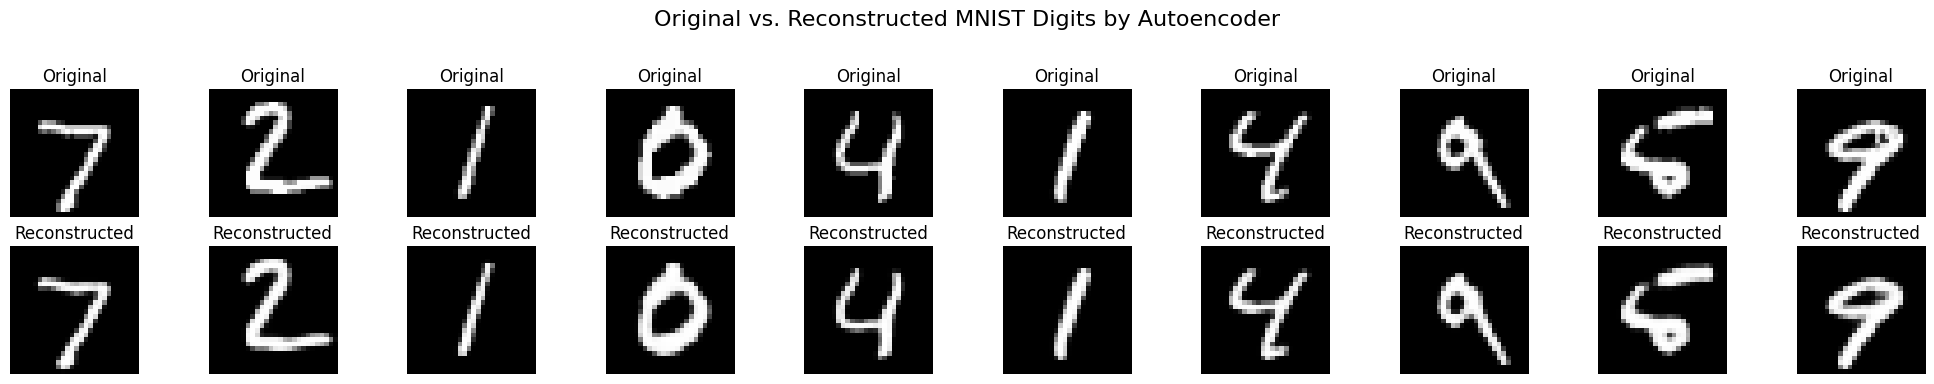

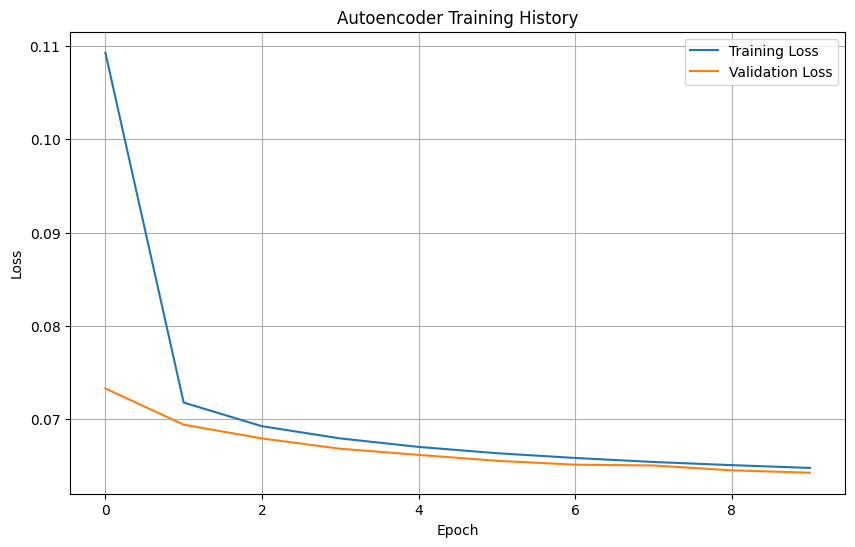

In [4]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

# Add a channel dimension to the images. MNIST images are grayscale, so they have 28x28 dimensions.
# Keras Conv2D layers expect input in the format (batch_size, height, width, channels).
mn_train = np.expand_dims(mn_train, axis=-1)
mn_test = np.expand_dims(mn_test, axis=-1)

print(mn_train.shape)
print(mn_test.shape)

mn_train = mn_train.reshape(-1, 28, 28, 1)
mn_test = mn_test.reshape(-1, 28, 28, 1)

print(mn_train.shape)
print(mn_test.shape)

# --- Autoencoder Model Definition ---
# Create a function called autoencoder_mn that takes the image as input. 
# Applying U-Net encoder-decoder structure and without skip connections 
#    This architecture does not include skip connections, meaning there are no
#    direct concatenations of feature maps from the encoder to the decoder at corresponding
#    spatial resolutions.
def autoencoder_mn():
    # Input layer expects grayscale images of 28x28 ( Height, Weight and 1 for grey-scale to indicate color channel).
    inputs = layers.Input(shape=(28, 28, 1))

    # Encoder Pathway: Compresses the input image into a latent representation.
    # Using Conv2D layer to extract features
    # For the 1st convolutional layer we use 32 filter's with a filter-size of 3 * 3 
    # Using MaxPooling2D downsample the spatial dimensions.
    # Padding='same' ensures output feature maps have the same spatial dimensions as input (before pooling).
    # For the 2nd convolutional layer we use 64 filters to learn more complex features with a filter-size of 3 * 3 

    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same', name='encoder_conv1')(inputs)
    print(f"Shape after 1st convolutional layer with (32 filters, 3x3 kernel, same padding): {x.shape}")

    x = layers.MaxPooling2D((2, 2), padding='same', name='encoder_pool1')(x) # Output: 14x14x32
    print(f"Shape after 1st encoder (2x2 pool, same padding): {x.shape}") # (None, 14, 14, 32)

    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same', name='encoder_conv2')(x)
    print(f"Shape after 2nd convolutional layer with (64 filters, 3x3 kernel, same padding): {x.shape}")
    
    encoded = layers.MaxPooling2D((2, 2), padding='same', name='latent_space')(x) # Output: 7x7x64 (bottleneck)
    print(f"Shape after latent_space (2x2 pool, same padding): {encoded.shape}") # (None, 7, 7, 64)
    

    # Decoder Pathway: Reconstructs the image from the latent representation.
    # Conv2DTranspose (or 'deconvolution') upsamples the features, and UpSampling2D increases spatial dimensions.
    y = layers.Conv2DTranspose(64, (3, 3), activation='relu', padding='same', name='decoder_conv1')(encoded)
    y = layers.UpSampling2D((2, 2), name='decoder_upsample1')(y) # Output: 14x14x64
    y = layers.Conv2DTranspose(32, (3, 3), activation='relu', padding='same', name='decoder_conv2')(y)
    y = layers.UpSampling2D((2, 2), name='decoder_upsample2')(y) # Output: 28x28x32
    
    # Output layer: Uses a single channel (1) for grayscale image reconstruction.
    # Sigmoid activation scales pixel values to [0, 1], matching the input normalization.
    outputs = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same', name='output_reconstruction')(y)

    # Create the Keras model, linking inputs to outputs.
    model = models.Model(inputs, outputs, name='Convolutional_Autoencoder')
    return model

# --- Model Compilation and Training ---
# Build the autoencoder model instance - autoencoder_mn_in1.
autoencoder_mn_in1 = autoencoder_mn()

# Model Compilation using optimizer 'adam', Loss function - 'binary_crossentropy'.:
autoencoder_mn_in1.compile(optimizer='adam', loss='binary_crossentropy')

# Display the model's architecture summary, including layer names and output shapes.
print("\nModel architecture summary:")
autoencoder_mn_in1.summary()

# Train the autoencoder:
# - mn_train is used as both input and target (autoencoders learn to reconstruct their input).
# - epochs: Number of passes over the entire dataset.
# - batch_size: Number of samples per gradient update.
# - validation_data: Data used to monitor loss on unseen examples during training.
print("\nStarting model training...")
history = autoencoder_mn_in1.fit(
    mn_train, mn_train,
    epochs=10,
    batch_size=128,
    validation_data=(mn_test, mn_test)
)
print("Model training finished.")

# --- Evaluation and Visualization ---
# Use the trained autoencoder ( autoencoder_mn_in1 ) to predict (reconstruct) images from the test set (mn_test).
print("\nReconstructing images from the test set...")
decoded_imgs = autoencoder_mn_in1.predict(mn_test)
print("Image reconstruction complete.")

# Plot original and reconstructed images for visual comparison.
n = 10 # Number of test images to display
plt.figure(figsize=(20, 4)) # Figure size for better visibility
for i in range(n):
    # Display Original Image
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(mn_test[i].squeeze(), cmap='gray') # .squeeze() removes single-dimensional entries (e.g., the channel dim)
    plt.title("Original")
    plt.axis("off") # Hide axes for cleaner image display

    # Display Reconstructed Image
    ax = plt.subplot(2, n, i + 1 + n) # Plotting in the second row
    plt.imshow(decoded_imgs[i].squeeze(), cmap='gray')
    plt.title("Reconstructed")
    plt.axis("off") # Hide axes
plt.suptitle("Original vs. Reconstructed MNIST Digits by Autoencoder", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent title overlap
plt.show()

# Optional: Plot training history (loss over epochs)
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Autoencoder Training History')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

First build 2 different u-net auto-encoder and auto-decoder: 

Function name:
1. build_unet_encoder
2. build_unet_decoder


In [5]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE # For t-SNE dimensionality reduction
import seaborn as sns # For better t-SNE plotting

# Set a random seed for reproducibility
tf.random.set_seed(42)
np.random.seed(42)

# --- Load and Preprocess MNIST Dataset ---
print("Loading and preprocessing MNIST dataset...")
(mn_train_images, mn_train_labels), (mn_test_images, mn_test_labels) = keras.datasets.mnist.load_data()

# Normalize pixel values to [0, 1]
mn_train_images = mn_train_images.astype('float32') / 255.
mn_test_images = mn_test_images.astype('float32') / 255.

# Add a channel dimension to the images. MNIST images are grayscale, so they have 28x28 dimensions.
# Keras Conv2D layers expect input in the format (batch_size, height, width, channels).
mn_train = np.expand_dims(mn_train_images, axis=-1)
mn_test = np.expand_dims(mn_test_images, axis=-1)

print(f"Original training data shape: {mn_train_images.shape}")
print(f"Original test data shape: {mn_test_images.shape}")
print(f"Training data shape after adding channel: {mn_train.shape}")
print(f"Test data shape after adding channel: {mn_test.shape}")

# Defining input shape for models
input_shape = mn_train.shape[1:] 
# Dimensionality of the latent space embedding
latent_dim = 64 

# --- Modular U-Net-like Encoder and Decoder Definitions ---

def build_unet_encoder(input_shape=(28, 28, 1), latent_dim=32):
    """
    Builds the encoder part of the U-Net-like autoencoder (without skip connections).
    
    Args:
        input_shape (tuple): Shape of the input images (e.g., (28, 28, 1) for MNIST).
        latent_dim (int): Dimensionality of the latent space embedding.
        
    Returns:
        tf.keras.Model: The encoder model.
    """
    inputs = keras.Input(shape=input_shape)

    # Encoder Pathway: Compresses the input image into a latent representation.
    # Using Conv2D layer to extract features
    # Padding='same' ensures output feature maps
    
    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same', name='encoder_conv1')(inputs)
    x = layers.MaxPooling2D((2, 2), padding='same', name='encoder_pool1')(x) # Output: 14x14x32

    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same', name='encoder_conv2')(x)
    
    # Bottleneck layer - this is the input to the dense layer for the latent space
    # We use another MaxPooling to get to the 7x7 spatial dimension.
    x = layers.MaxPooling2D((2, 2), padding='same', name='encoder_pool2_bottleneck')(x) # Output: 7x7x64
    
    # Flatten and Dense layer for latent space (embedding)
    x = layers.Flatten()(x)
    e = layers.Dense(latent_dim, activation='relu', name='encoder_output_embedding')(x)
    
    return keras.Model(inputs, e, name='encoder')

def build_unet_decoder(latent_dim=32, output_shape=(28, 28, 1)):
    """
    Builds the decoder part of the U-Net-like autoencoder (without skip connections).
    
    Args:
        latent_dim (int): Dimensionality of the latent space embedding.
        output_shape (tuple): Desired shape of the output images.
        
    Returns:
        tf.keras.Model: The decoder model.
    """
    latent_inputs = keras.Input(shape=(latent_dim,), name='decoder_latent_input')

    # Reshape latent vector to start upsampling
    # This reshape needs to match the output shape before flattening in the encoder.
    # encoder's last Conv2D output was 7x7x64 before flattening, so need to reshape
    x = layers.Dense(7 * 7 * 64, activation='relu', name='decoder_dense_from_latent')(latent_inputs)
    x = layers.Reshape((7, 7, 64), name='decoder_reshape_to_spatial')(x)

    # Decoder Pathway: Reconstructs the image from the latent representation.
    # Conv2DTranspose (or 'deconvolution') upsamples the features, and UpSampling2D increases spatial dimensions.
    
    # First upsampling to 14x14
    x = layers.Conv2DTranspose(64, (3, 3), activation='relu', padding='same', name='decoder_convT1')(x)
    x = layers.UpSampling2D((2, 2), name='decoder_upsample1')(x) # Output: 14x14x64
    
    # Second upsampling to 28x28
    x = layers.Conv2DTranspose(32, (3, 3), activation='relu', padding='same', name='decoder_convT2')(x)
    x = layers.UpSampling2D((2, 2), name='decoder_upsample2')(x) # Output: 28x28x32
    
    # Output layer: Uses a single channel (1) for grayscale image reconstruction.
    # Sigmoid activation scales pixel values to [0, 1], matching the input normalization.
    d = layers.Conv2D(output_shape[-1], (3, 3), activation='sigmoid', padding='same', name='decoder_output_reconstruction')(x) # Renamed to 'd' as per request

    return keras.Model(latent_inputs, d, name='decoder')



Loading and preprocessing MNIST dataset...
Original training data shape: (60000, 28, 28)
Original test data shape: (10000, 28, 28)
Training data shape after adding channel: (60000, 28, 28, 1)
Test data shape after adding channel: (10000, 28, 28, 1)


Next we create 2 different encoder's
1. Sparse-Encoder-Decoder   function by name     :  create_sparse_autoencoder
2. Contractive-Encoder-Decoder  function by name :  create_contractive_autoencoder


Next we build a function to train the auto-encoder and auto-decoder . 
This function centralizes the training logic, making your main code cleaner and easier to manage, especially when training multiple similar models like your Sparse and Contractive Autoencoders.

1. train_autoencoder - That will train the model for the respective and return model history. 

Next we build function to plot the 
plot_tsne_embeddings


In [6]:
def create_sparse_autoencoder(input_shape=(28, 28, 1), latent_dim=64, activity_regularizer_strength=1e-5):
    """
    Creates a Sparse Autoencoder using the U-Net-like encoder and decoder.
    Applies L1 activity regularization to the latent space for sparsity.
    
    Input arguements : 1.Shape of the input images. 2. Dimensionality of the latent space. 
                    3. Strength of the L1 activity regularizer for sparsity.
    Returns:
        tf.keras.Model: The Sparse Autoencoder model.
        tf.keras.Model: The encoder model (e).
        tf.keras.Model: The decoder model (d).
    """
    e = build_unet_encoder(input_shape, latent_dim)
    d = build_unet_decoder(latent_dim, input_shape)

    inputs = keras.Input(shape=input_shape, name='sparse_ae_input')
    h = e(inputs) # Get the embedding from the encoder
    
    # Apply L1 activity regularizer to the latent space for sparsity
    h = layers.ActivityRegularization(l1=activity_regularizer_strength, name='sparse_regularization')(h) 
    
    reconstruction = d(h) # Reconstruct using the decoder

    autoencoder = keras.Model(inputs, reconstruction, name='sparse_autoencoder')
    return autoencoder, e, d

def create_contractive_autoencoder(input_shape=(28, 28, 1), latent_dim=64):
    """
    Creates a Contractive Autoencoder structure using the U-Net-like encoder and decoder.
   
    Args: 1. Shape of the input images. 2. Dimensionality of the latent space.
        
    Returns:
        tf.keras.Model: The Contractive Autoencoder model.
        tf.keras.Model: The encoder model (e).
        tf.keras.Model: The decoder model (d).
    """
    e = build_unet_encoder(input_shape, latent_dim)
    d = build_unet_decoder(latent_dim, input_shape)

    inputs = keras.Input(shape=input_shape, name='contractive_ae_input')
    h = e(inputs) # Get the embedding from the encoder
    reconstruction = d(h) # Reconstruct using the decoder

    autoencoder = keras.Model(inputs, reconstruction, name='contractive_autoencoder')
    
    return autoencoder, e, d

def train_autoencoder(model, train_data, epochs, batch_size, optimizer, loss_fn, validation_data=None):
    """
    A function for training the autoencoder.
    
    Args:
        model (tf.keras.Model): The autoencoder model to train.
        train_data (np.array): Training input data (images).
        epochs (int): Number of training epochs.
        batch_size (int): Batch size for training.
        optimizer (tf.keras.optimizers.Optimizer): Optimizer to use for training.
        loss_fn (tf.keras.losses.Loss): Loss function for training (e.g., MeanSquaredError).
        validation_data (tuple, optional): A tuple of (validation_inputs, validation_targets).
                                           For autoencoders, this is typically (val_images, val_images).
    """
    print(f"\nTraining {model.name}...")
    model.compile(optimizer=optimizer, loss=loss_fn)
    
    # Fit the model to the training data  
    model_history = model.fit(
        train_data, train_data, # Autoencoders train on X, X
        epochs=epochs,
        batch_size=batch_size,
        shuffle=True,
        validation_data=(validation_data, validation_data) if validation_data is not None else None,
        verbose=1
    )
    print(f"Finished training {model.name}.")
    return model_history

def plot_tsne_embeddings(encoder_model, data, labels, title):
    """
    Plots t-SNE embeddings of the latent space, colored by ground-truth labels.

    T-distributed Stochastic Neighbor Embedding (t-SNE) is a non linear dimensionality reduction technique 
    used for visualizing high-dimensional data in a lower-dimensional space mainly in 2D or 3D. 
    Unlike linear methods such as Principal Component Analysis (PCA), 
    t-SNE focus on preserving the local structure and pattern of the data.
    Reference: https://www.geeksforgeeks.org/machine-learning/ml-t-distributed-stochastic-neighbor-embedding-t-sne-algorithm/

    Args:
        encoder_model (tf.keras.Model): The trained encoder model (e).
        data (np.array): Input images to generate embeddings from.
        labels (np.array): Ground-truth class labels for coloring the clusters.
        title (str): Title for the t-SNE plot.
    """
    print(f"\nGenerating t-SNE plot for {title}...")
    # Get embeddings (h) from the encoder
    embeddings = encoder_model.predict(data)

    # Perform t-SNE dimensionality reduction
    tsne = TSNE(n_components=2, random_state=42, perplexity=30) 
    tsne_embeddings = tsne.fit_transform(embeddings)

    # Plotting
    plt.figure(figsize=(10, 8))
    sns.scatterplot(
        x=tsne_embeddings[:, 0], y=tsne_embeddings[:, 1],
        hue=labels, 
        palette=sns.color_palette("tab10", n_colors=len(np.unique(labels))), 
        legend='full', 
        alpha=0.7, 
        s=15 
    )
    plt.title(f't-SNE of {title} Embeddings (Colored by Class)', fontsize=16)
    plt.xlabel('t-SNE Component 1', fontsize=12)
    plt.ylabel('t-SNE Component 2', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()
    print(f"t-SNE plot for {title} generated.")


Creating main block function for sparse and contradictive encoder. 

Function: 

1. main_sparse_autoencoder
2. main_contractive_autoencoder


In [7]:
# --- Main Execution Block ---
def main_sparse_autoencoder():
    # Common training parameters
    epochs = 20    # Increased epochs for better training
    batch_size = 128
    optimizer = keras.optimizers.Adam(learning_rate=1e-3)
    loss_fn = keras.losses.MeanSquaredError() 

    # --- 1. Sparse Autoencoder Implementation and Training ---
    print("\n--- Implementing and Training Sparse Autoencoder ---")
    # 'e_sparse' is the encoder and 'd_sparse' is the decoder for the sparse AE
    sparse_autoencoder, e_sparse, d_sparse = create_sparse_autoencoder(input_shape, latent_dim, activity_regularizer_strength=1e-5)
    sparse_autoencoder.summary()

    # Train the Sparse Autoencoder
    sparse_history = train_autoencoder(sparse_autoencoder, mn_train, epochs, batch_size, optimizer, loss_fn, mn_test)

    # Plot t-SNE on embeddings obtained from the Sparse Autoencoder
    plot_tsne_embeddings(e_sparse, mn_test, mn_test_labels, "Sparse Autoencoder Latent Space")

    # Plot training history for Sparse Autoencoder
    plt.figure(figsize=(10, 6))
    plt.plot(sparse_history.history['loss'], label='Sparse AE Training Loss')
    plt.plot(sparse_history.history['val_loss'], label='Sparse AE Validation Loss')
    plt.title('Sparse Autoencoder Training History')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

  

In [8]:
def main_contractive_autoencoder():
    # Common training parameters
    epochs = 20 # Increased epochs for potentially training
    batch_size = 128
    optimizer = keras.optimizers.Adam(learning_rate=1e-3)
    loss_fn = keras.losses.MeanSquaredError() # Using MSE for reconstruction

  # --- 2. Contractive Autoencoder Implementation and Training ---
    print("\n--- Implementing and Training Contractive Autoencoder ---")
    # 'e_contractive' is the encoder and 'd_contractive' is the decoder for the contractive AE
    contractive_autoencoder, e_contractive, d_contractive = create_contractive_autoencoder(input_shape, latent_dim)
    contractive_autoencoder.summary()

    # Train the Contractive Autoencoder
    contractive_history = train_autoencoder(contractive_autoencoder, mn_train, epochs, batch_size, optimizer, loss_fn, mn_test)

    # Plot t-SNE on embeddings obtained from the Contractive Autoencoder
    plot_tsne_embeddings(e_contractive, mn_test, mn_test_labels, "Contractive Autoencoder Latent Space")

    # Plot training history for Contractive Autoencoder
    plt.figure(figsize=(10, 6))
    plt.plot(contractive_history.history['loss'], label='Contractive AE Training Loss')
    plt.plot(contractive_history.history['val_loss'], label='Contractive AE Validation Loss')
    plt.title('Contractive Autoencoder Training History')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()


Call the main_sparse_autoencoder() function 

This function would train the model, generate the tsne plot 


--- Implementing and Training Sparse Autoencoder ---


Model: "sparse_autoencoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sparse_ae_input (InputLayer)    │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ encoder (Functional)            │ (None, 64)             │       219,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sparse_regularization           │ (None, 64)             │             0 │
│ (ActivityRegularization)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder (Functional)            │ (None, 28, 28, 1)      │       259,521 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 479,105 (1.83 MB)

 Trainable params: 479,105 (1.83 MB)

 Non-trainable params: 0 (0.00 B)


Training sparse_autoencoder...
Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 61s 122ms/step - loss: 0.0761 - val_loss: 0.0265
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 62s 132ms/step - loss: 0.0256 - val_loss: 0.0231
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 54s 114ms/step - loss: 0.0229 - val_loss: 0.0214
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 60s 128ms/step - loss: 0.0215 - val_loss: 0.0205
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 63s 135ms/step - loss: 0.0207 - val_loss: 0.0199
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 67s 104ms/step - loss: 0.0200 - val_loss: 0.0194
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 46s 97ms/step - loss: 0.0195 - val_loss: 0.0192
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 44s 94ms/step - loss: 0.0191 - val_loss: 0.0188
Epoch 9/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 47s 100ms/step - loss: 0.0187 - val_loss: 0.0186
Epoch 10/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 53s 114ms/step - loss: 0.0184 - val_loss: 0.0183
Epoch 11/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 48s 103ms/step - loss: 0.0181 - val_lo

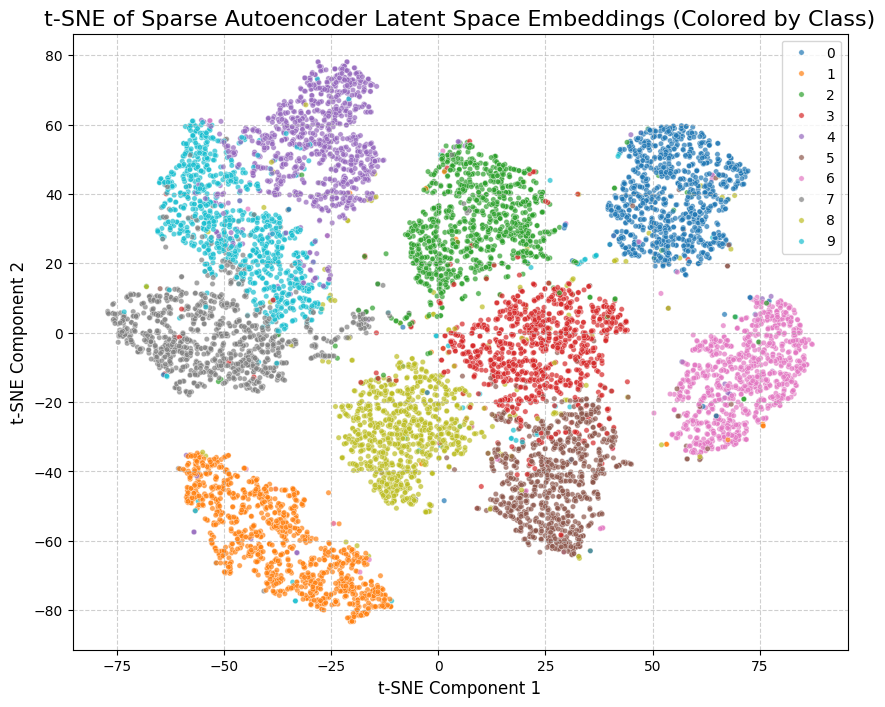

t-SNE plot for Sparse Autoencoder Latent Space generated.


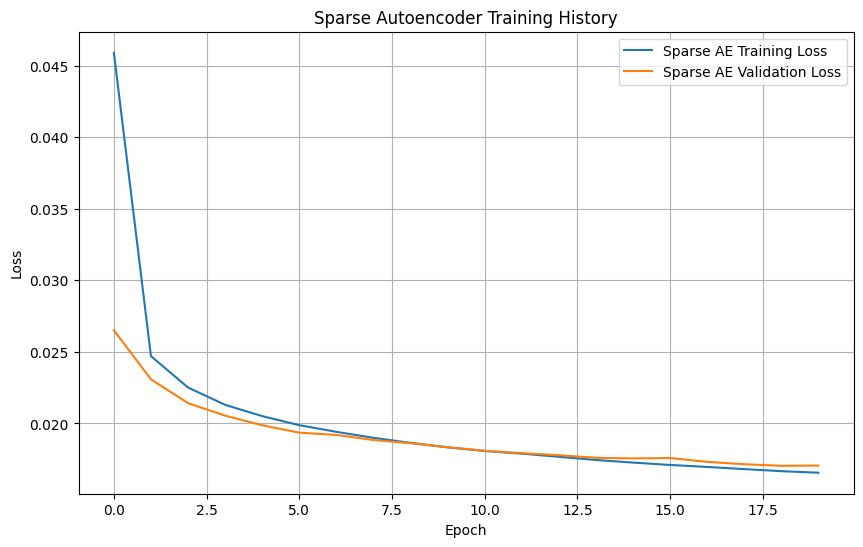

In [9]:
main_sparse_autoencoder()

Call the main_contractive_autoencoder() function 

This function would train the model, generate the tsne plot 


--- Implementing and Training Contractive Autoencoder ---


Model: "contractive_autoencoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ contractive_ae_input            │ (None, 28, 28, 1)      │             0 │
│ (InputLayer)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ encoder (Functional)            │ (None, 64)             │       219,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder (Functional)            │ (None, 28, 28, 1)      │       259,521 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 479,105 (1.83 MB)

 Trainable params: 479,105 (1.83 MB)

 Non-trainable params: 0 (0.00 B)


Training contractive_autoencoder...
Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 51s 102ms/step - loss: 0.1171 - val_loss: 0.1140
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 53s 113ms/step - loss: 0.1121 - val_loss: 0.1140
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 49s 104ms/step - loss: 0.1121 - val_loss: 0.1140
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 46s 98ms/step - loss: 0.1121 - val_loss: 0.1140
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 50s 106ms/step - loss: 0.1121 - val_loss: 0.1140
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 49s 105ms/step - loss: 0.1121 - val_loss: 0.1140
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 47s 101ms/step - loss: 0.1121 - val_loss: 0.1140
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 49s 104ms/step - loss: 0.1121 - val_loss: 0.1140
Epoch 9/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 50s 106ms/step - loss: 0.1121 - val_loss: 0.1140
Epoch 10/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 48s 102ms/step - loss: 0.1121 - val_loss: 0.1140
Epoch 11/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 50s 106ms/step - loss: 0.1121 - 

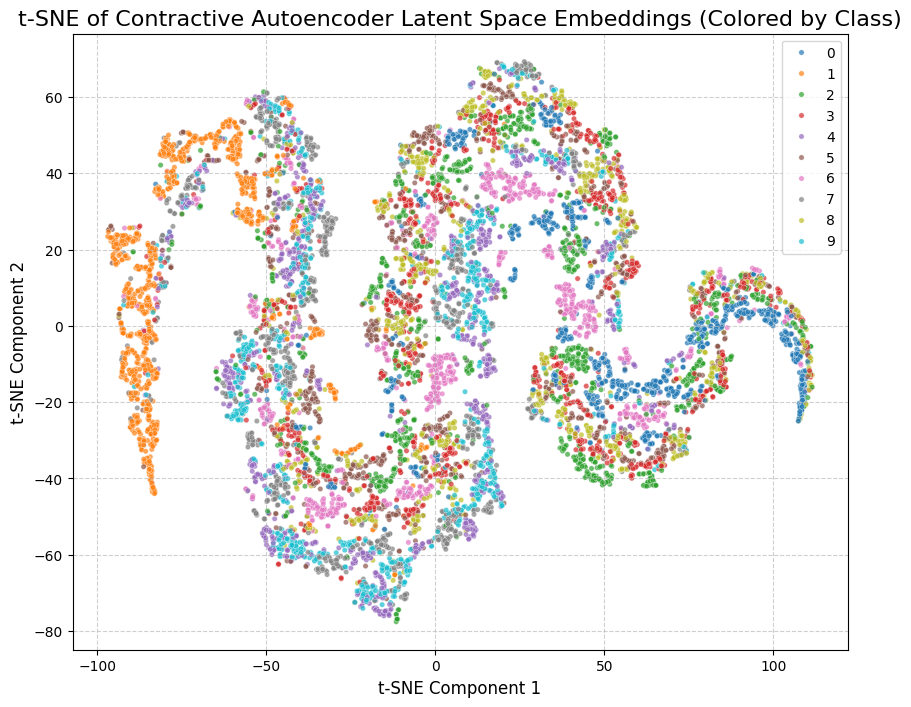

t-SNE plot for Contractive Autoencoder Latent Space generated.


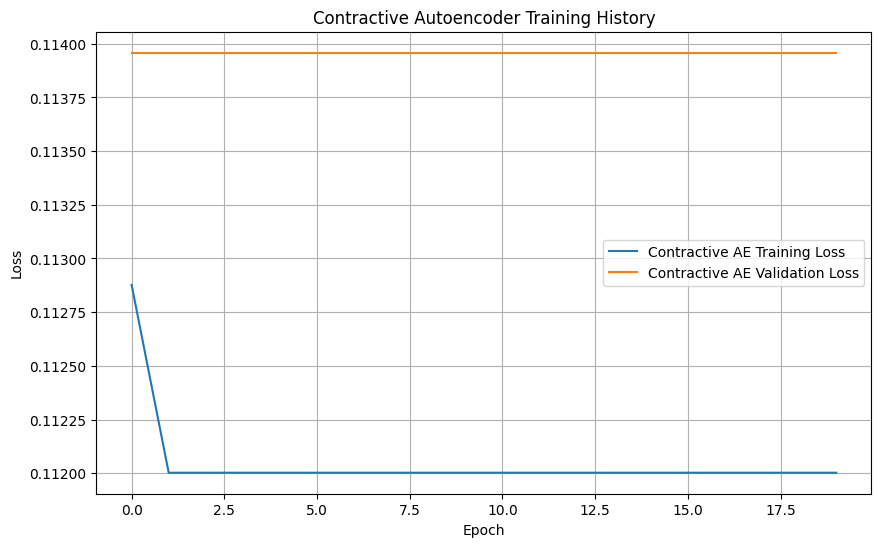

In [10]:
main_contractive_autoencoder()

Problem statement:  1b 

(20 points) Randomly take two images I1 and I2 from two different digit classes. 
Let h1 = E(I1) and h2 = E(I2) be the embeddings for these images, respectively. 
Construct another image Iα = αI1+(1−α)I2 for α = 0, 0.2, 0.4, 0.6, 0.8, 1. 
Find the embedding hα of this image Iα for all values of α by passing it through the encoder. 
Also, consider the approximate embedding h′α = αh1+(1−α)h2 by using directly the embeddings of the images I1 and I2. 
Also, find ˆIα = D(hα) and ˆI′α = D(h′α).
Plot the imagesˆIα andˆI′ α side by side for different values of α. Do this for 20 pairs (I1, I2). 
Report PSNR betweenˆIα andˆI′ α and find ∥ˆhα −ˆh′ α∥2 for all values of alpha.

Solution: 

1. First we create function called plot_reconstructions that will help in visualizing the original image and help in reconstructing new image. 

2. Create function called random_image that would select 2 images from different digit class randomly. 

3. Function generate_interpolations that would generates interpolated images and embeddings for given alpha   
   values.

4. 

In [11]:
def plot_reconstructions(autoencoder_model, test_data, title, num_display=10):
    """
    Visualizes original and reconstructed images.
    """
    print(f"\n--- Visualizing Reconstructions ({title} Example) ---")
    reconstructed_imgs = autoencoder_model.predict(test_data[:num_display])

    plt.figure(figsize=(20, 4))
    for i in range(num_display):
        ax = plt.subplot(2, num_display, i + 1)
        plt.imshow(test_data[i].squeeze(), cmap='gray')
        plt.title("Original")
        plt.axis("off")

        ax = plt.subplot(2, num_display, i + 1 + num_display)
        plt.imshow(reconstructed_imgs[i].squeeze(), cmap='gray')
        plt.title("Reconstructed")
        plt.axis("off")
    plt.suptitle(f"{title}: Original vs. Reconstructed Digits", fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()
    
def random_image(images, labels):
    """
    Selects two images randmonly I1 and I2 from two different digit classes.
    Input arguments: mn_test, mn_test_labels    
    Returns:
        tuple: (I1, label1, I2, label2)
               I1, I2 are images with batch dimension (1, H, W, C).
               label1, label2 are scalar class labels.
    """
    unique_labels = np.unique(labels)
    
    # Ensure there are at least two unique labels
    if len(unique_labels) < 2:
        raise ValueError("Dataset must contain at least two different classes for this experiment.")

    # Select two different random classes
    class1, class2 = np.random.choice(unique_labels, 2, replace=False)

    # Find indices for images belonging to these classes
    idx1 = np.where(labels == class1)[0]
    idx2 = np.where(labels == class2)[0]

    # Pick a random image from each class
    i1_idx = np.random.choice(idx1)
    i2_idx = np.random.choice(idx2)

    I1 = images[i1_idx:i1_idx+1] # Keep batch dimension
    I2 = images[i2_idx:i2_idx+1] # Keep batch dimension

    return I1, labels[i1_idx], I2, labels[i2_idx]

def generate_interpolations(encoder, decoder, I1, h1, I2, h2, alphas):
    """
    Generates interpolated images and embeddings for given alpha values.
    
    Args:
        encoder (tf.keras.Model): The trained encoder model (e).
        decoder (tf.keras.Model): The trained decoder model (d).
        I1 (np.array): First input image (with batch dimension).
        h1 (np.array): Embedding of I1 (with batch dimension).
        I2 (np.array): Second input image (with batch dimension).
        h2 (np.array): Embedding of I2 (with batch dimension).
        alphas (list): List of alpha values for interpolation.
        
    Returns:
        tuple: (list of I_alpha, list of h_alpha, list of h_prime_alpha,
                list of I_hat_alpha, list of I_hat_prime_alpha)
    """
    I_alphas = []
    h_alphas = []
    h_prime_alphas = []
    I_hat_alphas = []
    I_hat_prime_alphas = []

    for alpha in alphas:
        # Construct I_alpha = alpha*I1 + (1-alpha)*I2
        I_alpha = alpha * I1 + (1 - alpha) * I2
        I_alphas.append(I_alpha)

        # Find embedding h_alpha = E(I_alpha)
        h_alpha = encoder.predict(I_alpha)
        h_alphas.append(h_alpha)

        # Approximate embedding h'_alpha = alpha*h1 + (1-alpha)*h2
        h_prime_alpha = alpha * h1 + (1 - alpha) * h2
        h_prime_alphas.append(h_prime_alpha)

        # Find I_hat_alpha = D(h_alpha)
        I_hat_alpha = decoder.predict(h_alpha)
        I_hat_alphas.append(I_hat_alpha)

        # Find I_hat_prime_alpha = D(h'_alpha)
        I_hat_prime_alpha = decoder.predict(h_prime_alpha)
        I_hat_prime_alphas.append(I_hat_prime_alpha)

    return I_alphas, h_alphas, h_prime_alphas, I_hat_alphas, I_hat_prime_alphas



Create function run_interpolation_experiment that would run the interpolation for a given a encoder-decoder pair

In [12]:
def run_interpolation_experiment(encoder, decoder, model_name, num_pairs=20):
    """
    Runs the interpolation experiment for a given encoder-decoder pair.
    
    Args:
        1. The trained encoder (e).
        2. The trained decoder (d).
        3. Name of the autoencoder type (e.g., "Sparse AE").
        4. Number of (I1, I2) pairs to test.
    """
    print(f"\n--- Running Interpolation Experiment for {model_name} ---")
    
    alphas = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]

    all_psnr_values = {alpha: [] for alpha in alphas}
    all_l2_norm_values = {alpha: [] for alpha in alphas}

    for pair_idx in range(num_pairs):
        print(f"\nProcessing pair {pair_idx + 1}/{num_pairs}...")
        I1, label1, I2, label2 = random_image(mn_test, mn_test_labels)
        print(f"Selected Images: I1 (class {label1}), I2 (class {label2})")

        # Get initial embeddings h1 and h2
        h1 = encoder.predict(I1)
        h2 = encoder.predict(I2)

        # Generate all interpolated components
        (I_alphas, h_alphas, h_prime_alphas, 
         I_hat_alphas, I_hat_prime_alphas) = generate_interpolations(
            encoder, decoder, I1, h1, I2, h2, alphas
        )

        # Plot 1: Original Images, Pixel Interpolation, and Reconstruction from E(I_alpha)
        num_alphas = len(alphas)
        fig, axes = plt.subplots(3, num_alphas, figsize=(num_alphas * 3, 9))
        
        axes[0, 0].imshow(I1.squeeze(), cmap='gray')
        axes[0, 0].set_title(f'I1 ({label1})', fontsize=8)
        axes[0, 0].axis('off')
        
        axes[0, num_alphas - 1].imshow(I2.squeeze(), cmap='gray')
        axes[0, num_alphas - 1].set_title(f'I2 ({label2})', fontsize=8)
        axes[0, num_alphas - 1].axis('off')
        
        for j in range(1, num_alphas -1): # Hide middle axes for I1/I2 row
            axes[0, j].axis('off')
        axes[0, num_alphas // 2].set_title(f'Pair {pair_idx + 1} Original/Interpolated Pixel Space', fontsize=12)

        for i, alpha in enumerate(alphas):
            axes[1, i].imshow(I_alphas[i].squeeze(), cmap='gray')
            axes[1, i].set_title(f'I_alpha={alpha:.1f}', fontsize=8)
            axes[1, i].axis('off')
            
            axes[2, i].imshow(I_hat_alphas[i].squeeze(), cmap='gray')
            axes[2, i].set_title(f'D(E(I_alpha))', fontsize=8)
            axes[2, i].axis('off')
            
        plt.tight_layout(rect=[0, 0.03, 1, 0.95])
        plt.suptitle(f'{model_name} Interpolation (Pair {pair_idx+1}): Pixel Space and Learned Embeddings', fontsize=16)
        plt.show()

        # Plot 2: Reconstructions from different embedding interpolations (side by side)
        fig_reconstructions, axes_recons = plt.subplots(2, num_alphas, figsize=(num_alphas * 2.5, 6))
        for i, alpha in enumerate(alphas):
            # Plot I_hat_alpha (reconstruction from encoder-interpolated embedding)
            axes_recons[0, i].imshow(I_hat_alphas[i].squeeze(), cmap='gray')
            axes_recons[0, i].set_title(f'alpha={alpha:.1f}\n I_hat_alpha', fontsize=8)
            axes_recons[0, i].axis('off')
            
            # Plot I_hat_prime_alpha (reconstruction from linearly-interpolated embedding)
            axes_recons[1, i].imshow(I_hat_prime_alphas[i].squeeze(), cmap='gray')
            axes_recons[1, i].set_title(f'alpha={alpha:.1f}\n I_hat_prime_alpha', fontsize=8)
            axes_recons[1, i].axis('off')

            # Calculate PSNR
            # FIX: Use .item() to extract the scalar value from the 0-D NumPy array
            psnr_val = tf.image.psnr(I_hat_alphas[i], I_hat_prime_alphas[i], max_val=1.0).numpy().item()
            all_psnr_values[alpha].append(psnr_val)

            # Calculate L2 norm between h_alpha and h_prime_alpha
            # FIX: Ensure it's a scalar by calling .item() if it could be a 0-D array
            l2_norm_val = np.linalg.norm(h_alphas[i] - h_prime_alphas[i]).item()
            all_l2_norm_values[alpha].append(l2_norm_val)

        plt.tight_layout(rect=[0, 0.03, 1, 0.95])
        plt.suptitle(f'{model_name} Interpolation (Pair {pair_idx+1}): Reconstructions from Different Embeddings', fontsize=16)
        plt.show()

        # Report metrics for the current pair
        print(f"\nMetrics for Pair {pair_idx+1}:")
        for alpha in alphas:
            current_psnr = all_psnr_values[alpha][-1]
            current_l2 = all_l2_norm_values[alpha][-1]
            # No LaTeX backslashes here, simple text output for robustness
            print(f"  alpha = {alpha:.1f}: PSNR(I_hat_alpha, I_hat_prime_alpha) = {current_psnr:.2f} dB, "
                  f"||h_alpha - h_prime_alpha||_2 = {current_l2:.4f}")
            
    # Report average PSNR and L2 norm across all pairs
    print(f"\n--- Average Metrics for {model_name} over {num_pairs} Pairs ---")
    for alpha in alphas:
        avg_psnr = np.mean(all_psnr_values[alpha]).item() # FIX: Ensure scalar for mean
        avg_l2_norm = np.mean(all_l2_norm_values[alpha]).item() # FIX: Ensure scalar for mean
        # No LaTeX backslashes here, simple text output for robustness
        print(f"  alpha = {alpha:.1f}: Average PSNR(I_hat_alpha, I_hat_prime_alpha) = {avg_psnr:.2f} dB, "
              f"Average ||h_alpha - h_prime_alpha||_2 = {avg_l2_norm:.4f}")

    print(f"--- Interpolation Experiment for {model_name} Completed ---")

Create function definition for main_sparse_autoencoder and main_contractive_autoencoder

In [21]:
def main_sparse_autoencoder():
    """
    Executes the code for the Sparse Autoencoder including the interpolation experiment.
    """
    print("\n--- Executing Sparse Autoencoder ---")
    
    # Common training parameters
    epochs = 20 # You might need more epochs for better quality
    batch_size = 128
    optimizer = keras.optimizers.Adam(learning_rate=1e-3)
    loss_fn = keras.losses.MeanSquaredError()

    # Create and train the Sparse Autoencoder
    sparse_autoencoder, e_sparse, d_sparse = create_sparse_autoencoder(input_shape, latent_dim, activity_regularizer_strength=1e-5)
    sparse_autoencoder.summary()
    sparse_history = train_autoencoder(sparse_autoencoder, mn_train, epochs, batch_size, optimizer, loss_fn, mn_test)

    # Plot results
    plot_tsne_embeddings(e_sparse, mn_test, mn_test_labels, "Sparse Autoencoder Latent Space")
    plot_training_history(sparse_history, "Sparse Autoencoder")
    plot_reconstructions(sparse_autoencoder, mn_test, "Sparse Autoencoder")

    # Run the interpolation experiment for the Sparse Autoencoder
    run_interpolation_experiment(e_sparse, d_sparse, "Sparse Autoencoder", num_pairs=20) # Reduced to 5 pairs for faster execution, change to 20 for full report

def main_contractive_autoencoder():
    """
    Executes the code for the Contractive Autoencoder including the interpolation experiment.
    """
    print("\n--- Executing Contractive Autoencoder ---")
    
    # Common training parameters
    epochs = 5
    batch_size = 128
    optimizer = keras.optimizers.Adam(learning_rate=1e-3)
    loss_fn = keras.losses.MeanSquaredError()

    # Create and train the Contractive Autoencoder
    contractive_autoencoder, e_contractive, d_contractive = create_contractive_autoencoder(input_shape, latent_dim)
    contractive_autoencoder.summary()
    
    # IMPORTANT: Reminder for Contractive Autoencoder
    print("\n--- Contractive Autoencoder Training using Mean Squared Error (reconstruction loss). ---")
    print("----------------------------------------------------------\n")
    
    contractive_history = train_autoencoder(contractive_autoencoder, mn_train, epochs, batch_size, optimizer, loss_fn, mn_test)

    # Plot results
    plot_tsne_embeddings(e_contractive, mn_test, mn_test_labels, "Contractive Autoencoder Latent Space")
    plot_training_history(contractive_history, "Contractive Autoencoder")
    plot_reconstructions(contractive_autoencoder, mn_test, "Contractive Autoencoder")

    # Run the interpolation experiment for the Contractive Autoencoder
    run_interpolation_experiment(e_contractive, d_contractive, "Contractive Autoencoder", num_pairs=20) # Reduced to 5 pairs for faster execution, change to 20 for full report

'''def main_contractive_autoencoder():
    """
    Executes the code for the Contractive Autoencoder including the interpolation experiment.
    """
    print("\n--- Executing Contractive Autoencoder ---")
    
    # Common training parameters
    epochs = 20
    batch_size = 128
    optimizer = keras.optimizers.Adam(learning_rate=1e-3)
    loss_fn = keras.losses.MeanSquaredError()

    # Create and train the Contractive Autoencoder
    contractive_autoencoder, e_contractive, d_contractive = create_contractive_autoencoder(input_shape, latent_dim)
    contractive_autoencoder.summary()
    
    # IMPORTANT: Reminder for Contractive Autoencoder
    print("\n--- Contractive Autoencoder Training using Mean Squared Error (reconstruction loss). ---")
    print("----------------------------------------------------------\n")
    
    contractive_history = train_autoencoder(contractive_autoencoder, mn_train, epochs, batch_size, optimizer, loss_fn, mn_test)

    # Plot results
    plot_tsne_embeddings(e_contractive, mn_test, mn_test_labels, "Contractive Autoencoder Latent Space")
    plot_training_history(contractive_history, "Contractive Autoencoder")
    plot_reconstructions(contractive_autoencoder, mn_test, "Contractive Autoencoder")

    # Run the interpolation experiment for the Contractive Autoencoder
    run_interpolation_experiment(e_contractive, d_contractive, "Contractive Autoencoder", num_pairs=20) # Reduced to 5 pairs for faster execution, change to 20 for full report
'''

def plot_training_history(history, title):
    """
    Plots the training and validation loss history.
    """
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{title} Training History')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

Invoke main_sparse_autoencoder


--- Executing Sparse Autoencoder ---


Model: "sparse_autoencoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sparse_ae_input (InputLayer)    │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ encoder (Functional)            │ (None, 64)             │       219,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sparse_regularization           │ (None, 64)             │             0 │
│ (ActivityRegularization)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder (Functional)            │ (None, 28, 28, 1)      │       259,521 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 479,105 (1.83 MB)

 Trainable params: 479,105 (1.83 MB)

 Non-trainable params: 0 (0.00 B)


Training sparse_autoencoder...


Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 53s 105ms/step - loss: 0.0782 - val_loss: 0.0253
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 47s 99ms/step - loss: 0.0242 - val_loss: 0.0211
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 50s 106ms/step - loss: 0.0210 - val_loss: 0.0193
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 48s 103ms/step - loss: 0.0195 - val_loss: 0.0183
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 51s 108ms/step - loss: 0.0186 - val_loss: 0.0176
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 46s 99ms/step - loss: 0.0179 - val_loss: 0.0171
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 47s 100ms/step - loss: 0.0174 - val_loss: 0.0170
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 51s 109ms/step - loss: 0.0170 - val_loss: 0.0168
Epoch 9/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 49s 104ms/step - loss: 0.0166 - val_loss: 0.0166
Epoch 10/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 48s 102ms/step - loss: 0.0163 - val_loss: 0.0163
Epoch 11/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 46s 99ms/step - loss: 0.0160 - val_loss: 0.0162
Epoch 12/20
469/469 ━━

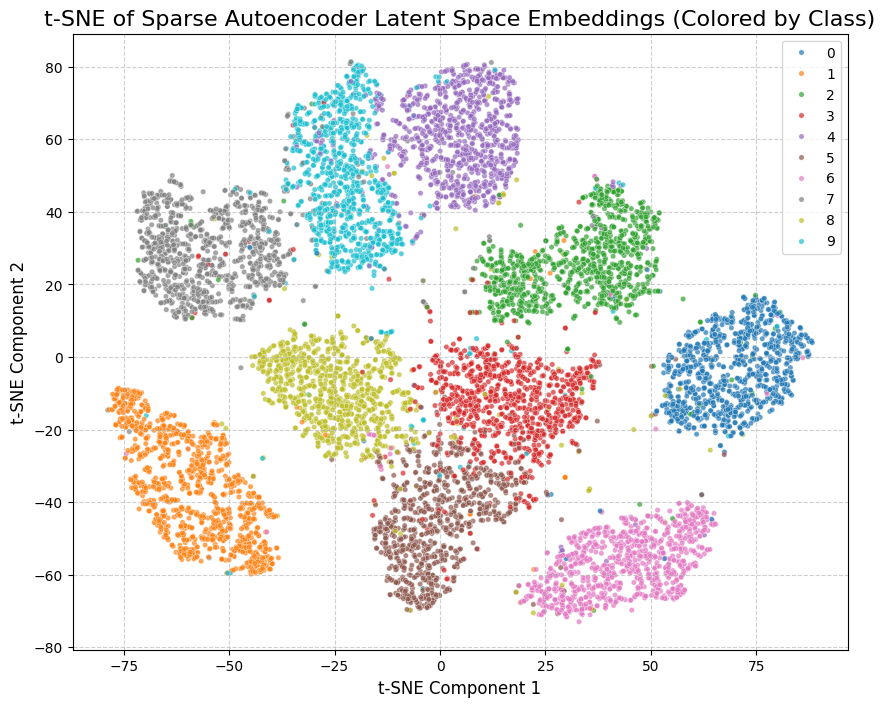

t-SNE plot for Sparse Autoencoder Latent Space generated.


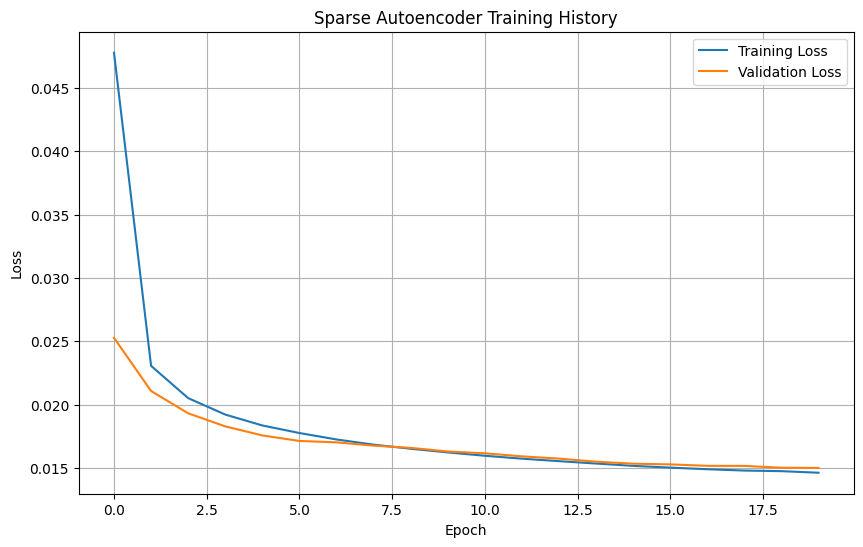


--- Visualizing Reconstructions (Sparse Autoencoder Example) ---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step


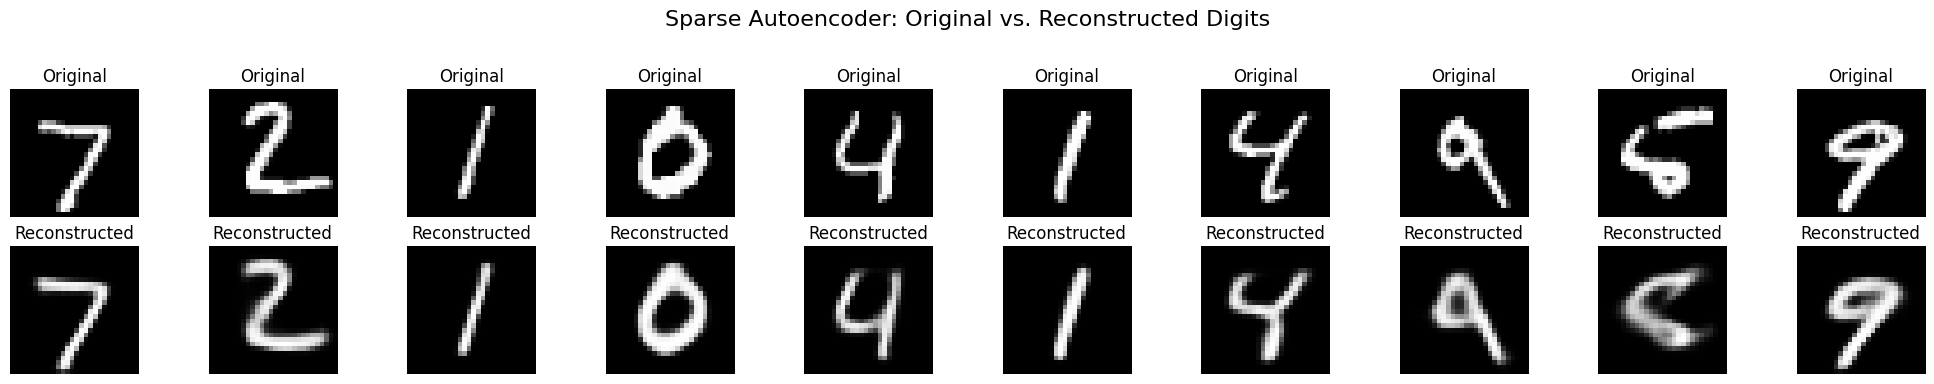


--- Running Interpolation Experiment for Sparse Autoencoder ---

Processing pair 1/20...
Selected Images: I1 (class 8), I2 (class 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 325ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


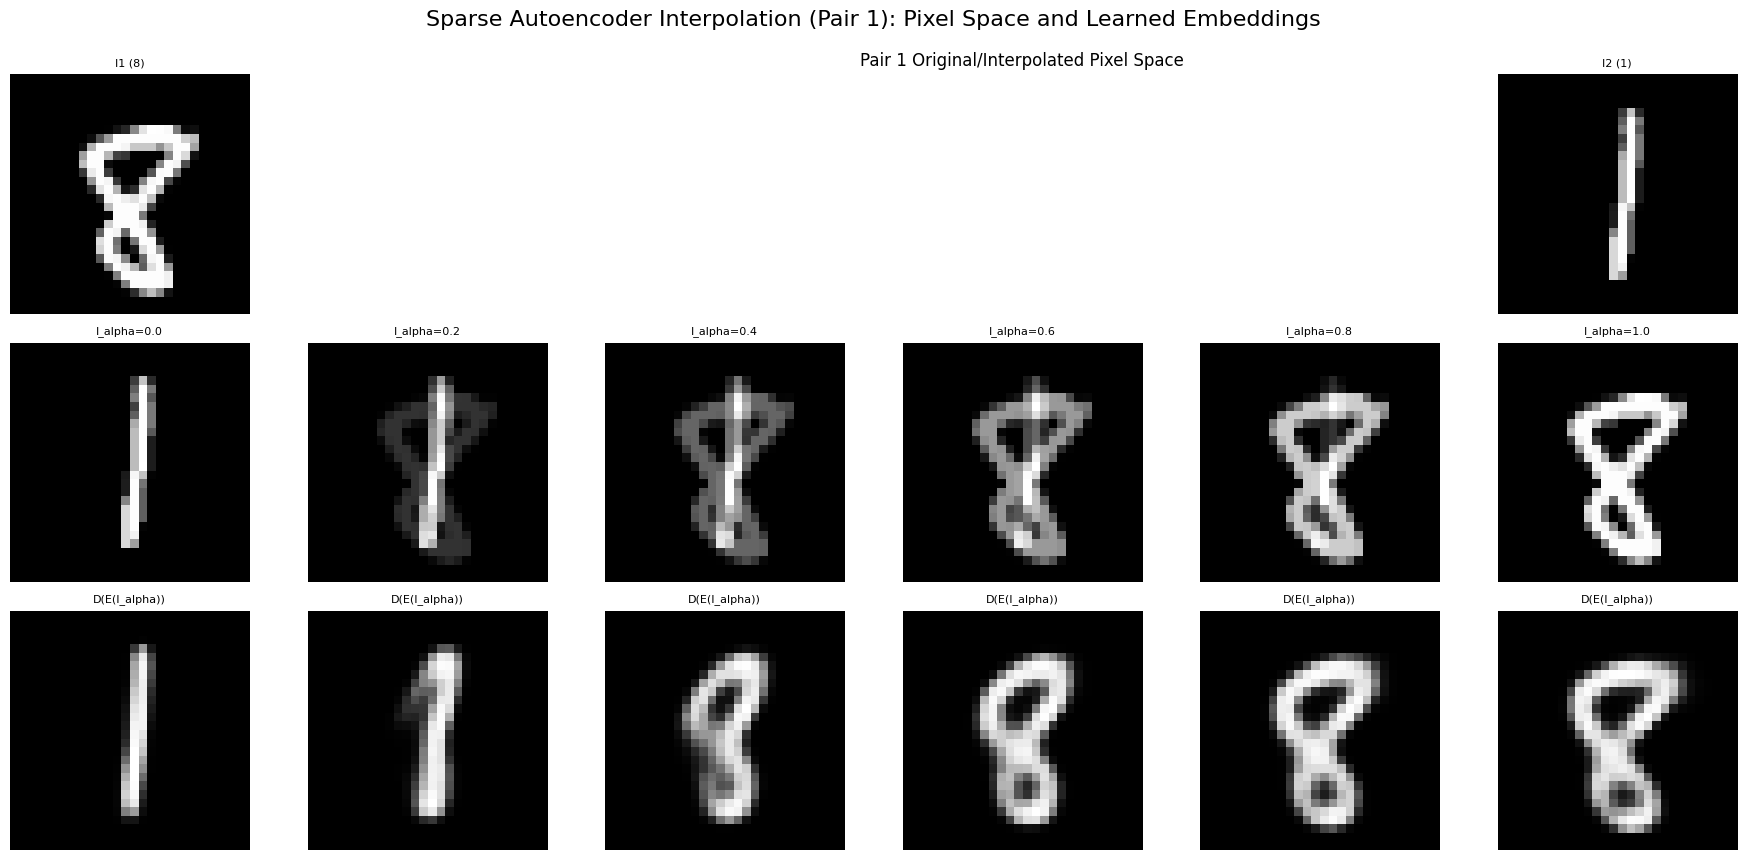

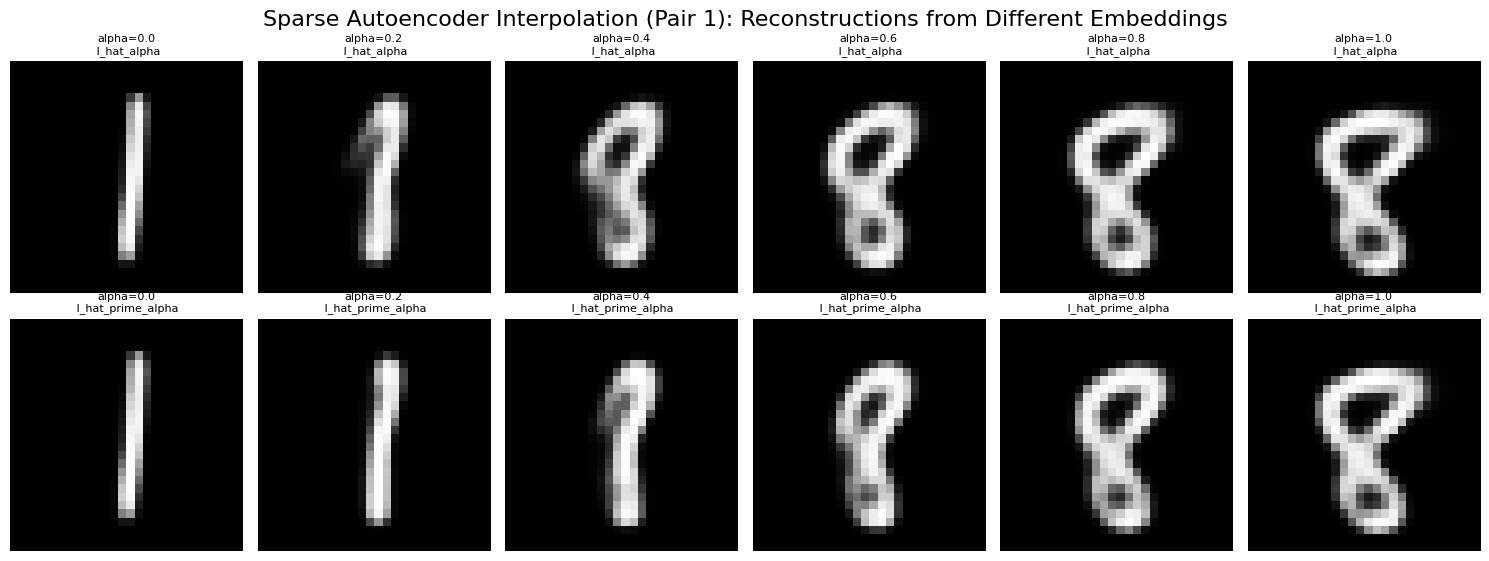


Metrics for Pair 1:
  alpha = 0.0: PSNR(I_hat_alpha, I_hat_prime_alpha) = inf dB, ||h_alpha - h_prime_alpha||_2 = 0.0000
  alpha = 0.2: PSNR(I_hat_alpha, I_hat_prime_alpha) = 24.85 dB, ||h_alpha - h_prime_alpha||_2 = 0.0220
  alpha = 0.4: PSNR(I_hat_alpha, I_hat_prime_alpha) = 17.60 dB, ||h_alpha - h_prime_alpha||_2 = 0.0313
  alpha = 0.6: PSNR(I_hat_alpha, I_hat_prime_alpha) = 18.24 dB, ||h_alpha - h_prime_alpha||_2 = 0.0276
  alpha = 0.8: PSNR(I_hat_alpha, I_hat_prime_alpha) = 23.25 dB, ||h_alpha - h_prime_alpha||_2 = 0.0178
  alpha = 1.0: PSNR(I_hat_alpha, I_hat_prime_alpha) = inf dB, ||h_alpha - h_prime_alpha||_2 = 0.0000

Processing pair 2/20...
Selected Images: I1 (class 0), I2 (class 6)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5

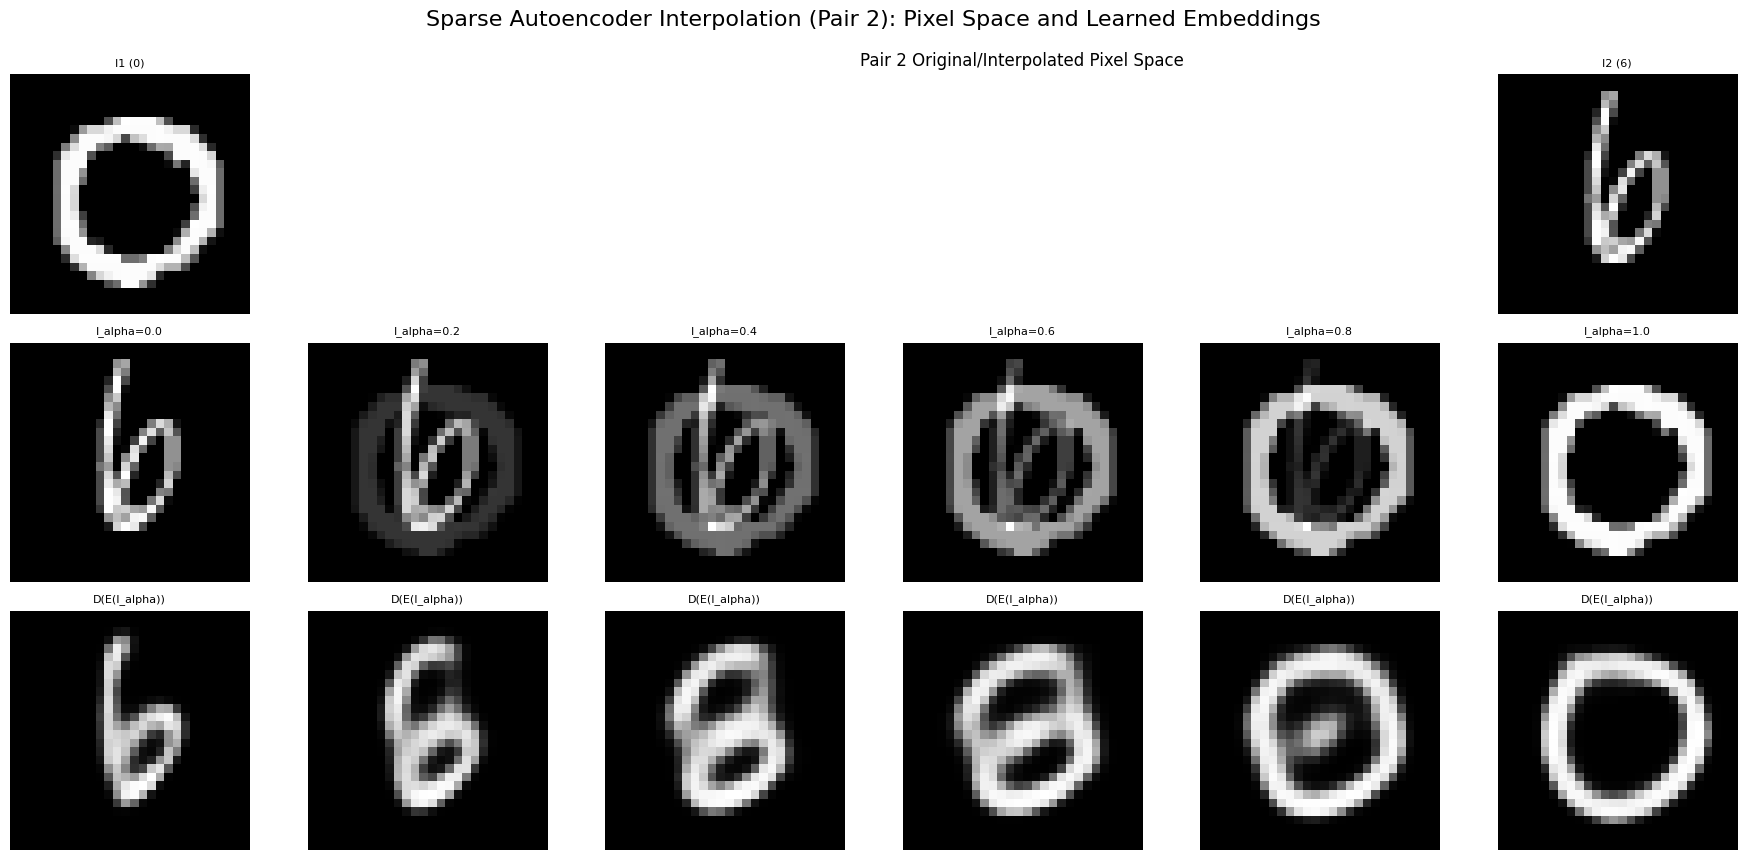

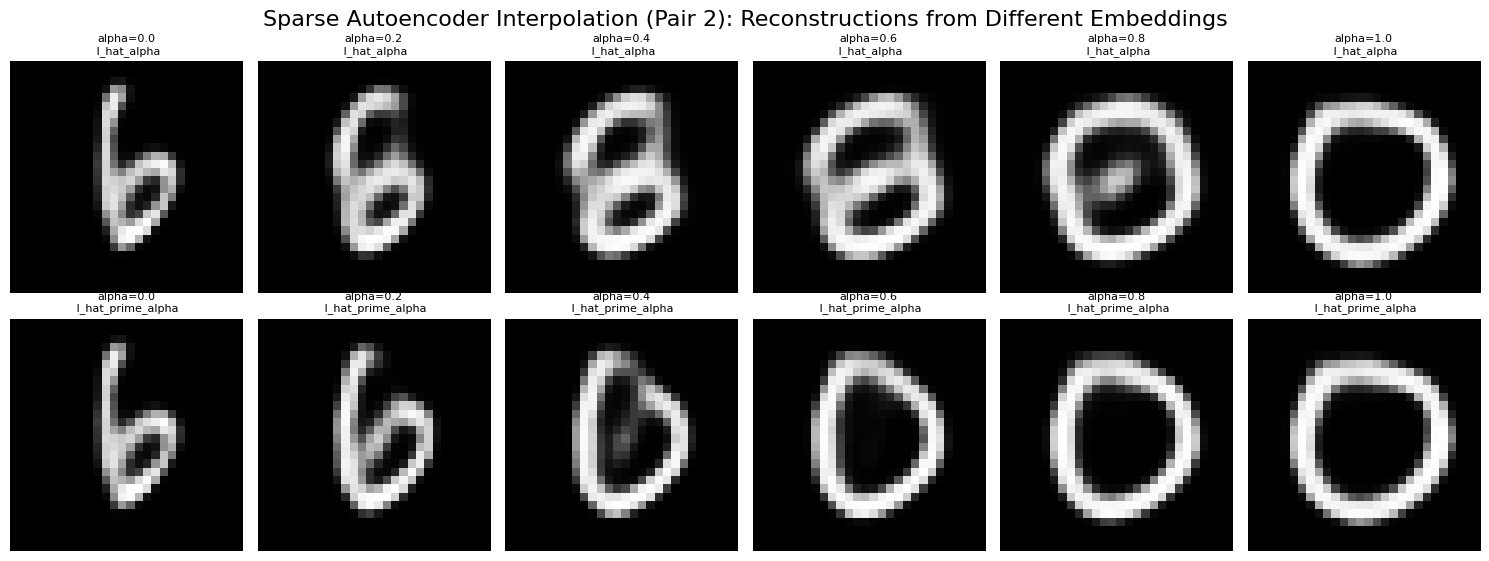


Metrics for Pair 2:
  alpha = 0.0: PSNR(I_hat_alpha, I_hat_prime_alpha) = inf dB, ||h_alpha - h_prime_alpha||_2 = 0.0000
  alpha = 0.2: PSNR(I_hat_alpha, I_hat_prime_alpha) = 16.36 dB, ||h_alpha - h_prime_alpha||_2 = 0.0610
  alpha = 0.4: PSNR(I_hat_alpha, I_hat_prime_alpha) = 13.01 dB, ||h_alpha - h_prime_alpha||_2 = 0.0811
  alpha = 0.6: PSNR(I_hat_alpha, I_hat_prime_alpha) = 13.18 dB, ||h_alpha - h_prime_alpha||_2 = 0.0768
  alpha = 0.8: PSNR(I_hat_alpha, I_hat_prime_alpha) = 17.65 dB, ||h_alpha - h_prime_alpha||_2 = 0.0519
  alpha = 1.0: PSNR(I_hat_alpha, I_hat_prime_alpha) = inf dB, ||h_alpha - h_prime_alpha||_2 = 0.0000

Processing pair 3/20...
Selected Images: I1 (class 6), I2 (class 2)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53

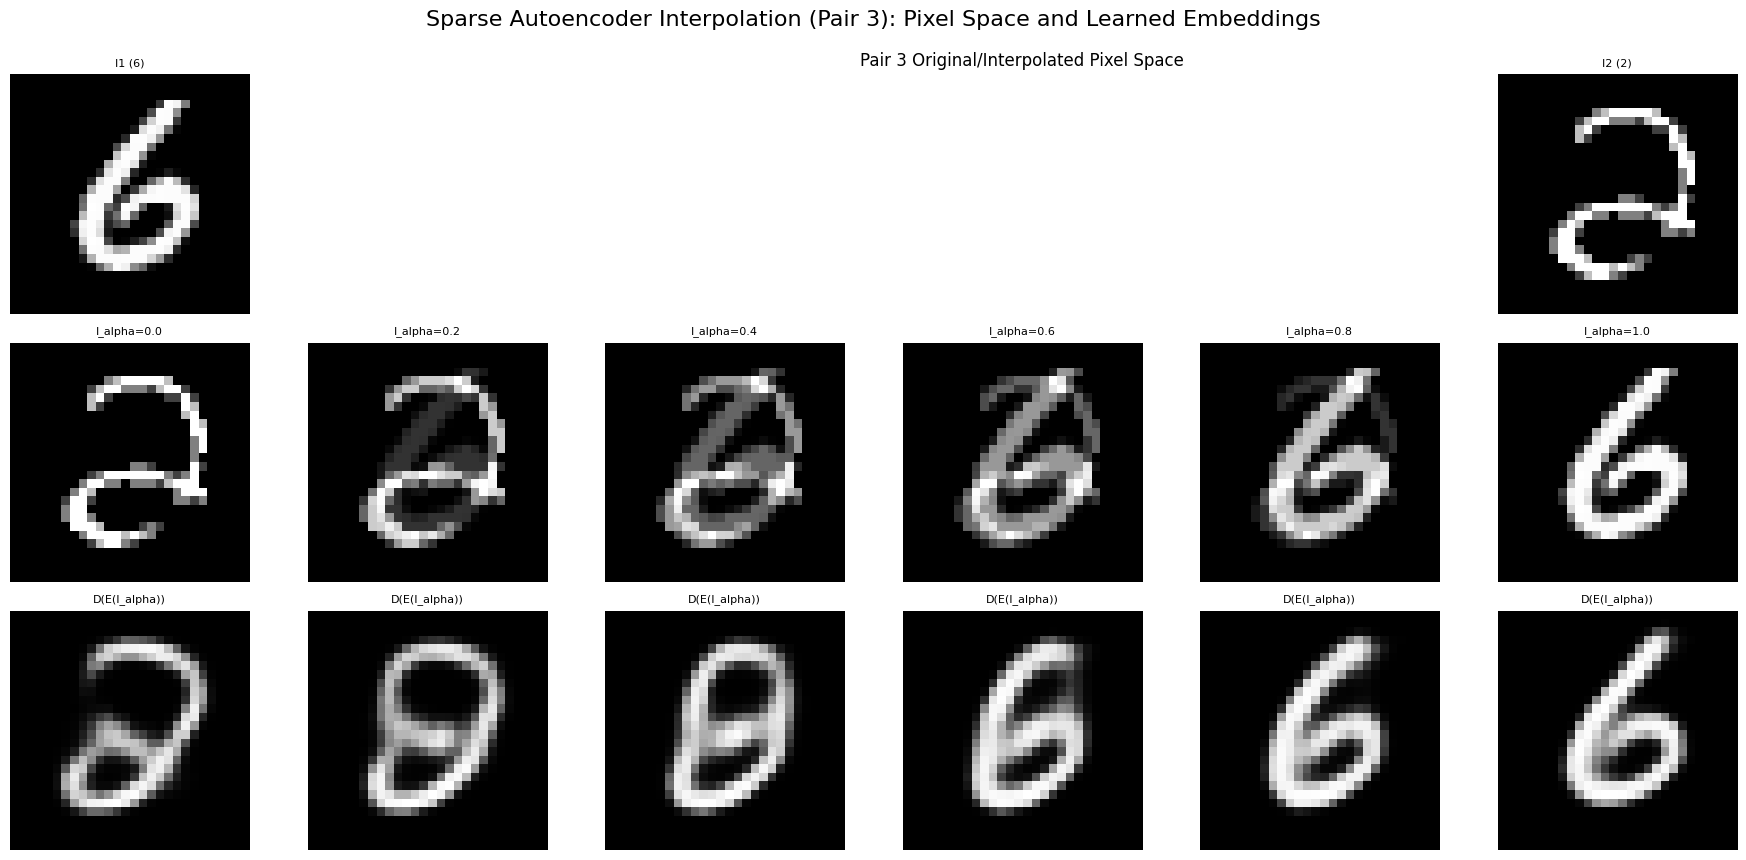

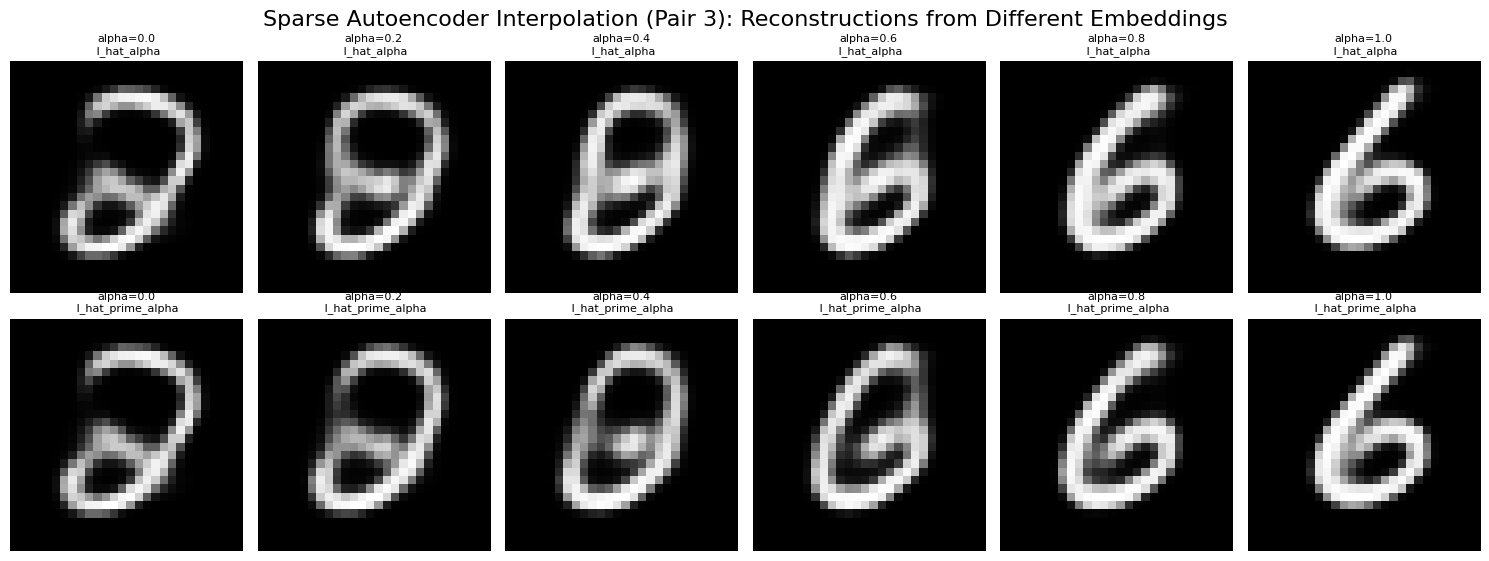


Metrics for Pair 3:
  alpha = 0.0: PSNR(I_hat_alpha, I_hat_prime_alpha) = inf dB, ||h_alpha - h_prime_alpha||_2 = 0.0000
  alpha = 0.2: PSNR(I_hat_alpha, I_hat_prime_alpha) = 20.75 dB, ||h_alpha - h_prime_alpha||_2 = 0.0294
  alpha = 0.4: PSNR(I_hat_alpha, I_hat_prime_alpha) = 17.82 dB, ||h_alpha - h_prime_alpha||_2 = 0.0397
  alpha = 0.6: PSNR(I_hat_alpha, I_hat_prime_alpha) = 17.05 dB, ||h_alpha - h_prime_alpha||_2 = 0.0360
  alpha = 0.8: PSNR(I_hat_alpha, I_hat_prime_alpha) = 20.93 dB, ||h_alpha - h_prime_alpha||_2 = 0.0210
  alpha = 1.0: PSNR(I_hat_alpha, I_hat_prime_alpha) = inf dB, ||h_alpha - h_prime_alpha||_2 = 0.0000

Processing pair 4/20...
Selected Images: I1 (class 1), I2 (class 5)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51

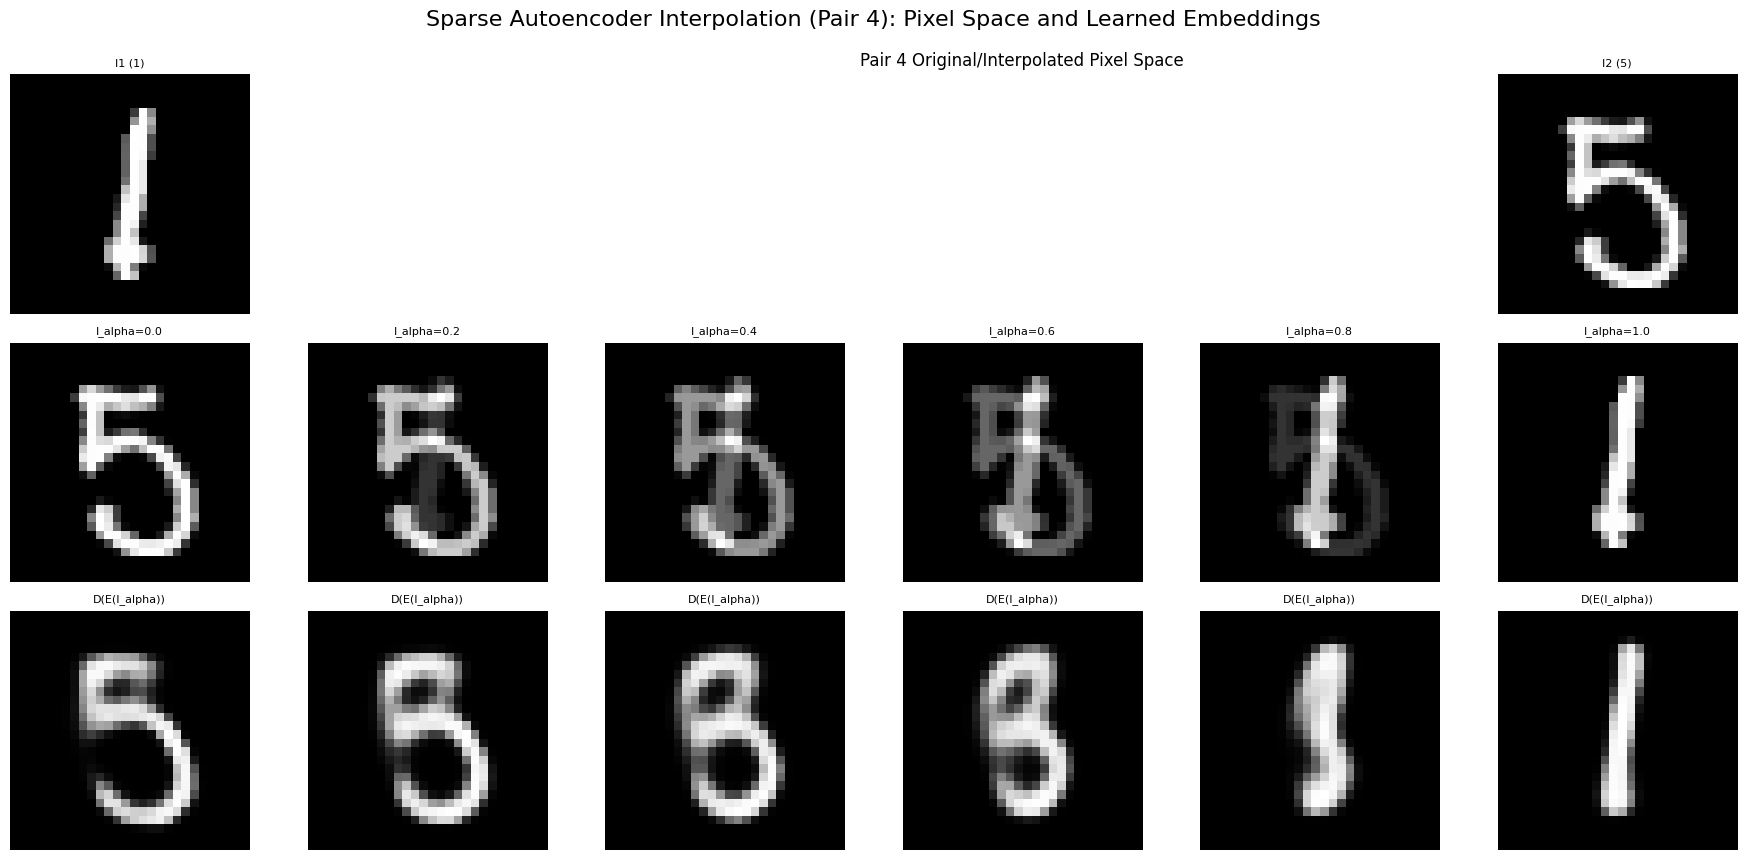

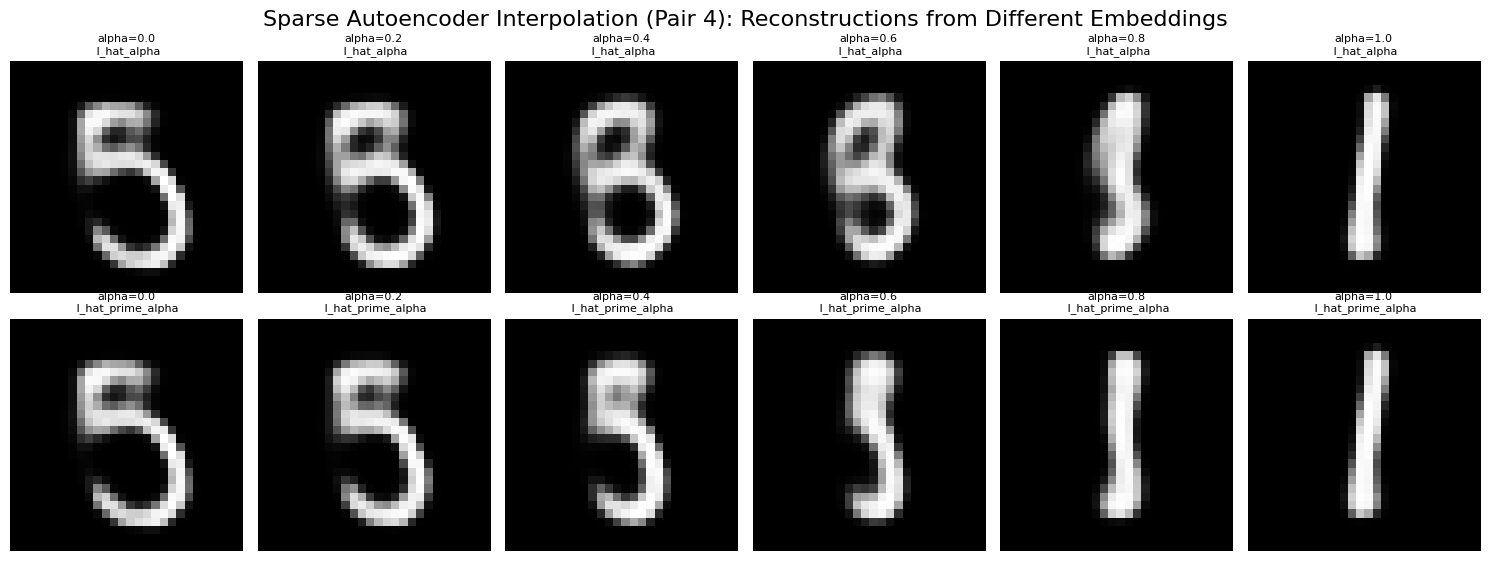


Metrics for Pair 4:
  alpha = 0.0: PSNR(I_hat_alpha, I_hat_prime_alpha) = inf dB, ||h_alpha - h_prime_alpha||_2 = 0.0000
  alpha = 0.2: PSNR(I_hat_alpha, I_hat_prime_alpha) = 19.64 dB, ||h_alpha - h_prime_alpha||_2 = 0.0317
  alpha = 0.4: PSNR(I_hat_alpha, I_hat_prime_alpha) = 15.36 dB, ||h_alpha - h_prime_alpha||_2 = 0.0479
  alpha = 0.6: PSNR(I_hat_alpha, I_hat_prime_alpha) = 14.81 dB, ||h_alpha - h_prime_alpha||_2 = 0.0501
  alpha = 0.8: PSNR(I_hat_alpha, I_hat_prime_alpha) = 20.66 dB, ||h_alpha - h_prime_alpha||_2 = 0.0363
  alpha = 1.0: PSNR(I_hat_alpha, I_hat_prime_alpha) = inf dB, ||h_alpha - h_prime_alpha||_2 = 0.0000

Processing pair 5/20...
Selected Images: I1 (class 5), I2 (class 2)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53

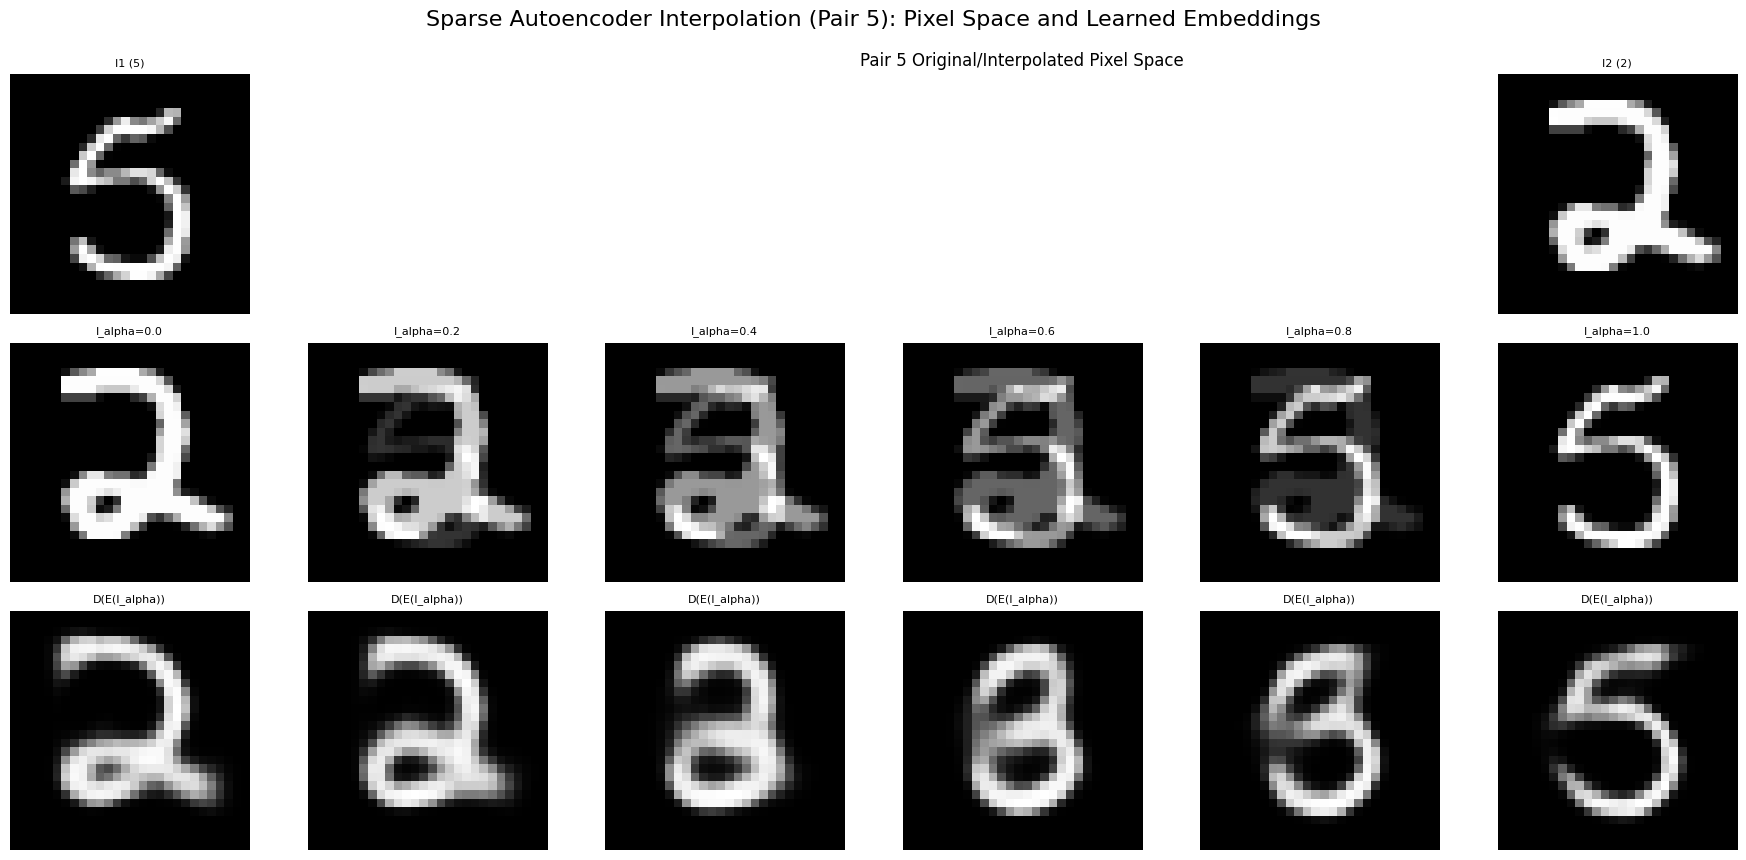

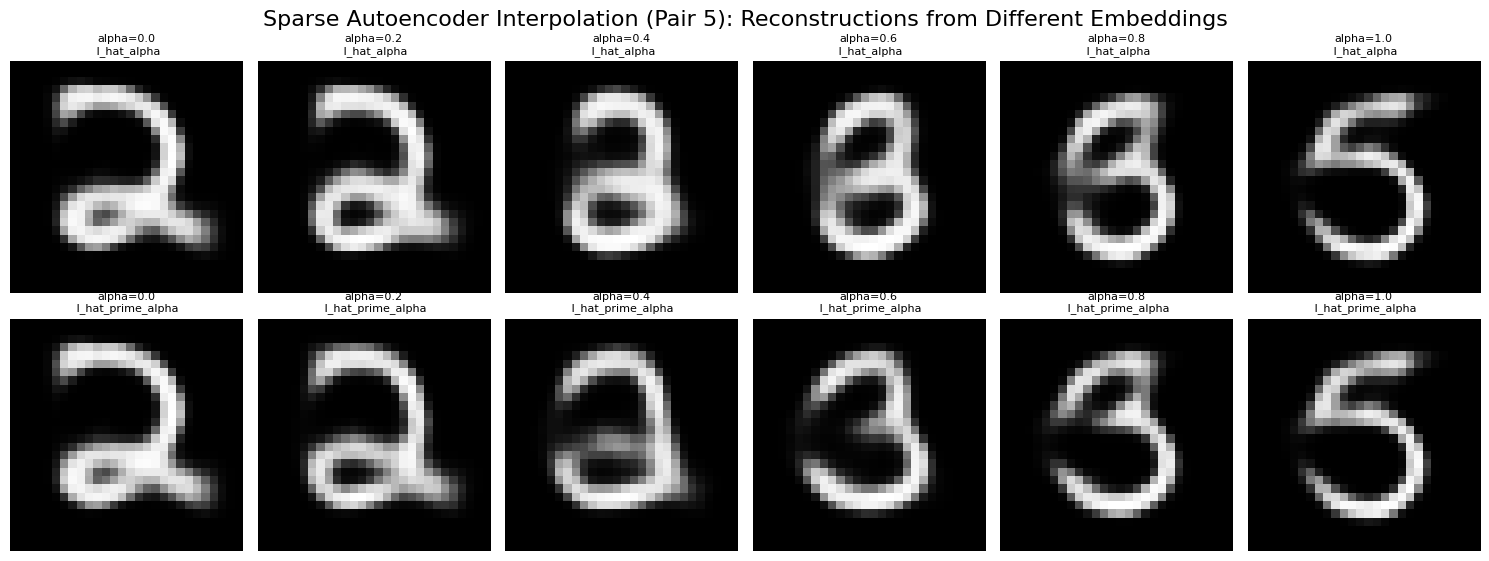


Metrics for Pair 5:
  alpha = 0.0: PSNR(I_hat_alpha, I_hat_prime_alpha) = inf dB, ||h_alpha - h_prime_alpha||_2 = 0.0000
  alpha = 0.2: PSNR(I_hat_alpha, I_hat_prime_alpha) = 21.00 dB, ||h_alpha - h_prime_alpha||_2 = 0.0490
  alpha = 0.4: PSNR(I_hat_alpha, I_hat_prime_alpha) = 17.21 dB, ||h_alpha - h_prime_alpha||_2 = 0.0811
  alpha = 0.6: PSNR(I_hat_alpha, I_hat_prime_alpha) = 15.36 dB, ||h_alpha - h_prime_alpha||_2 = 0.0852
  alpha = 0.8: PSNR(I_hat_alpha, I_hat_prime_alpha) = 18.09 dB, ||h_alpha - h_prime_alpha||_2 = 0.0620
  alpha = 1.0: PSNR(I_hat_alpha, I_hat_prime_alpha) = inf dB, ||h_alpha - h_prime_alpha||_2 = 0.0000

Processing pair 6/20...
Selected Images: I1 (class 9), I2 (class 4)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56

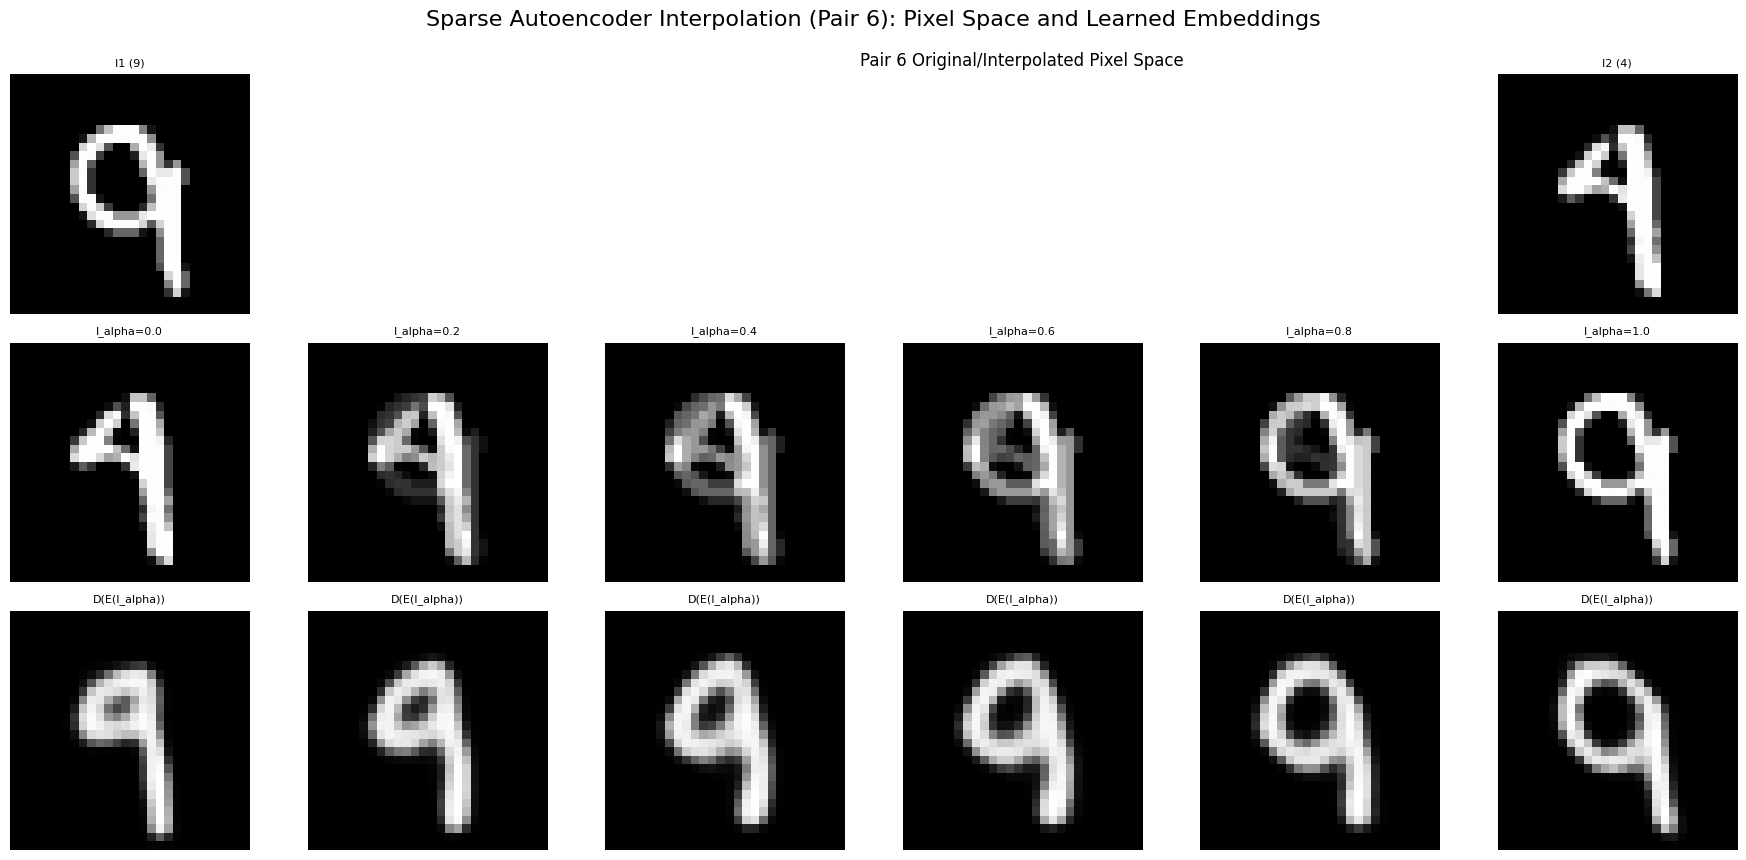

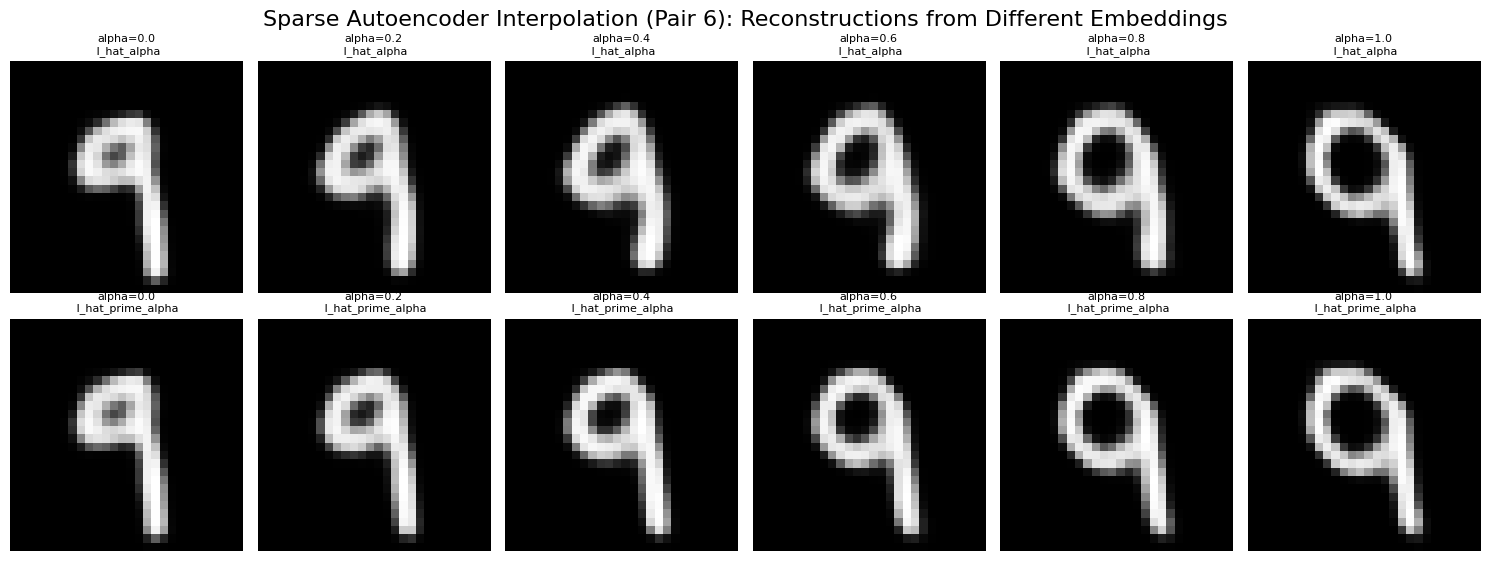


Metrics for Pair 6:
  alpha = 0.0: PSNR(I_hat_alpha, I_hat_prime_alpha) = inf dB, ||h_alpha - h_prime_alpha||_2 = 0.0000
  alpha = 0.2: PSNR(I_hat_alpha, I_hat_prime_alpha) = 23.35 dB, ||h_alpha - h_prime_alpha||_2 = 0.0242
  alpha = 0.4: PSNR(I_hat_alpha, I_hat_prime_alpha) = 19.70 dB, ||h_alpha - h_prime_alpha||_2 = 0.0400
  alpha = 0.6: PSNR(I_hat_alpha, I_hat_prime_alpha) = 19.70 dB, ||h_alpha - h_prime_alpha||_2 = 0.0428
  alpha = 0.8: PSNR(I_hat_alpha, I_hat_prime_alpha) = 22.86 dB, ||h_alpha - h_prime_alpha||_2 = 0.0314
  alpha = 1.0: PSNR(I_hat_alpha, I_hat_prime_alpha) = inf dB, ||h_alpha - h_prime_alpha||_2 = 0.0000

Processing pair 7/20...
Selected Images: I1 (class 2), I2 (class 0)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55

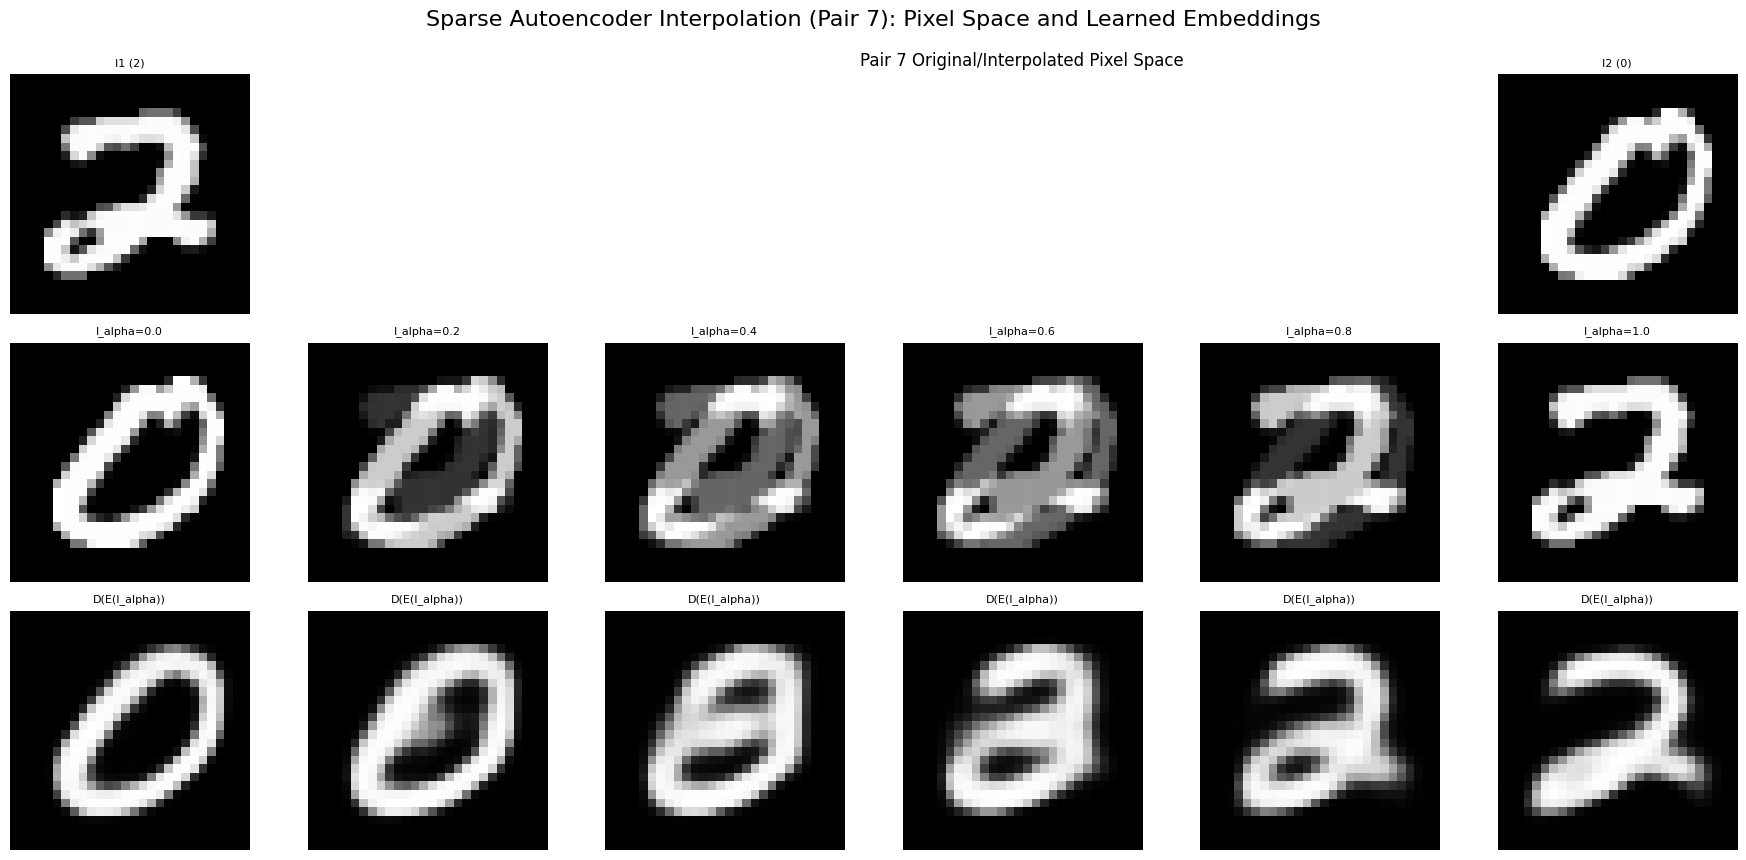

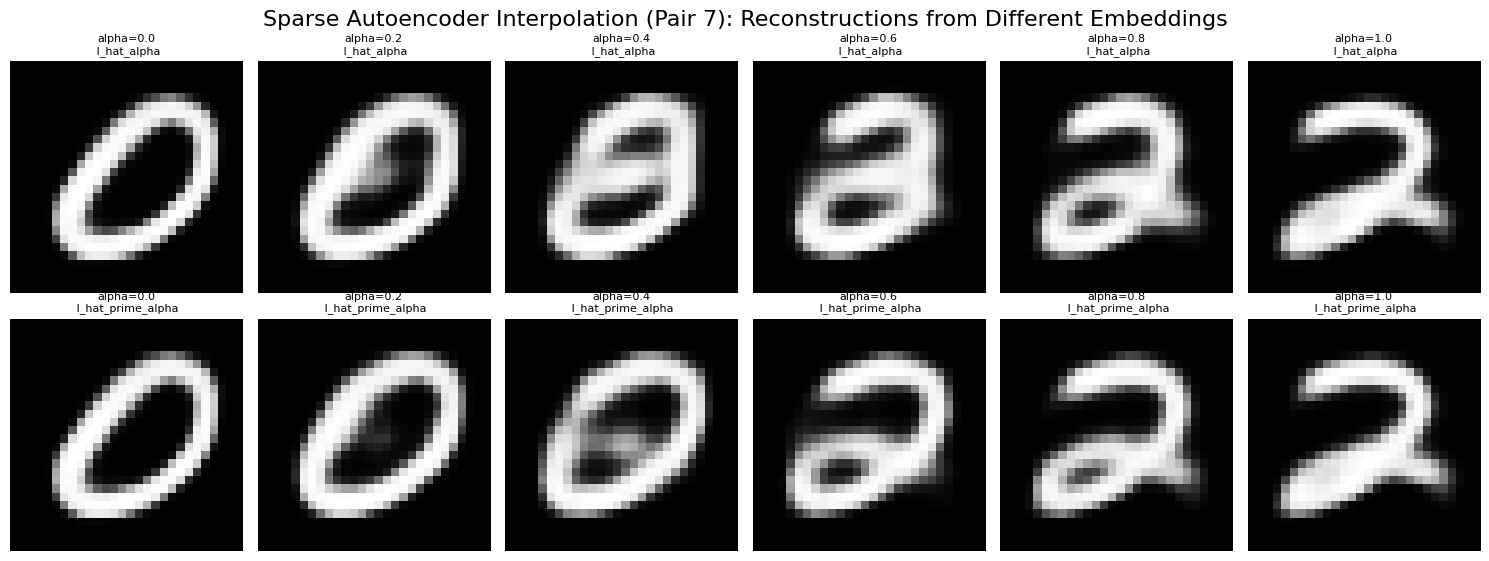


Metrics for Pair 7:
  alpha = 0.0: PSNR(I_hat_alpha, I_hat_prime_alpha) = inf dB, ||h_alpha - h_prime_alpha||_2 = 0.0000
  alpha = 0.2: PSNR(I_hat_alpha, I_hat_prime_alpha) = 17.92 dB, ||h_alpha - h_prime_alpha||_2 = 0.0384
  alpha = 0.4: PSNR(I_hat_alpha, I_hat_prime_alpha) = 13.46 dB, ||h_alpha - h_prime_alpha||_2 = 0.0635
  alpha = 0.6: PSNR(I_hat_alpha, I_hat_prime_alpha) = 13.67 dB, ||h_alpha - h_prime_alpha||_2 = 0.0663
  alpha = 0.8: PSNR(I_hat_alpha, I_hat_prime_alpha) = 17.21 dB, ||h_alpha - h_prime_alpha||_2 = 0.0452
  alpha = 1.0: PSNR(I_hat_alpha, I_hat_prime_alpha) = inf dB, ||h_alpha - h_prime_alpha||_2 = 0.0000

Processing pair 8/20...
Selected Images: I1 (class 4), I2 (class 2)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50

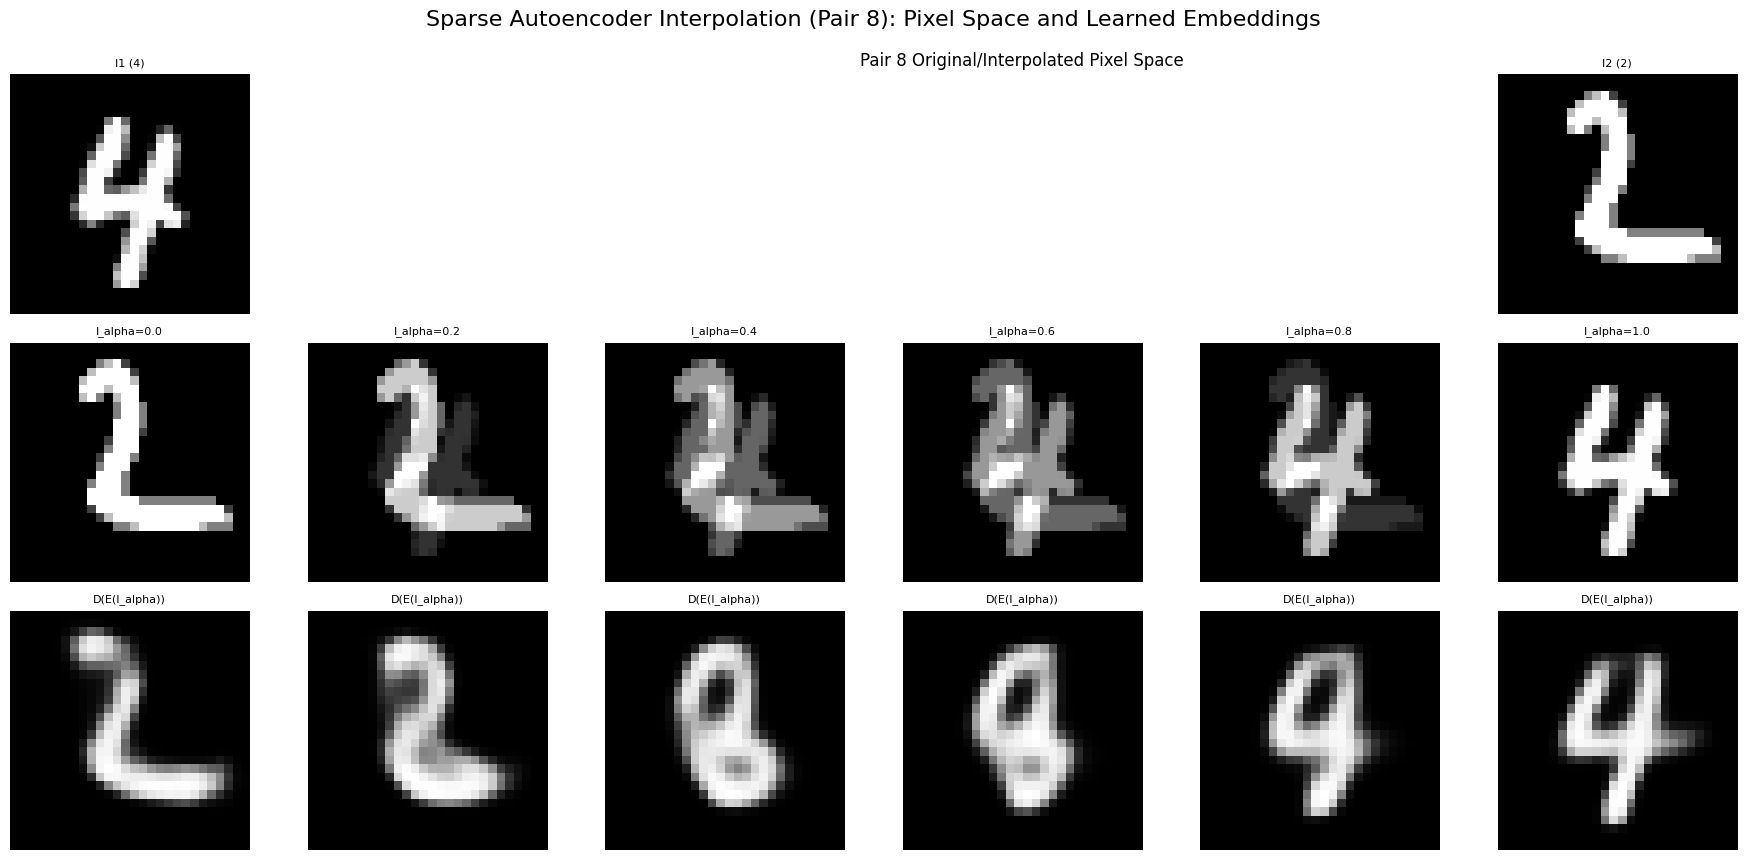

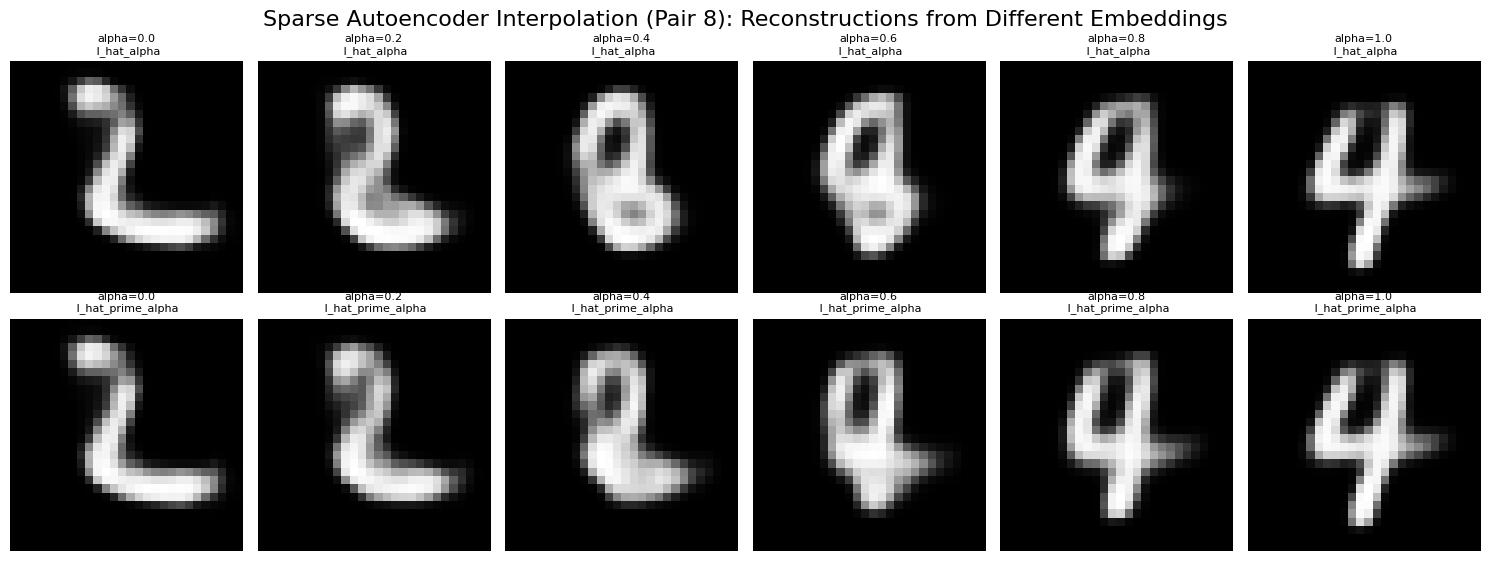


Metrics for Pair 8:
  alpha = 0.0: PSNR(I_hat_alpha, I_hat_prime_alpha) = inf dB, ||h_alpha - h_prime_alpha||_2 = 0.0000
  alpha = 0.2: PSNR(I_hat_alpha, I_hat_prime_alpha) = 21.47 dB, ||h_alpha - h_prime_alpha||_2 = 0.0222
  alpha = 0.4: PSNR(I_hat_alpha, I_hat_prime_alpha) = 17.78 dB, ||h_alpha - h_prime_alpha||_2 = 0.0374
  alpha = 0.6: PSNR(I_hat_alpha, I_hat_prime_alpha) = 20.09 dB, ||h_alpha - h_prime_alpha||_2 = 0.0337
  alpha = 0.8: PSNR(I_hat_alpha, I_hat_prime_alpha) = 22.23 dB, ||h_alpha - h_prime_alpha||_2 = 0.0227
  alpha = 1.0: PSNR(I_hat_alpha, I_hat_prime_alpha) = inf dB, ||h_alpha - h_prime_alpha||_2 = 0.0000

Processing pair 9/20...
Selected Images: I1 (class 6), I2 (class 2)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50

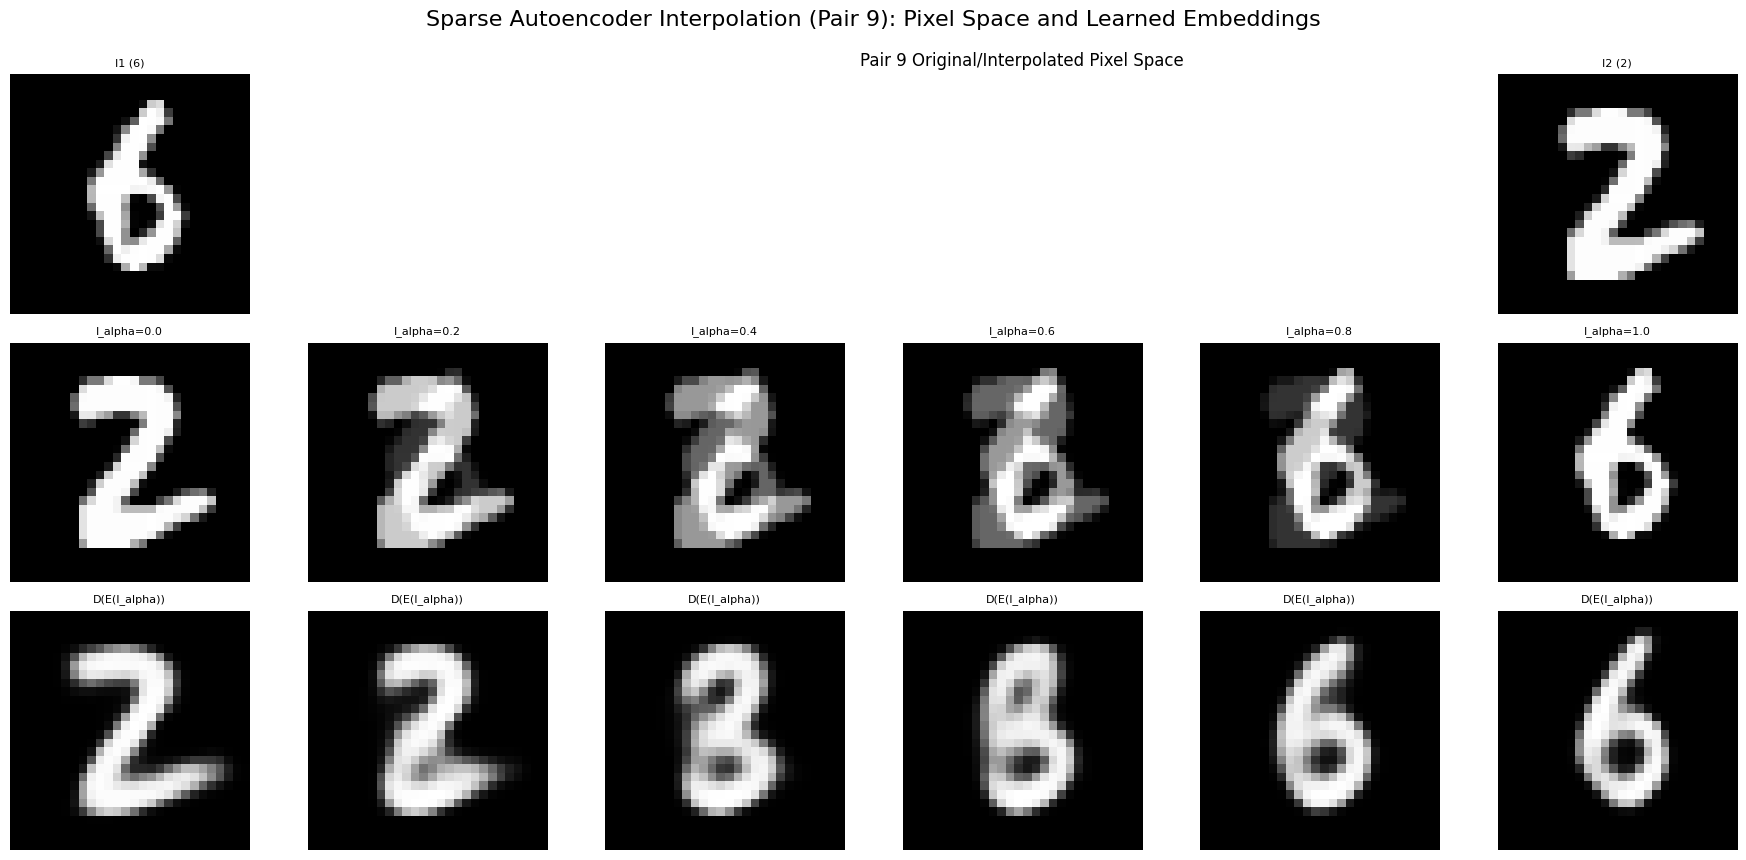

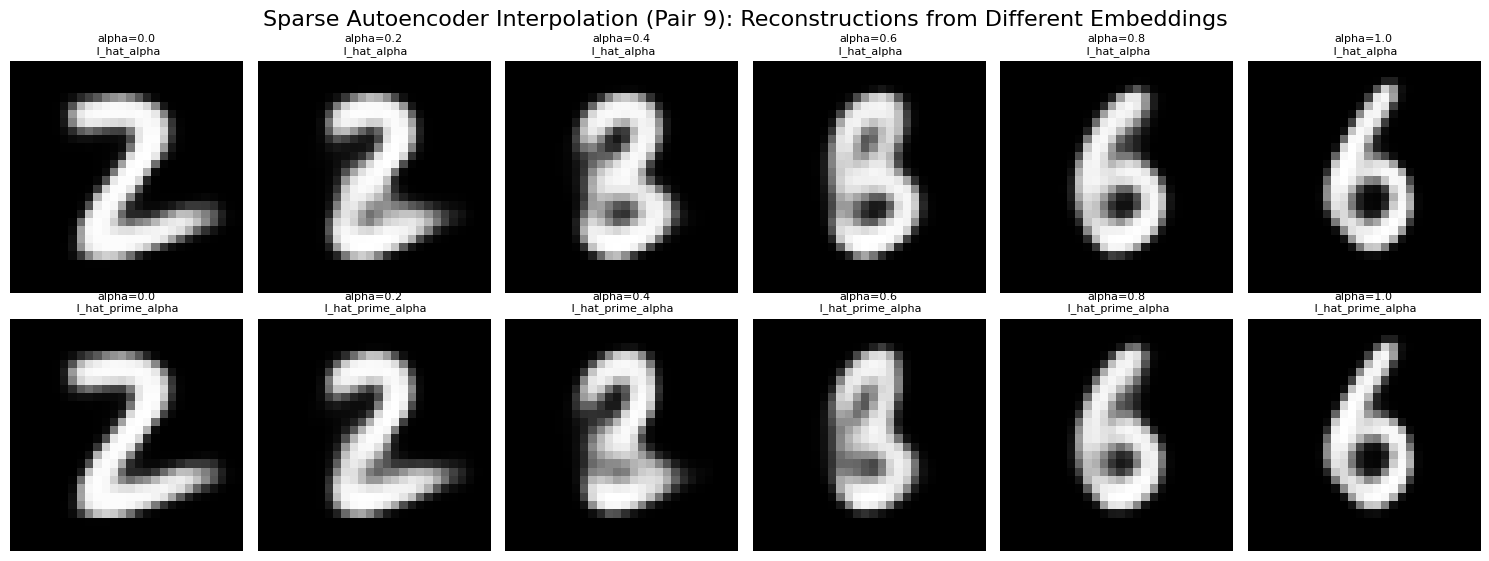


Metrics for Pair 9:
  alpha = 0.0: PSNR(I_hat_alpha, I_hat_prime_alpha) = inf dB, ||h_alpha - h_prime_alpha||_2 = 0.0000
  alpha = 0.2: PSNR(I_hat_alpha, I_hat_prime_alpha) = 26.00 dB, ||h_alpha - h_prime_alpha||_2 = 0.0161
  alpha = 0.4: PSNR(I_hat_alpha, I_hat_prime_alpha) = 20.72 dB, ||h_alpha - h_prime_alpha||_2 = 0.0246
  alpha = 0.6: PSNR(I_hat_alpha, I_hat_prime_alpha) = 20.88 dB, ||h_alpha - h_prime_alpha||_2 = 0.0196
  alpha = 0.8: PSNR(I_hat_alpha, I_hat_prime_alpha) = 26.32 dB, ||h_alpha - h_prime_alpha||_2 = 0.0100
  alpha = 1.0: PSNR(I_hat_alpha, I_hat_prime_alpha) = inf dB, ||h_alpha - h_prime_alpha||_2 = 0.0000

Processing pair 10/20...
Selected Images: I1 (class 1), I2 (class 5)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5

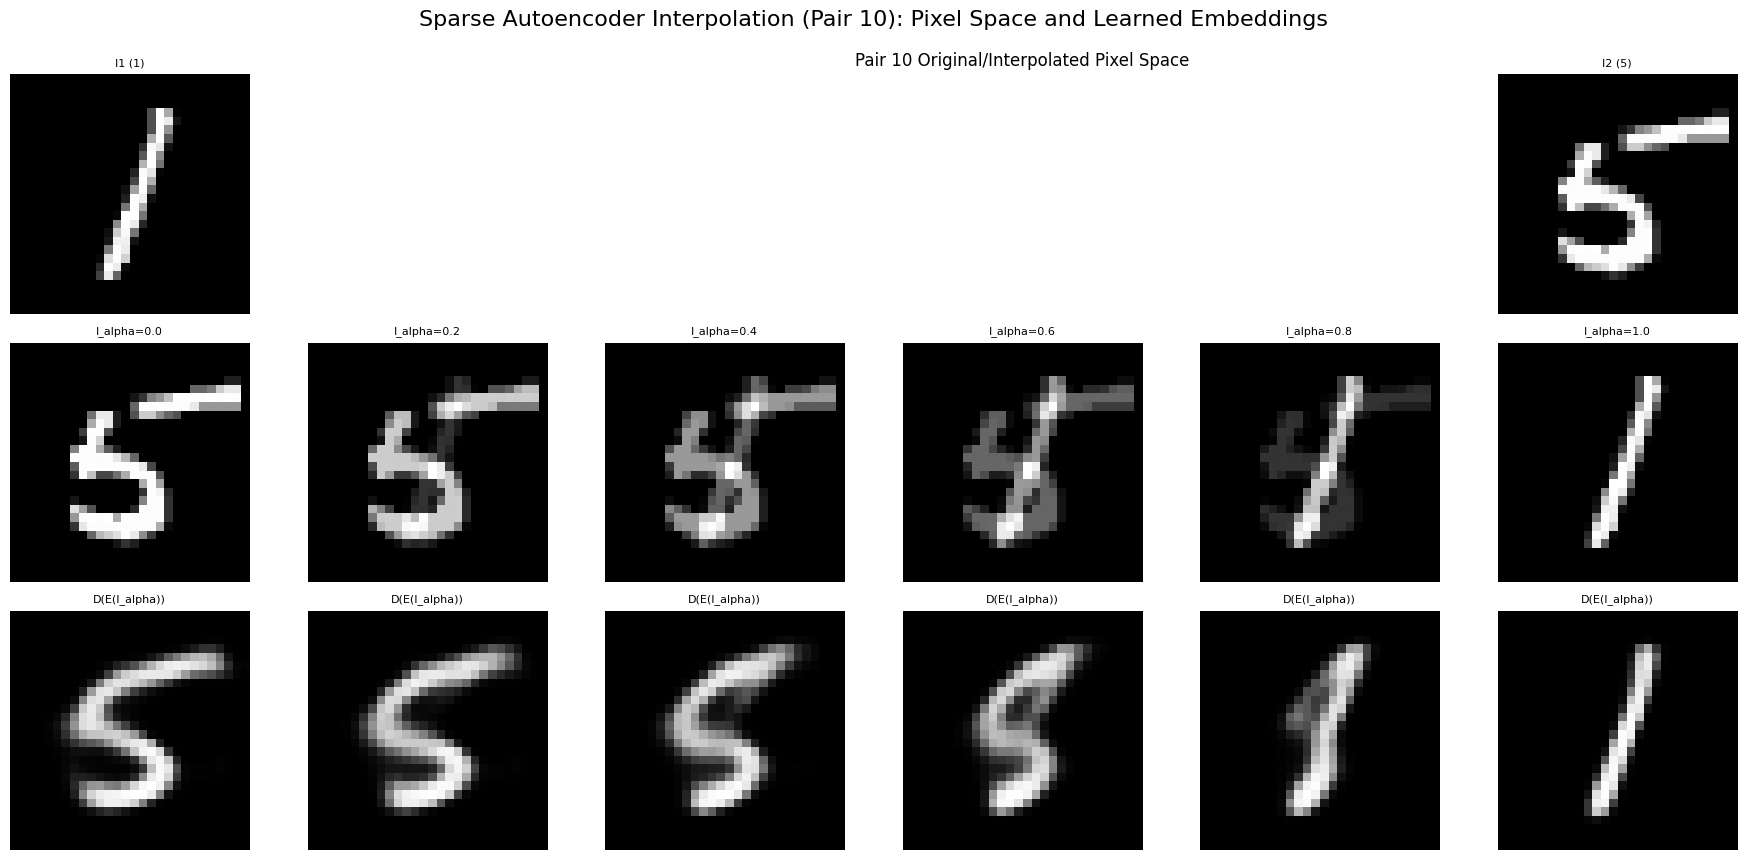

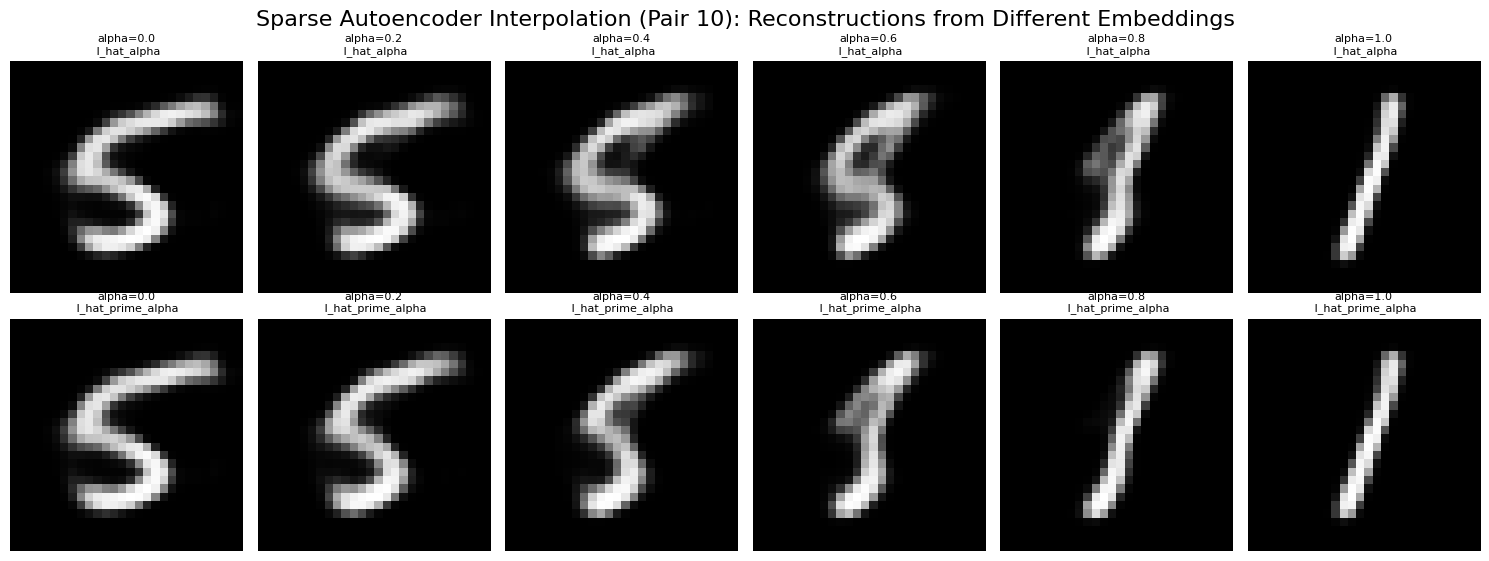


Metrics for Pair 10:
  alpha = 0.0: PSNR(I_hat_alpha, I_hat_prime_alpha) = inf dB, ||h_alpha - h_prime_alpha||_2 = 0.0000
  alpha = 0.2: PSNR(I_hat_alpha, I_hat_prime_alpha) = 19.67 dB, ||h_alpha - h_prime_alpha||_2 = 0.0249
  alpha = 0.4: PSNR(I_hat_alpha, I_hat_prime_alpha) = 16.97 dB, ||h_alpha - h_prime_alpha||_2 = 0.0368
  alpha = 0.6: PSNR(I_hat_alpha, I_hat_prime_alpha) = 17.23 dB, ||h_alpha - h_prime_alpha||_2 = 0.0395
  alpha = 0.8: PSNR(I_hat_alpha, I_hat_prime_alpha) = 24.00 dB, ||h_alpha - h_prime_alpha||_2 = 0.0229
  alpha = 1.0: PSNR(I_hat_alpha, I_hat_prime_alpha) = inf dB, ||h_alpha - h_prime_alpha||_2 = 0.0000

Processing pair 11/20...
Selected Images: I1 (class 3), I2 (class 7)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

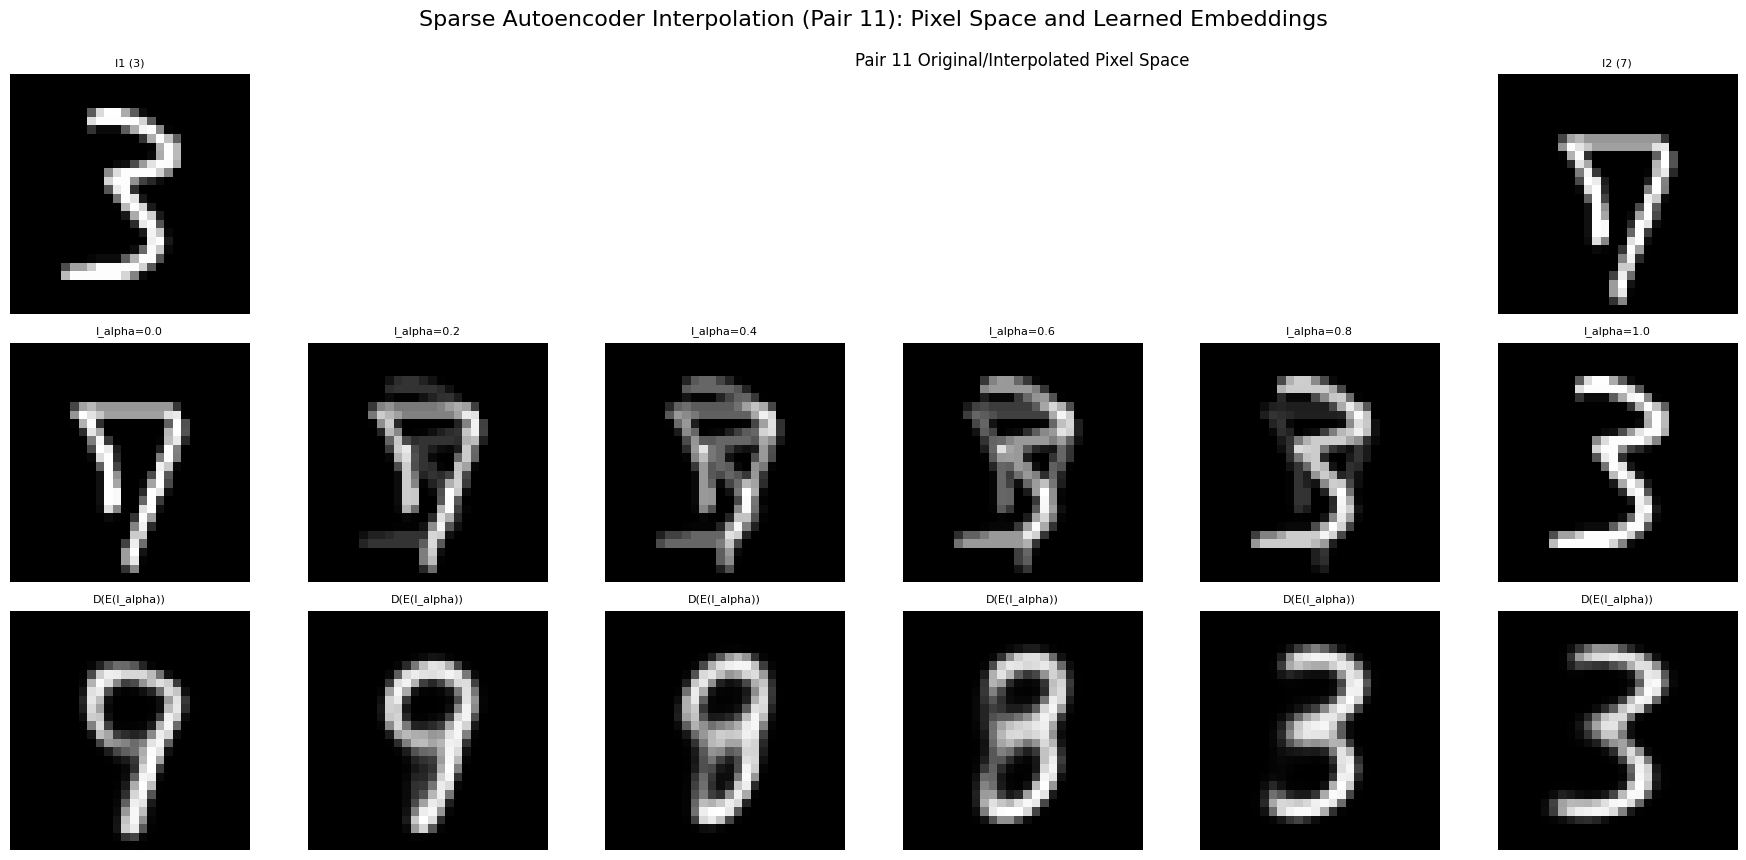

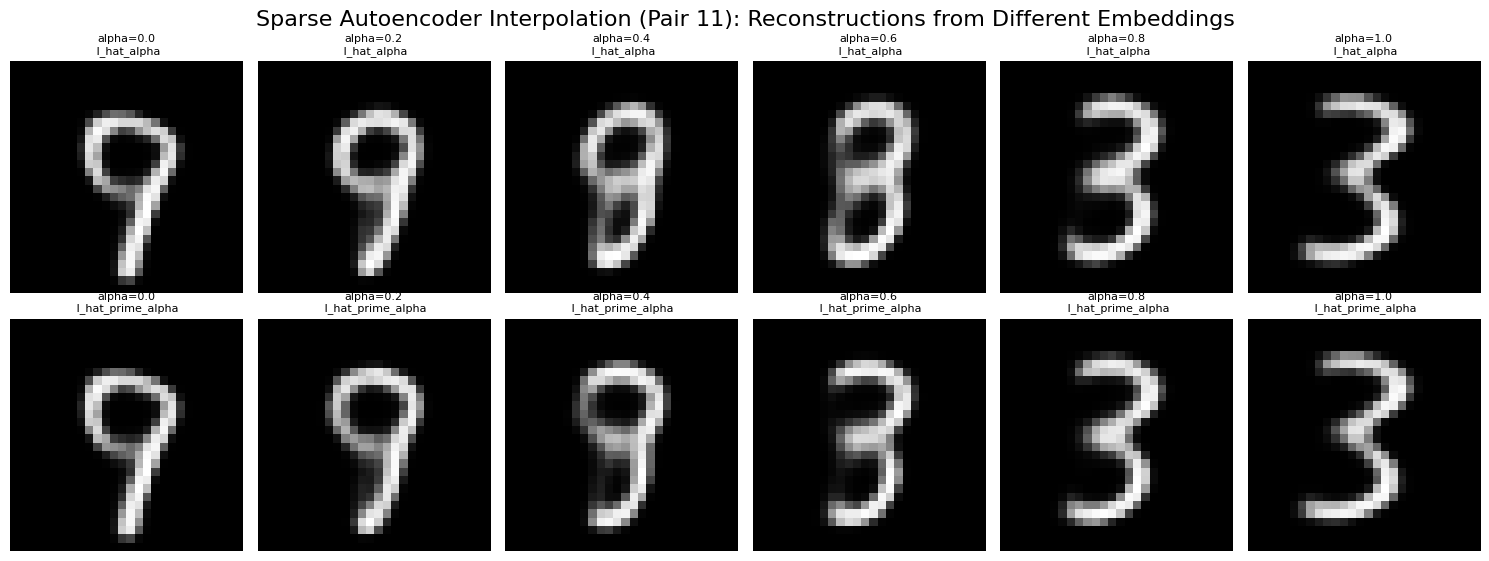


Metrics for Pair 11:
  alpha = 0.0: PSNR(I_hat_alpha, I_hat_prime_alpha) = inf dB, ||h_alpha - h_prime_alpha||_2 = 0.0000
  alpha = 0.2: PSNR(I_hat_alpha, I_hat_prime_alpha) = 24.25 dB, ||h_alpha - h_prime_alpha||_2 = 0.0227
  alpha = 0.4: PSNR(I_hat_alpha, I_hat_prime_alpha) = 20.32 dB, ||h_alpha - h_prime_alpha||_2 = 0.0322
  alpha = 0.6: PSNR(I_hat_alpha, I_hat_prime_alpha) = 20.26 dB, ||h_alpha - h_prime_alpha||_2 = 0.0325
  alpha = 0.8: PSNR(I_hat_alpha, I_hat_prime_alpha) = 23.98 dB, ||h_alpha - h_prime_alpha||_2 = 0.0198
  alpha = 1.0: PSNR(I_hat_alpha, I_hat_prime_alpha) = inf dB, ||h_alpha - h_prime_alpha||_2 = 0.0000

Processing pair 12/20...
Selected Images: I1 (class 9), I2 (class 5)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

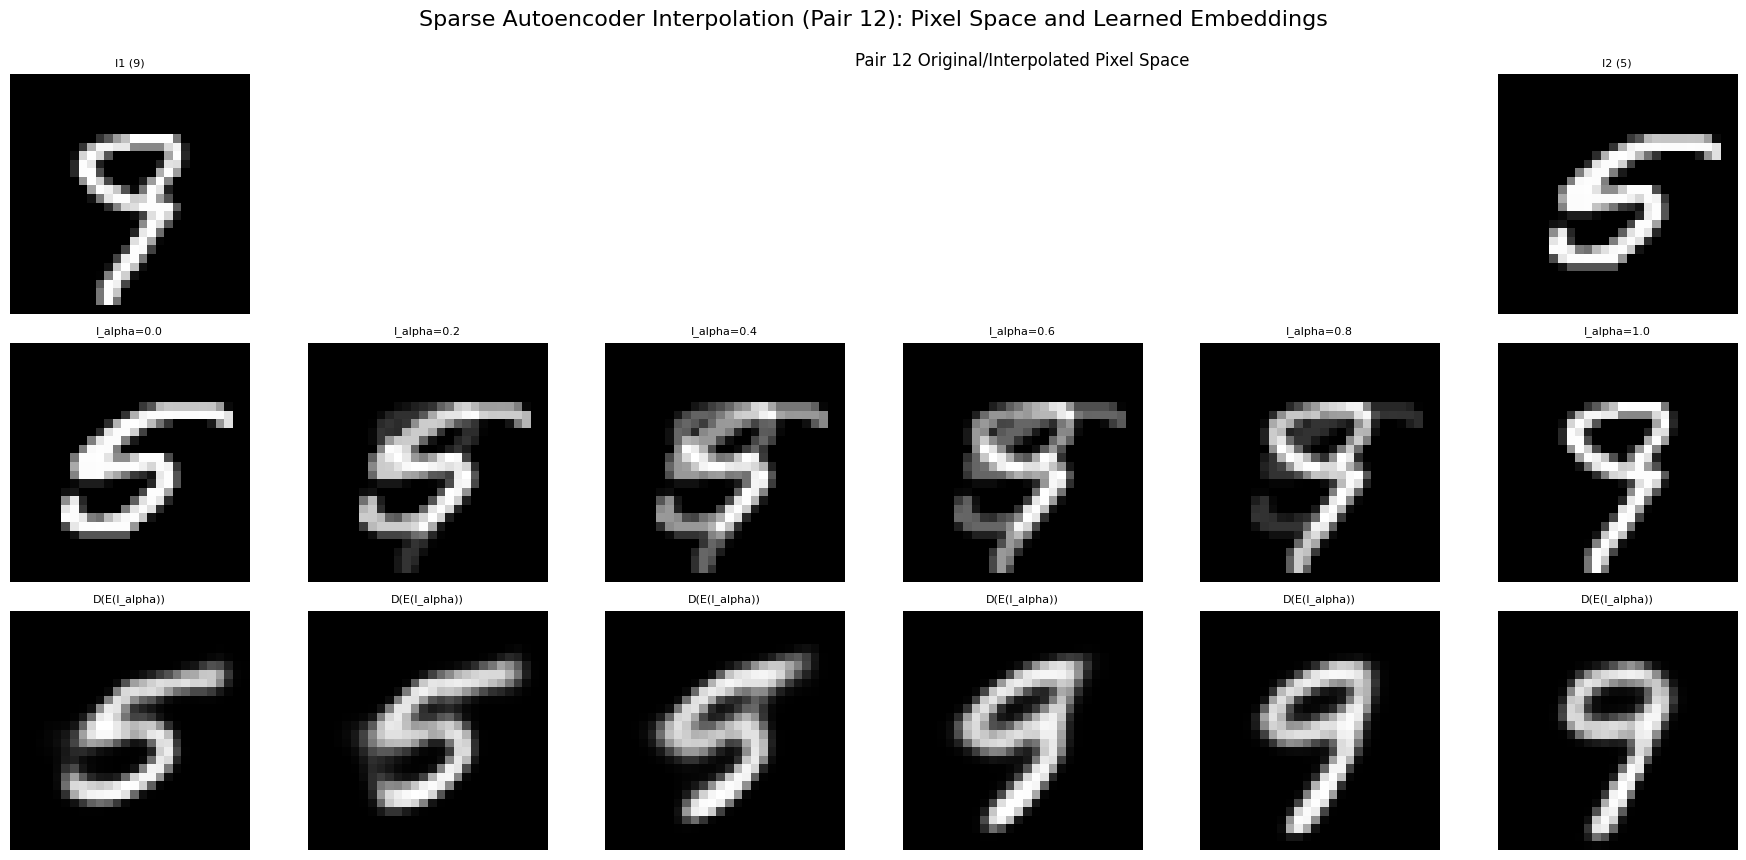

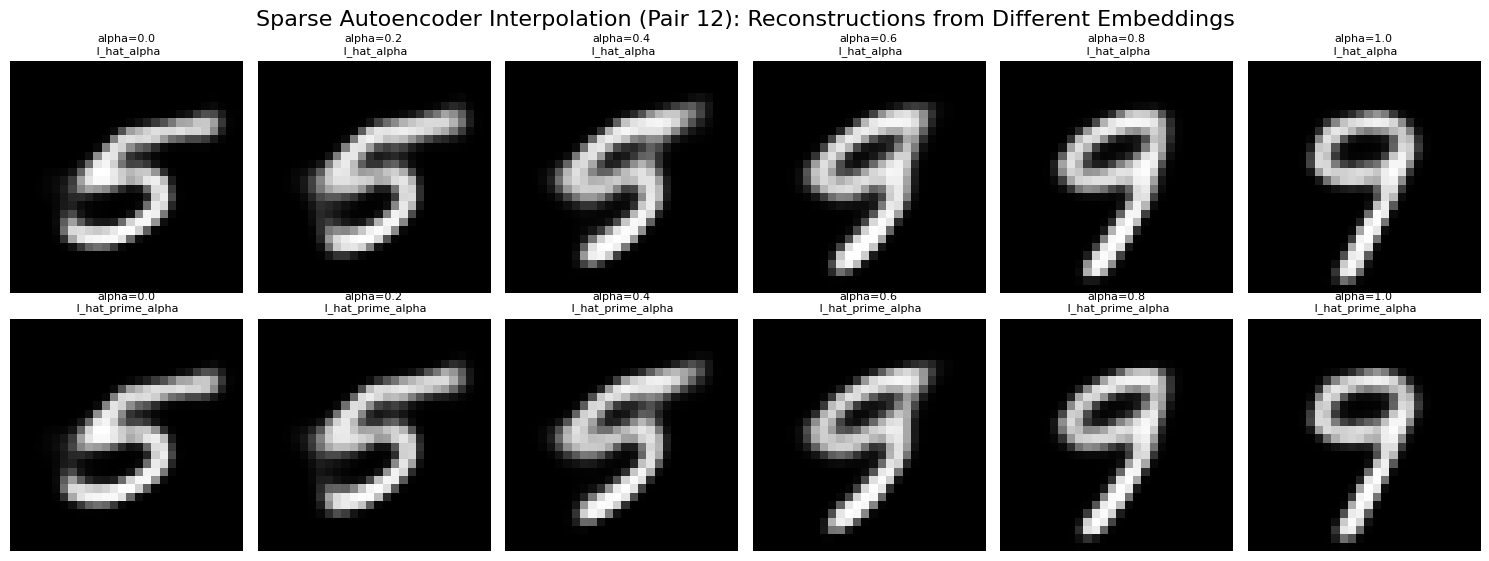


Metrics for Pair 12:
  alpha = 0.0: PSNR(I_hat_alpha, I_hat_prime_alpha) = inf dB, ||h_alpha - h_prime_alpha||_2 = 0.0000
  alpha = 0.2: PSNR(I_hat_alpha, I_hat_prime_alpha) = 31.41 dB, ||h_alpha - h_prime_alpha||_2 = 0.0088
  alpha = 0.4: PSNR(I_hat_alpha, I_hat_prime_alpha) = 27.56 dB, ||h_alpha - h_prime_alpha||_2 = 0.0146
  alpha = 0.6: PSNR(I_hat_alpha, I_hat_prime_alpha) = 27.20 dB, ||h_alpha - h_prime_alpha||_2 = 0.0170
  alpha = 0.8: PSNR(I_hat_alpha, I_hat_prime_alpha) = 31.52 dB, ||h_alpha - h_prime_alpha||_2 = 0.0098
  alpha = 1.0: PSNR(I_hat_alpha, I_hat_prime_alpha) = inf dB, ||h_alpha - h_prime_alpha||_2 = 0.0000

Processing pair 13/20...
Selected Images: I1 (class 5), I2 (class 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

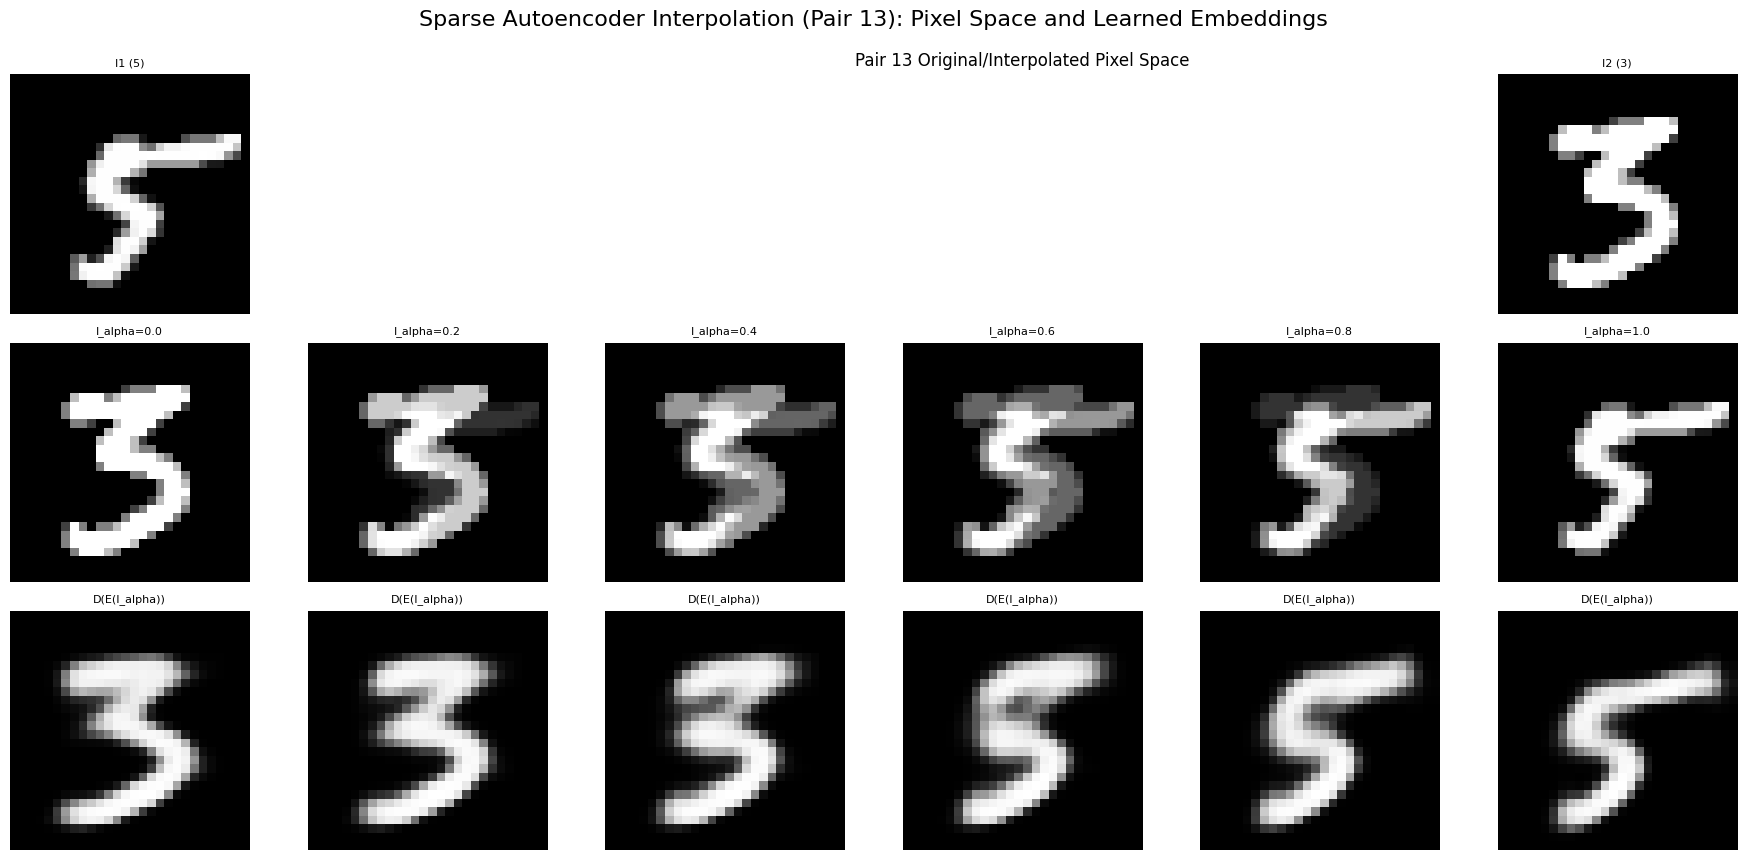

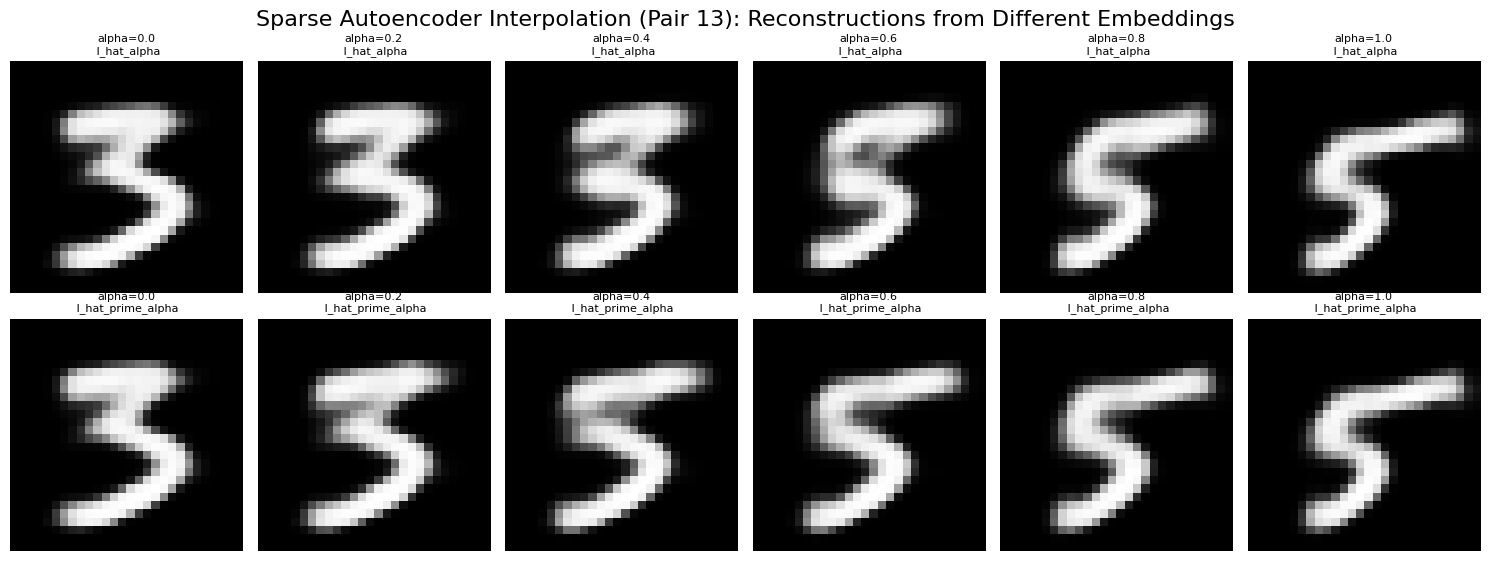


Metrics for Pair 13:
  alpha = 0.0: PSNR(I_hat_alpha, I_hat_prime_alpha) = inf dB, ||h_alpha - h_prime_alpha||_2 = 0.0000
  alpha = 0.2: PSNR(I_hat_alpha, I_hat_prime_alpha) = 20.86 dB, ||h_alpha - h_prime_alpha||_2 = 0.0260
  alpha = 0.4: PSNR(I_hat_alpha, I_hat_prime_alpha) = 18.66 dB, ||h_alpha - h_prime_alpha||_2 = 0.0395
  alpha = 0.6: PSNR(I_hat_alpha, I_hat_prime_alpha) = 18.04 dB, ||h_alpha - h_prime_alpha||_2 = 0.0422
  alpha = 0.8: PSNR(I_hat_alpha, I_hat_prime_alpha) = 21.66 dB, ||h_alpha - h_prime_alpha||_2 = 0.0293
  alpha = 1.0: PSNR(I_hat_alpha, I_hat_prime_alpha) = inf dB, ||h_alpha - h_prime_alpha||_2 = 0.0000

Processing pair 14/20...
Selected Images: I1 (class 5), I2 (class 9)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

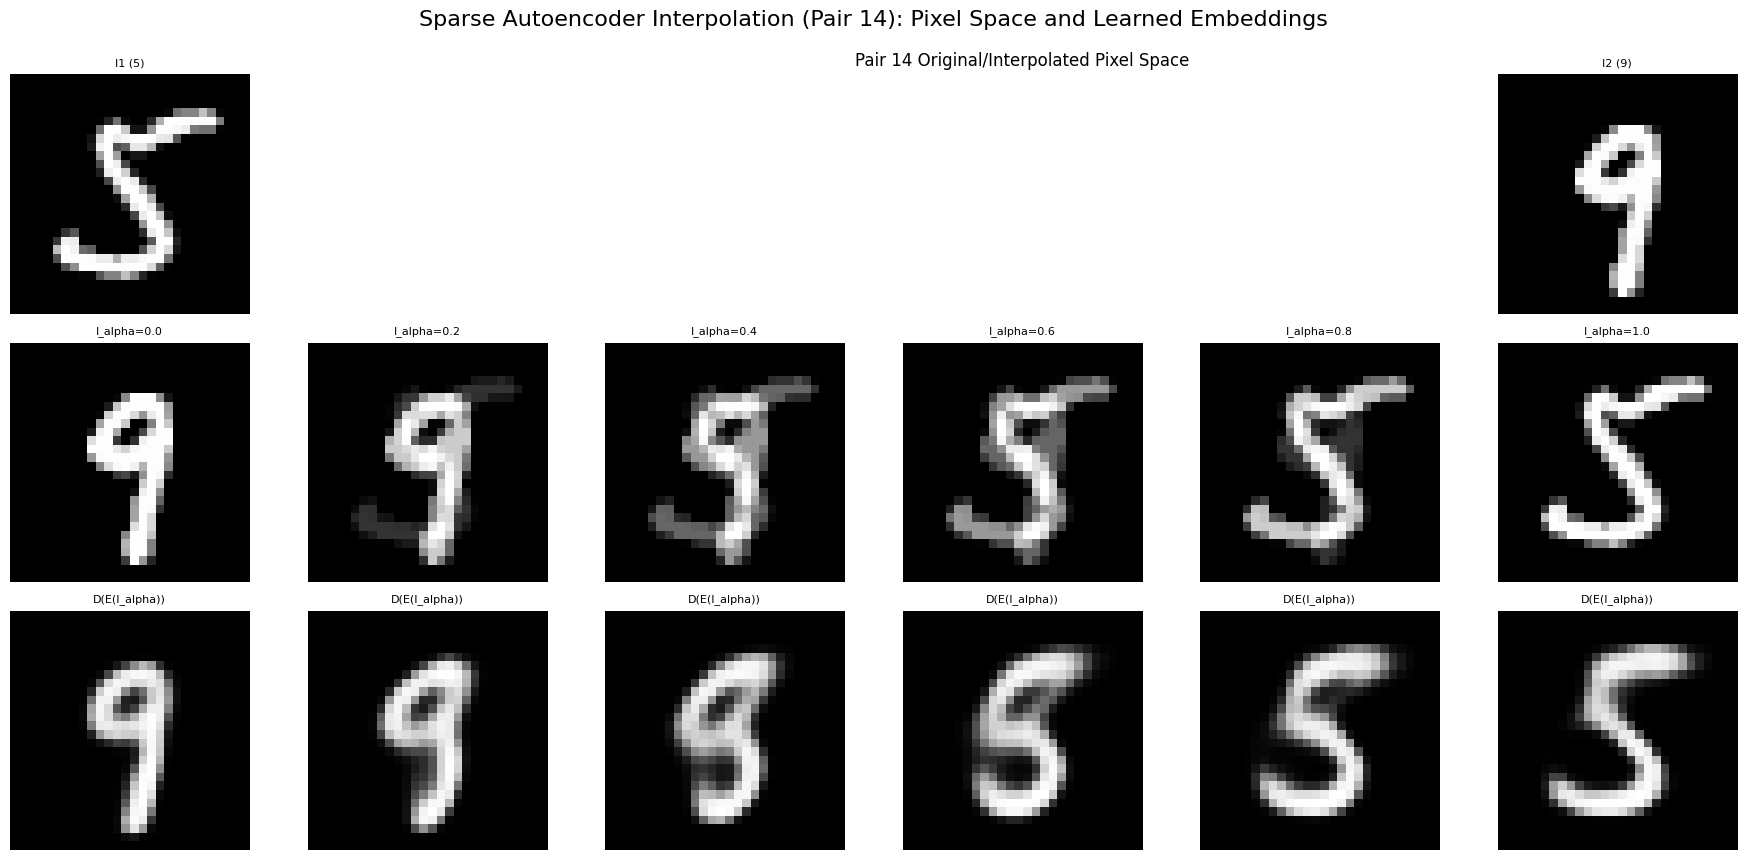

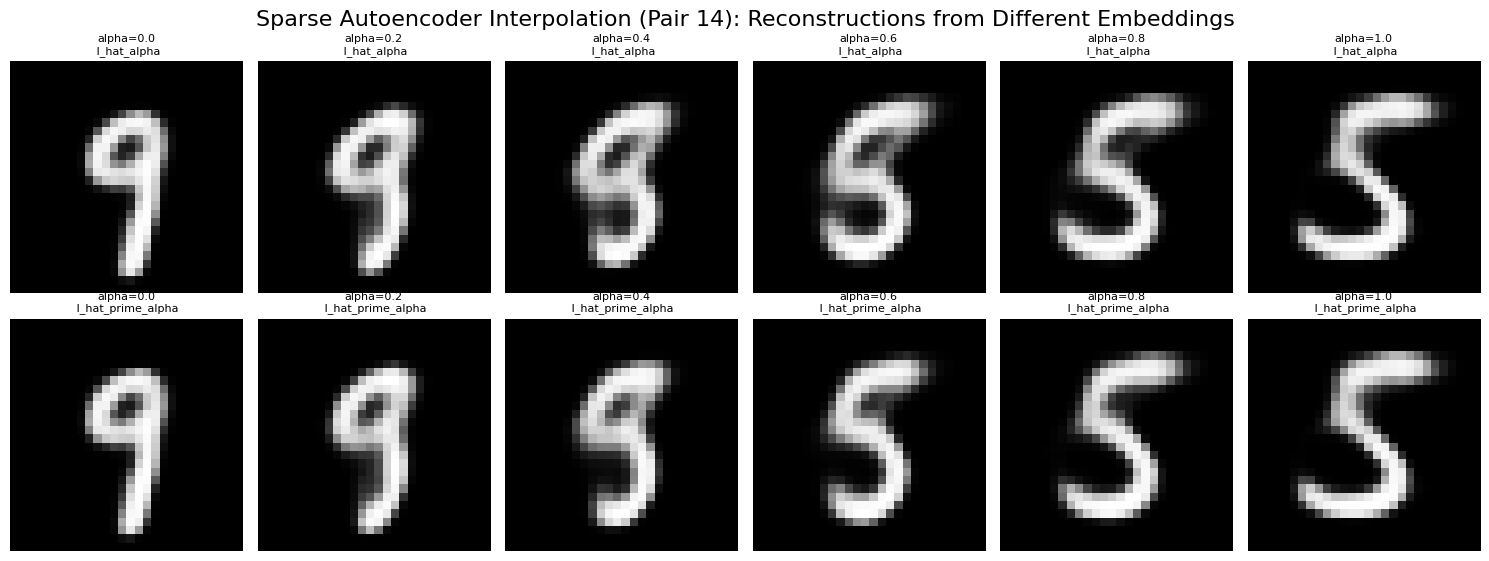


Metrics for Pair 14:
  alpha = 0.0: PSNR(I_hat_alpha, I_hat_prime_alpha) = inf dB, ||h_alpha - h_prime_alpha||_2 = 0.0000
  alpha = 0.2: PSNR(I_hat_alpha, I_hat_prime_alpha) = 29.88 dB, ||h_alpha - h_prime_alpha||_2 = 0.0116
  alpha = 0.4: PSNR(I_hat_alpha, I_hat_prime_alpha) = 22.93 dB, ||h_alpha - h_prime_alpha||_2 = 0.0207
  alpha = 0.6: PSNR(I_hat_alpha, I_hat_prime_alpha) = 21.56 dB, ||h_alpha - h_prime_alpha||_2 = 0.0249
  alpha = 0.8: PSNR(I_hat_alpha, I_hat_prime_alpha) = 26.07 dB, ||h_alpha - h_prime_alpha||_2 = 0.0186
  alpha = 1.0: PSNR(I_hat_alpha, I_hat_prime_alpha) = inf dB, ||h_alpha - h_prime_alpha||_2 = 0.0000

Processing pair 15/20...
Selected Images: I1 (class 8), I2 (class 0)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

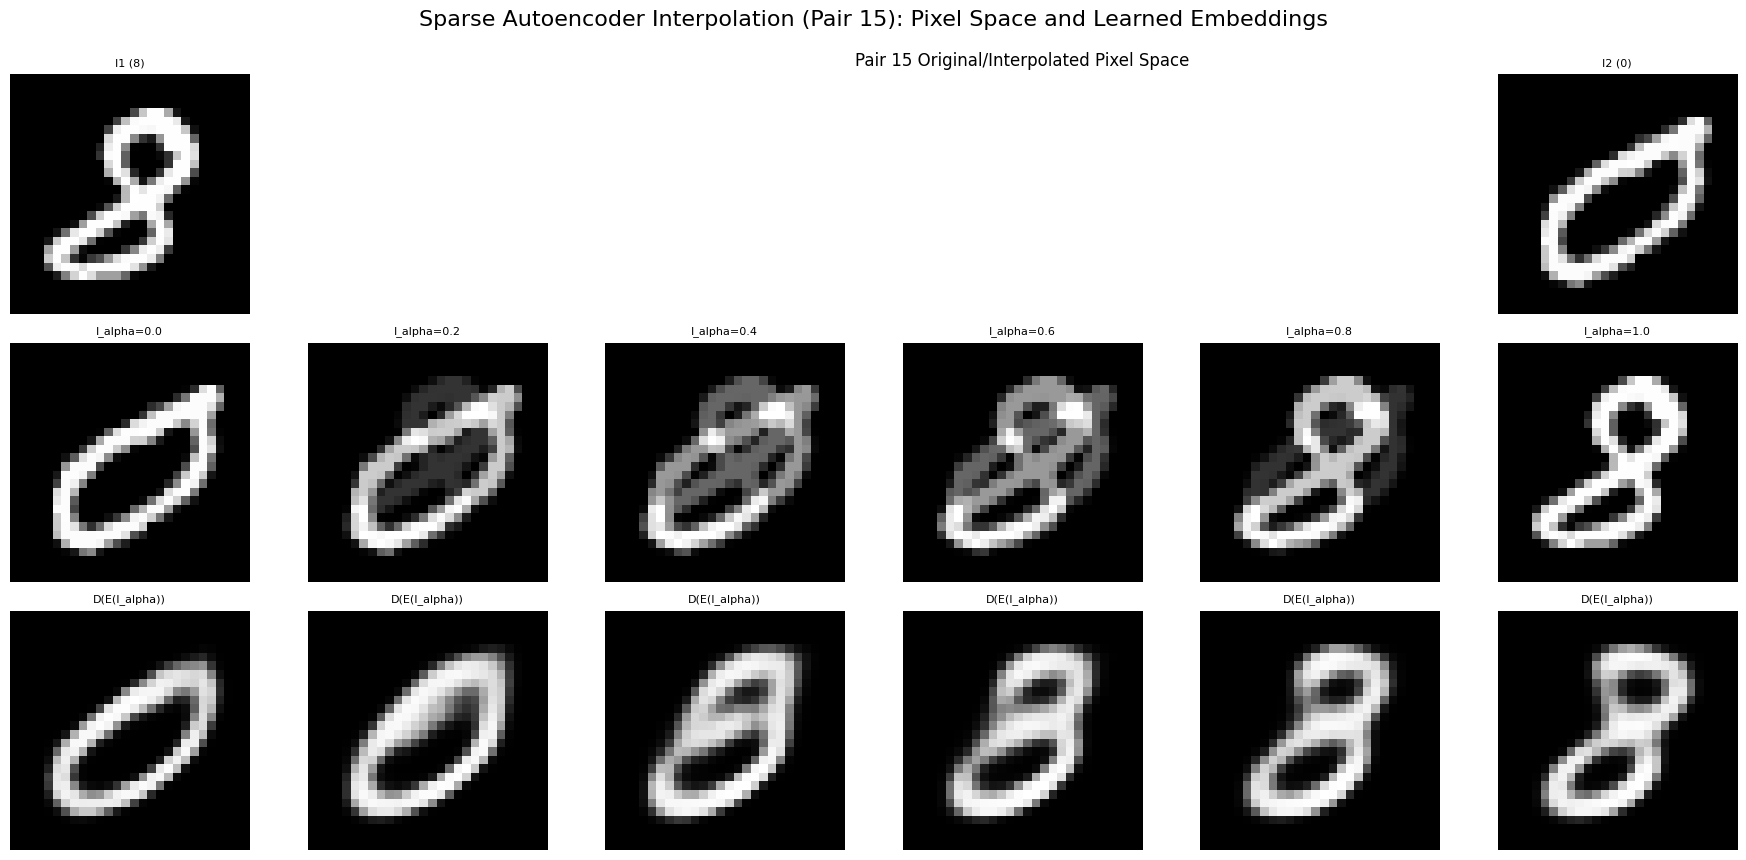

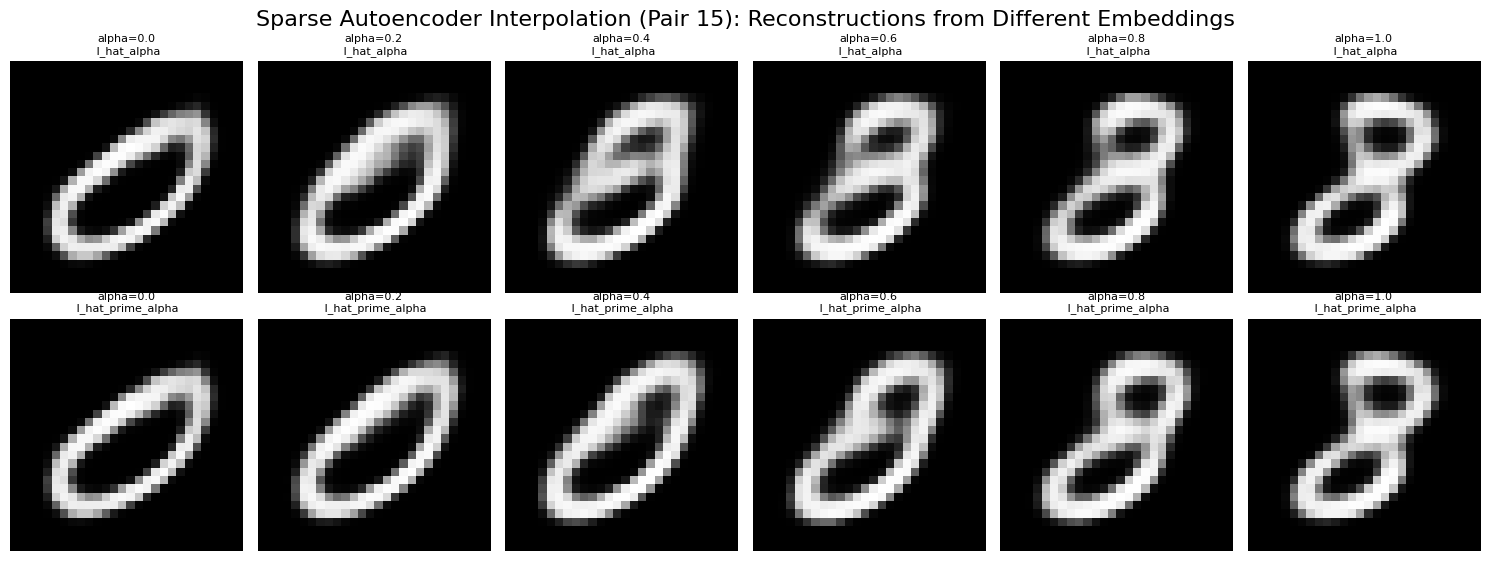


Metrics for Pair 15:
  alpha = 0.0: PSNR(I_hat_alpha, I_hat_prime_alpha) = inf dB, ||h_alpha - h_prime_alpha||_2 = 0.0000
  alpha = 0.2: PSNR(I_hat_alpha, I_hat_prime_alpha) = 20.33 dB, ||h_alpha - h_prime_alpha||_2 = 0.0276
  alpha = 0.4: PSNR(I_hat_alpha, I_hat_prime_alpha) = 15.41 dB, ||h_alpha - h_prime_alpha||_2 = 0.0432
  alpha = 0.6: PSNR(I_hat_alpha, I_hat_prime_alpha) = 15.61 dB, ||h_alpha - h_prime_alpha||_2 = 0.0419
  alpha = 0.8: PSNR(I_hat_alpha, I_hat_prime_alpha) = 19.64 dB, ||h_alpha - h_prime_alpha||_2 = 0.0263
  alpha = 1.0: PSNR(I_hat_alpha, I_hat_prime_alpha) = inf dB, ||h_alpha - h_prime_alpha||_2 = 0.0000

Processing pair 16/20...
Selected Images: I1 (class 0), I2 (class 2)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

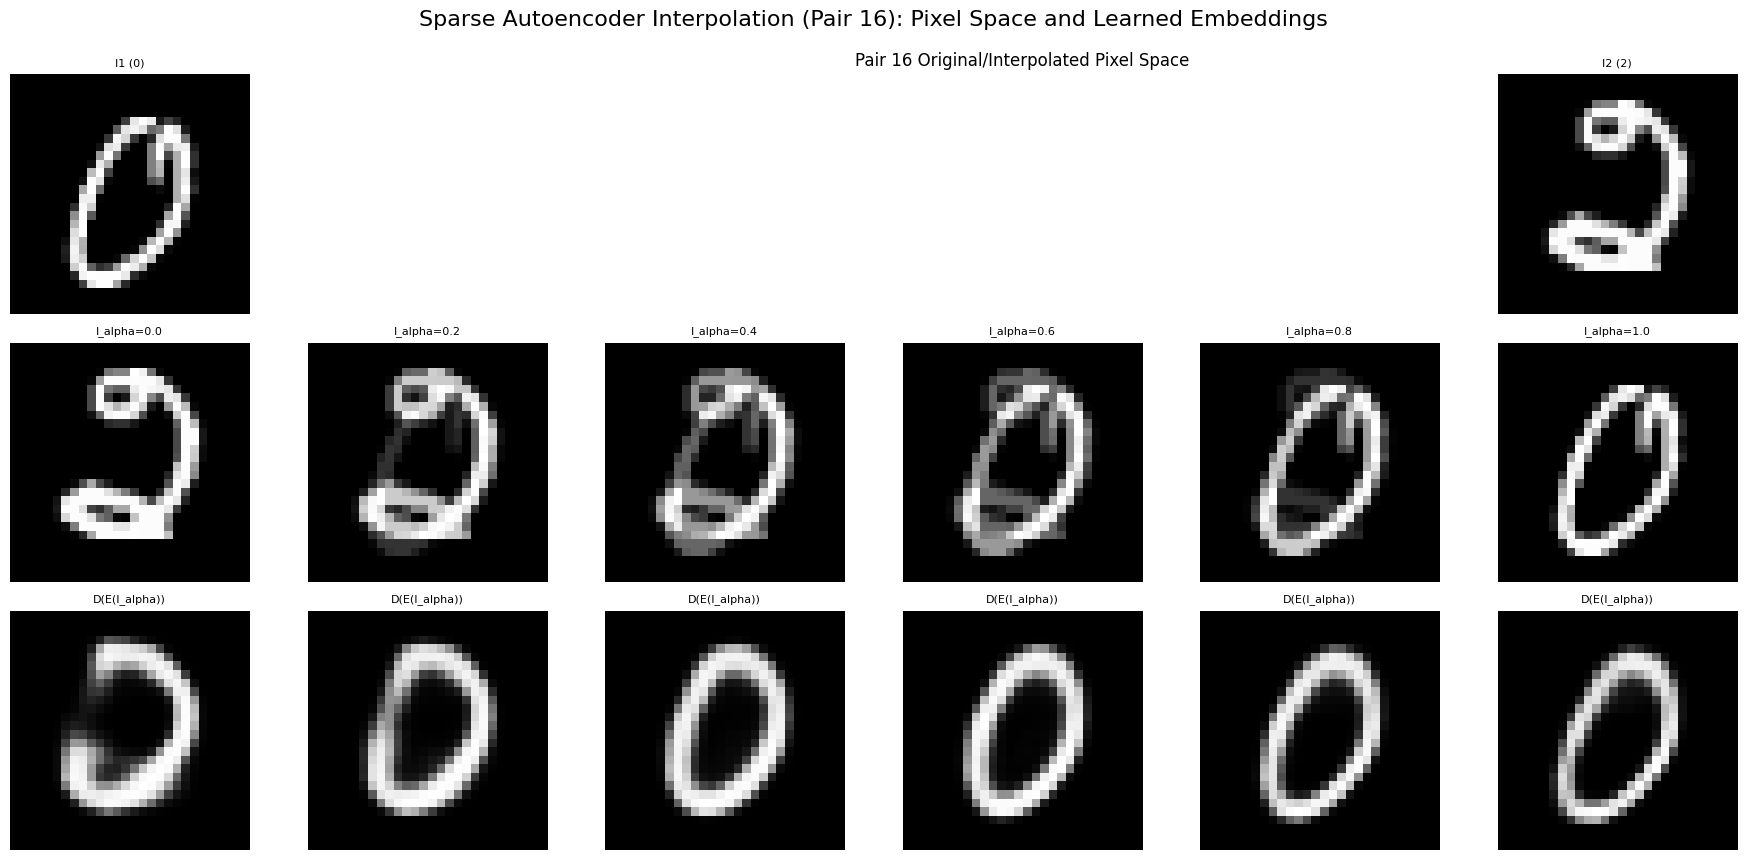

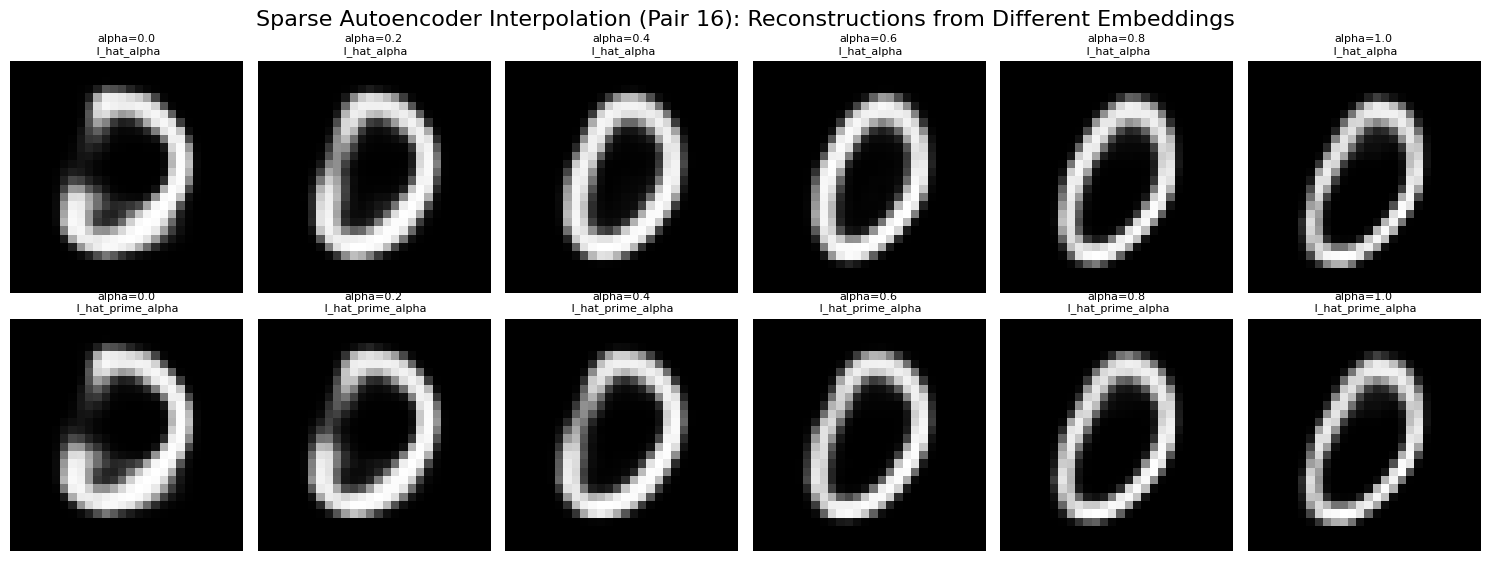


Metrics for Pair 16:
  alpha = 0.0: PSNR(I_hat_alpha, I_hat_prime_alpha) = inf dB, ||h_alpha - h_prime_alpha||_2 = 0.0000
  alpha = 0.2: PSNR(I_hat_alpha, I_hat_prime_alpha) = 23.96 dB, ||h_alpha - h_prime_alpha||_2 = 0.0240
  alpha = 0.4: PSNR(I_hat_alpha, I_hat_prime_alpha) = 19.72 dB, ||h_alpha - h_prime_alpha||_2 = 0.0362
  alpha = 0.6: PSNR(I_hat_alpha, I_hat_prime_alpha) = 20.13 dB, ||h_alpha - h_prime_alpha||_2 = 0.0341
  alpha = 0.8: PSNR(I_hat_alpha, I_hat_prime_alpha) = 24.06 dB, ||h_alpha - h_prime_alpha||_2 = 0.0205
  alpha = 1.0: PSNR(I_hat_alpha, I_hat_prime_alpha) = inf dB, ||h_alpha - h_prime_alpha||_2 = 0.0000

Processing pair 17/20...
Selected Images: I1 (class 1), I2 (class 6)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

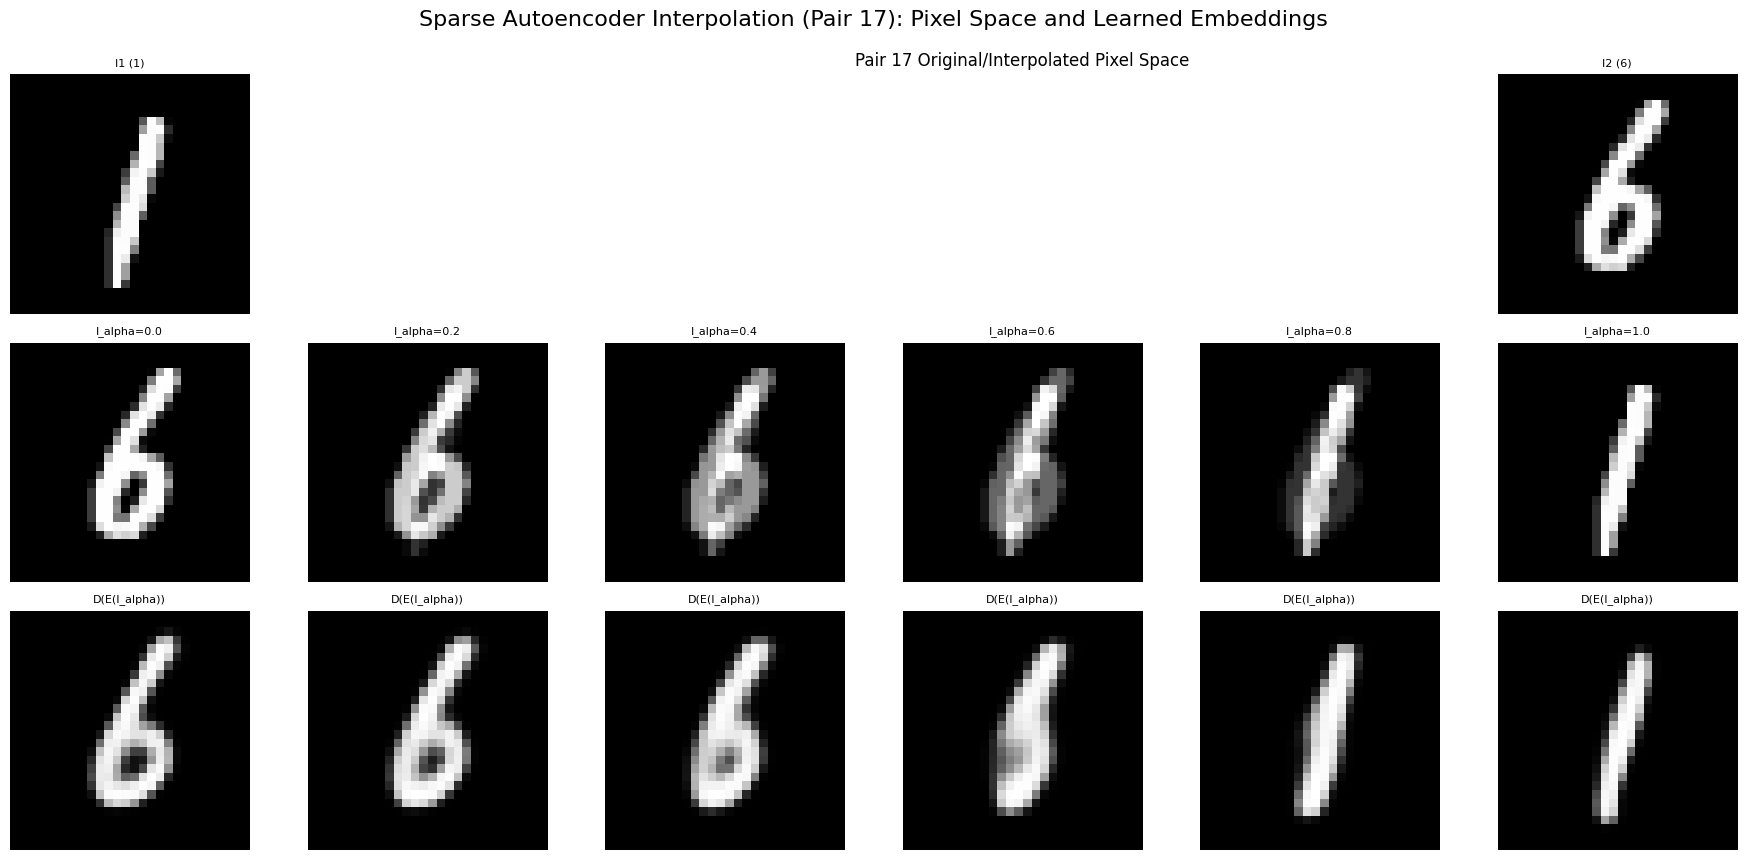

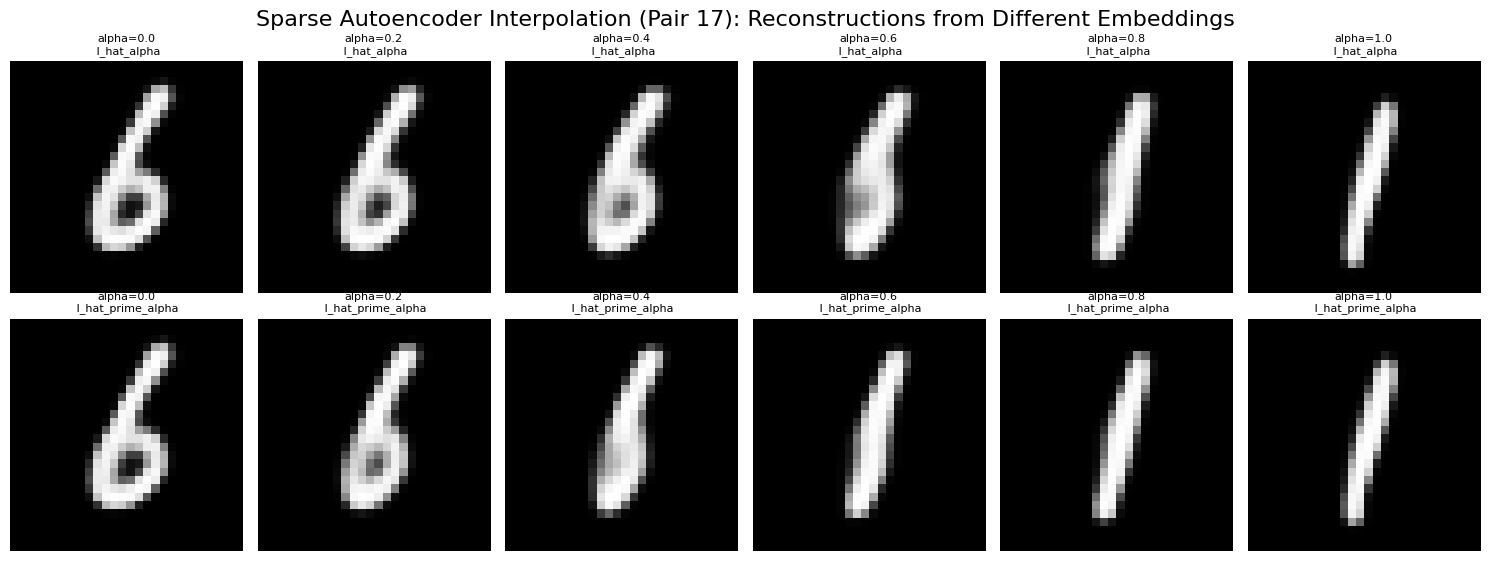


Metrics for Pair 17:
  alpha = 0.0: PSNR(I_hat_alpha, I_hat_prime_alpha) = inf dB, ||h_alpha - h_prime_alpha||_2 = 0.0000
  alpha = 0.2: PSNR(I_hat_alpha, I_hat_prime_alpha) = 23.94 dB, ||h_alpha - h_prime_alpha||_2 = 0.0106
  alpha = 0.4: PSNR(I_hat_alpha, I_hat_prime_alpha) = 18.60 dB, ||h_alpha - h_prime_alpha||_2 = 0.0208
  alpha = 0.6: PSNR(I_hat_alpha, I_hat_prime_alpha) = 19.93 dB, ||h_alpha - h_prime_alpha||_2 = 0.0222
  alpha = 0.8: PSNR(I_hat_alpha, I_hat_prime_alpha) = 25.27 dB, ||h_alpha - h_prime_alpha||_2 = 0.0146
  alpha = 1.0: PSNR(I_hat_alpha, I_hat_prime_alpha) = inf dB, ||h_alpha - h_prime_alpha||_2 = 0.0000

Processing pair 18/20...
Selected Images: I1 (class 5), I2 (class 7)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s

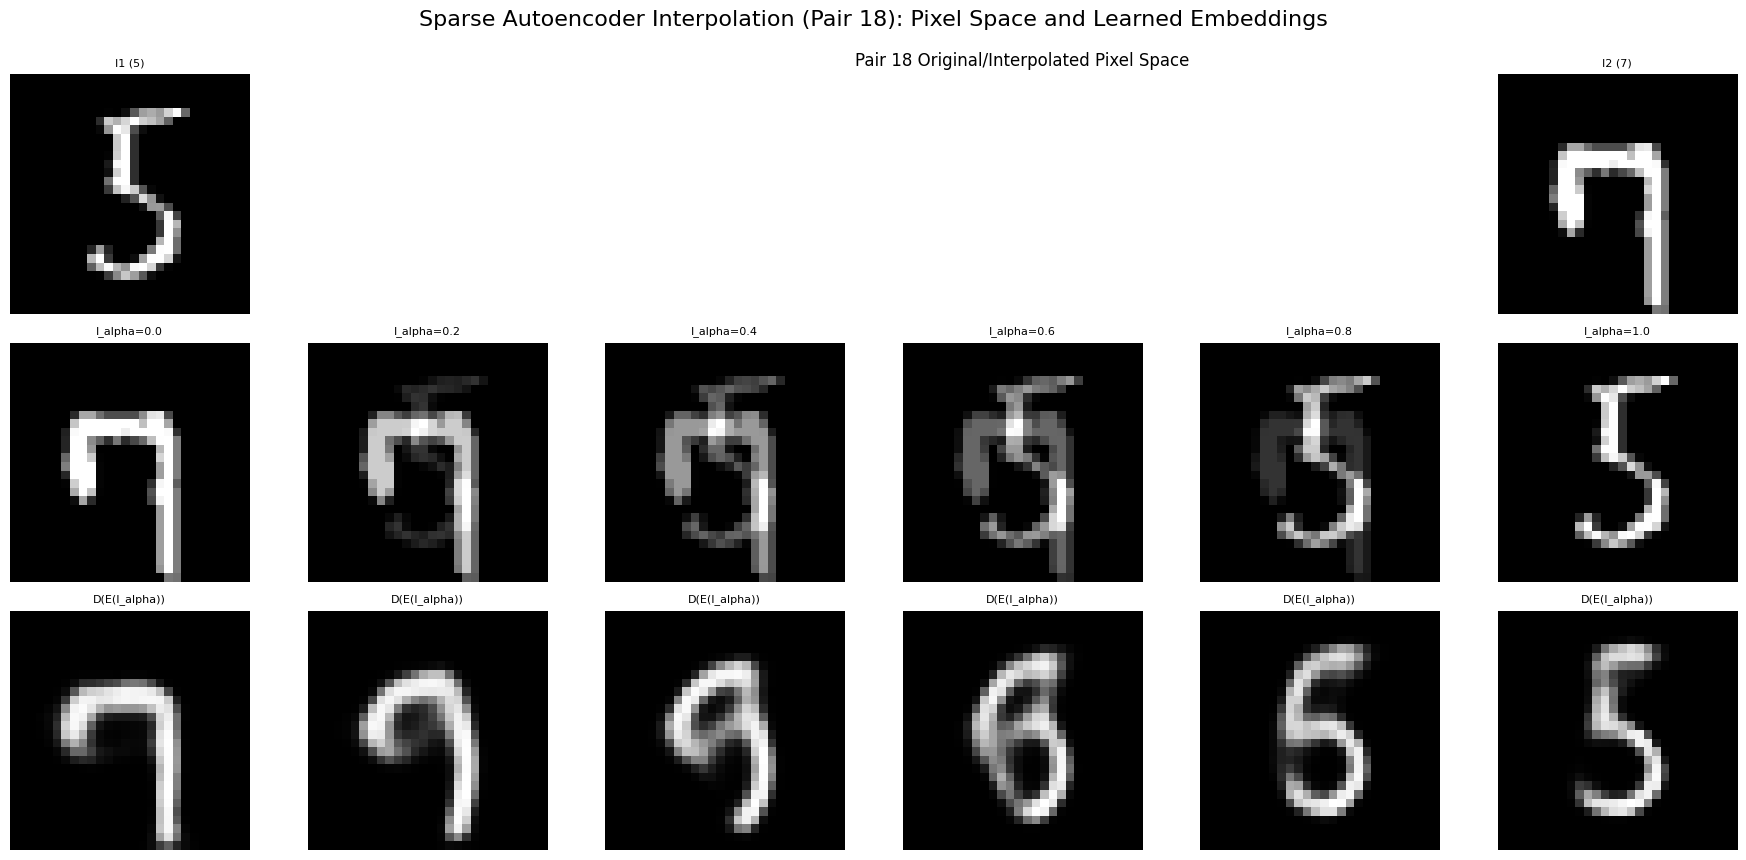

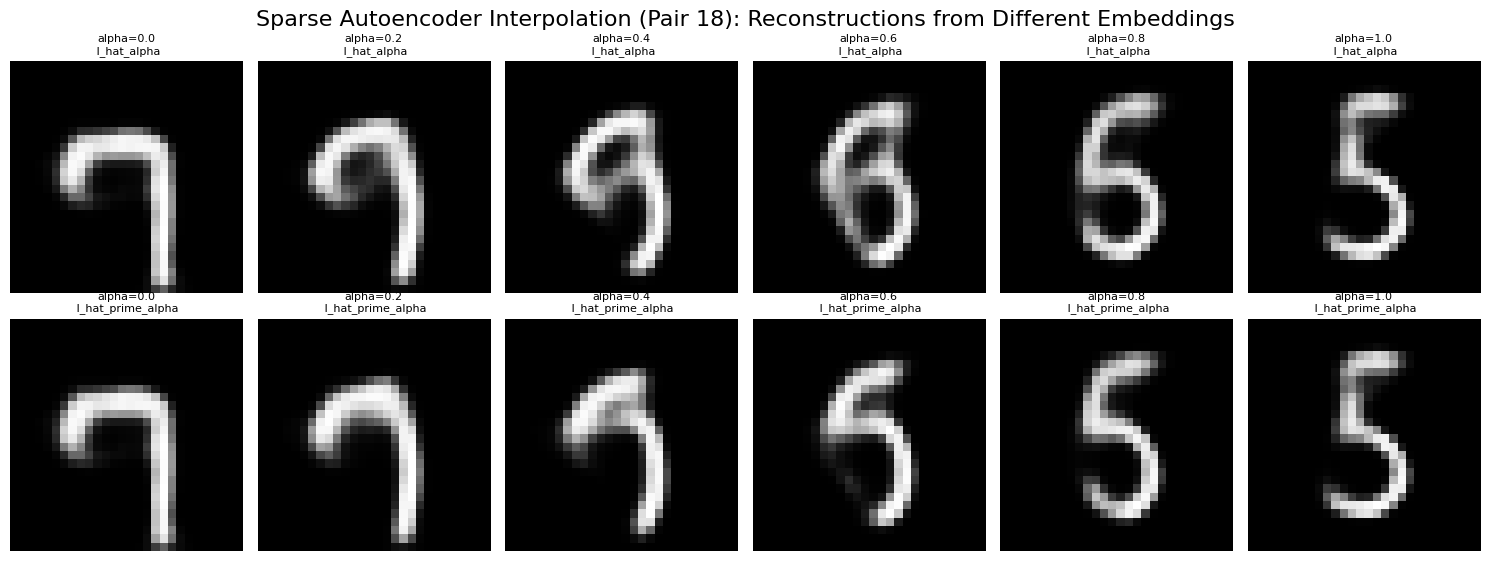


Metrics for Pair 18:
  alpha = 0.0: PSNR(I_hat_alpha, I_hat_prime_alpha) = inf dB, ||h_alpha - h_prime_alpha||_2 = 0.0000
  alpha = 0.2: PSNR(I_hat_alpha, I_hat_prime_alpha) = 22.81 dB, ||h_alpha - h_prime_alpha||_2 = 0.0204
  alpha = 0.4: PSNR(I_hat_alpha, I_hat_prime_alpha) = 18.46 dB, ||h_alpha - h_prime_alpha||_2 = 0.0351
  alpha = 0.6: PSNR(I_hat_alpha, I_hat_prime_alpha) = 19.39 dB, ||h_alpha - h_prime_alpha||_2 = 0.0373
  alpha = 0.8: PSNR(I_hat_alpha, I_hat_prime_alpha) = 23.32 dB, ||h_alpha - h_prime_alpha||_2 = 0.0292
  alpha = 1.0: PSNR(I_hat_alpha, I_hat_prime_alpha) = inf dB, ||h_alpha - h_prime_alpha||_2 = 0.0000

Processing pair 19/20...
Selected Images: I1 (class 7), I2 (class 8)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

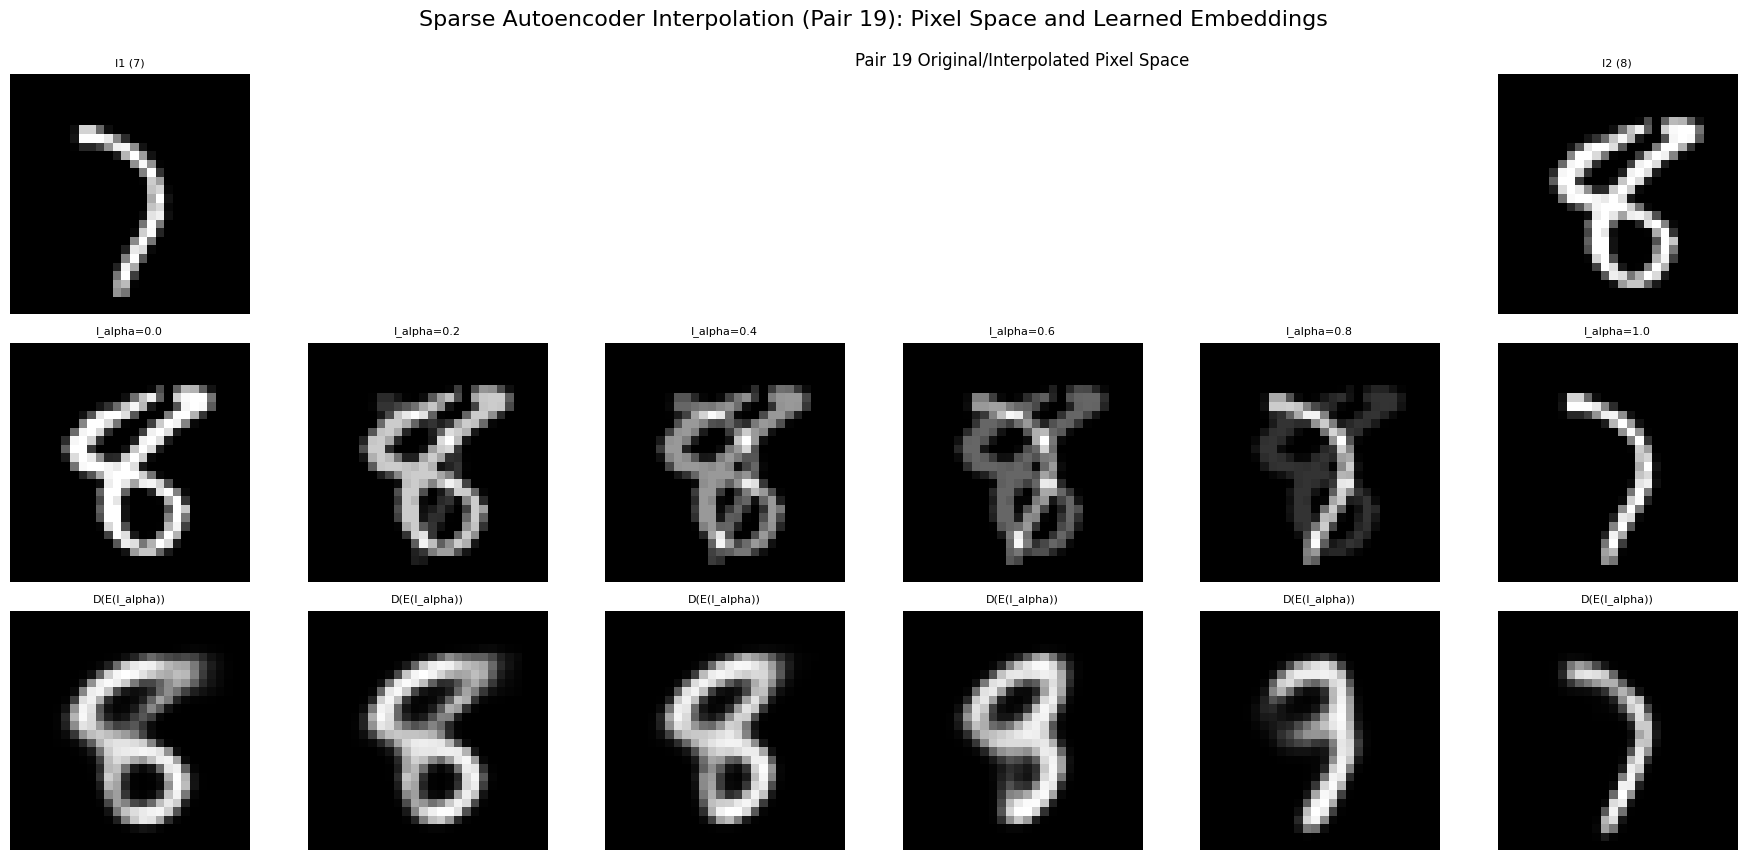

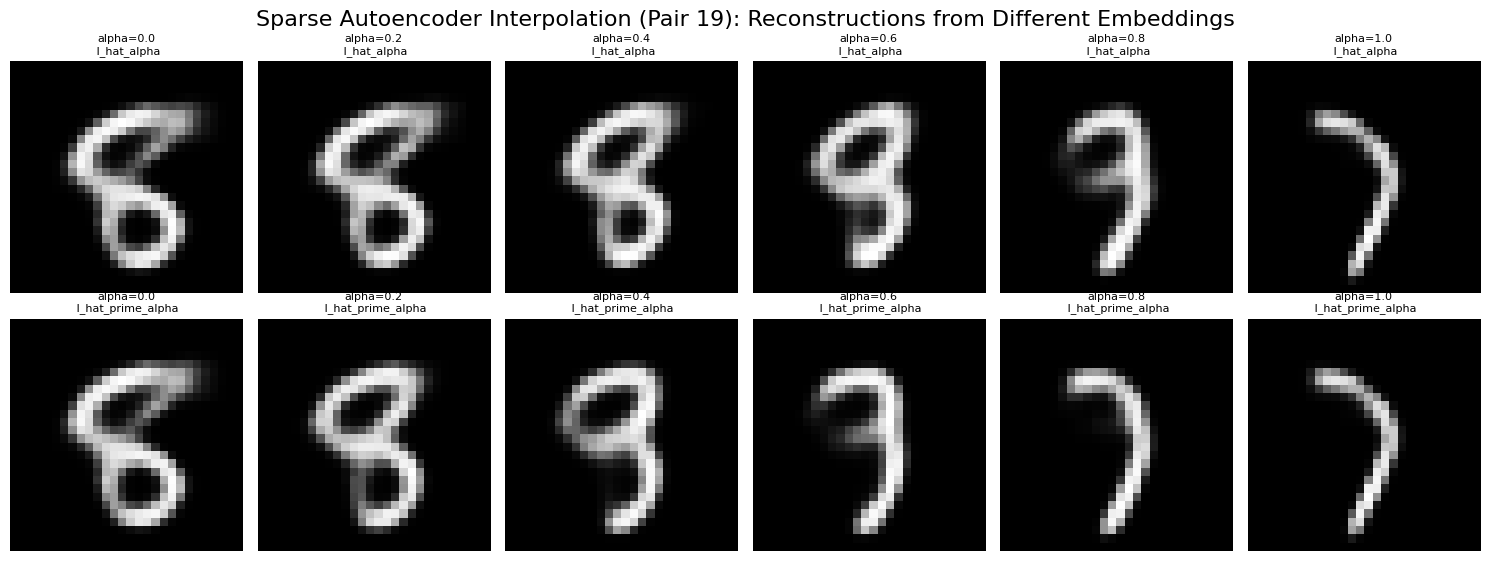


Metrics for Pair 19:
  alpha = 0.0: PSNR(I_hat_alpha, I_hat_prime_alpha) = inf dB, ||h_alpha - h_prime_alpha||_2 = 0.0000
  alpha = 0.2: PSNR(I_hat_alpha, I_hat_prime_alpha) = 19.28 dB, ||h_alpha - h_prime_alpha||_2 = 0.0335
  alpha = 0.4: PSNR(I_hat_alpha, I_hat_prime_alpha) = 16.17 dB, ||h_alpha - h_prime_alpha||_2 = 0.0550
  alpha = 0.6: PSNR(I_hat_alpha, I_hat_prime_alpha) = 14.89 dB, ||h_alpha - h_prime_alpha||_2 = 0.0667
  alpha = 0.8: PSNR(I_hat_alpha, I_hat_prime_alpha) = 18.99 dB, ||h_alpha - h_prime_alpha||_2 = 0.0480
  alpha = 1.0: PSNR(I_hat_alpha, I_hat_prime_alpha) = inf dB, ||h_alpha - h_prime_alpha||_2 = 0.0000

Processing pair 20/20...
Selected Images: I1 (class 7), I2 (class 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

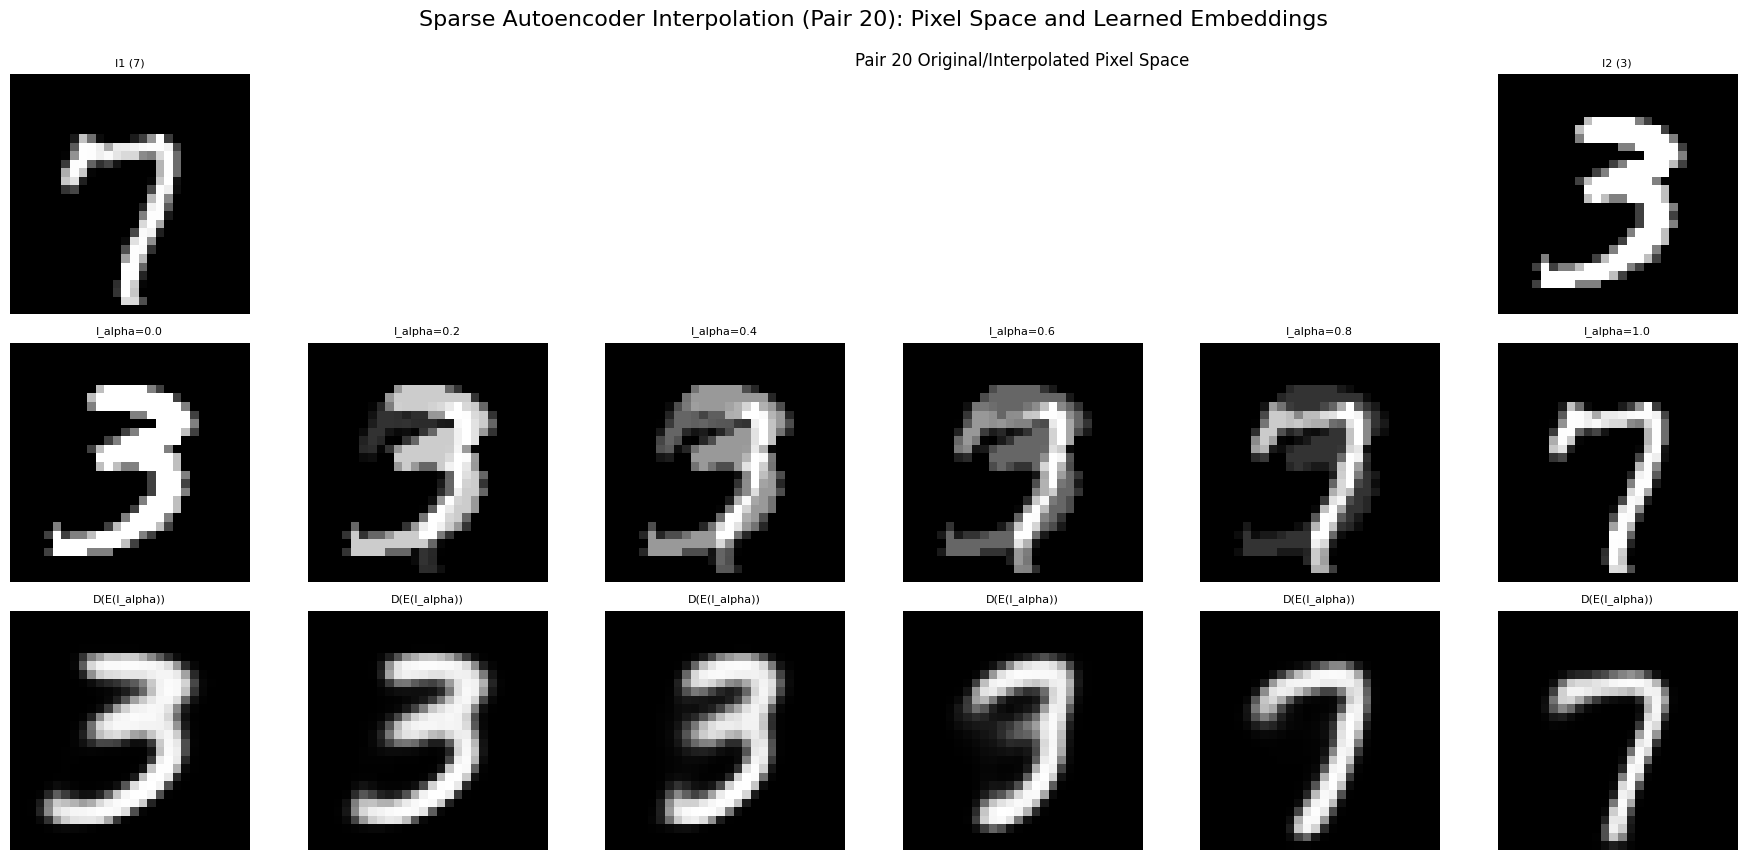

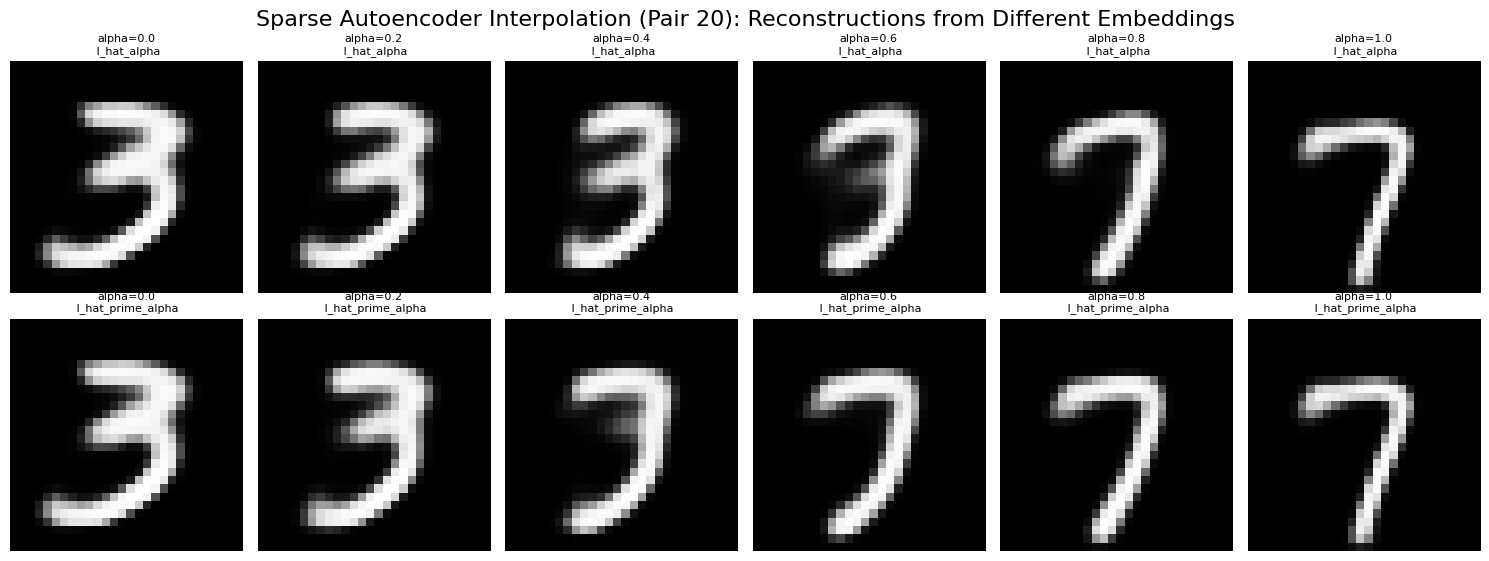


Metrics for Pair 20:
  alpha = 0.0: PSNR(I_hat_alpha, I_hat_prime_alpha) = inf dB, ||h_alpha - h_prime_alpha||_2 = 0.0000
  alpha = 0.2: PSNR(I_hat_alpha, I_hat_prime_alpha) = 21.91 dB, ||h_alpha - h_prime_alpha||_2 = 0.0240
  alpha = 0.4: PSNR(I_hat_alpha, I_hat_prime_alpha) = 17.15 dB, ||h_alpha - h_prime_alpha||_2 = 0.0422
  alpha = 0.6: PSNR(I_hat_alpha, I_hat_prime_alpha) = 19.51 dB, ||h_alpha - h_prime_alpha||_2 = 0.0435
  alpha = 0.8: PSNR(I_hat_alpha, I_hat_prime_alpha) = 24.22 dB, ||h_alpha - h_prime_alpha||_2 = 0.0307
  alpha = 1.0: PSNR(I_hat_alpha, I_hat_prime_alpha) = inf dB, ||h_alpha - h_prime_alpha||_2 = 0.0000

--- Average Metrics for Sparse Autoencoder over 20 Pairs ---
  alpha = 0.0: Average PSNR(I_hat_alpha, I_hat_prime_alpha) = inf dB, Average ||h_alpha - h_prime_alpha||_2 = 0.0000
  alpha = 0.2: Average PSNR(I_hat_alpha, I_hat_prime_alpha) = 22.48 dB, Average ||h_alpha - h_prime_alpha||_2 = 0.0264
  alpha = 0.4: Average PSNR(I_hat_alpha, I_hat_prime_alpha) = 18.2

In [14]:
main_sparse_autoencoder()

Invoke main_contractive_autoencoder function


--- Executing Contractive Autoencoder ---


Model: "contractive_autoencoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ contractive_ae_input            │ (None, 28, 28, 1)      │             0 │
│ (InputLayer)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ encoder (Functional)            │ (None, 64)             │       219,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder (Functional)            │ (None, 28, 28, 1)      │       259,521 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 479,105 (1.83 MB)

 Trainable params: 479,105 (1.83 MB)

 Non-trainable params: 0 (0.00 B)


--- Contractive Autoencoder Training using Mean Squared Error (reconstruction loss). ---
----------------------------------------------------------


Training contractive_autoencoder...
Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 46s 93ms/step - loss: 0.1199 - val_loss: 0.1140
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 46s 99ms/step - loss: 0.1121 - val_loss: 0.1140
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 50s 107ms/step - loss: 0.1121 - val_loss: 0.1140
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 49s 105ms/step - loss: 0.1121 - val_loss: 0.1140
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 47s 100ms/step - loss: 0.1121 - val_loss: 0.1140
Finished training contractive_autoencoder.

Generating t-SNE plot for Contractive Autoencoder Latent Space...
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


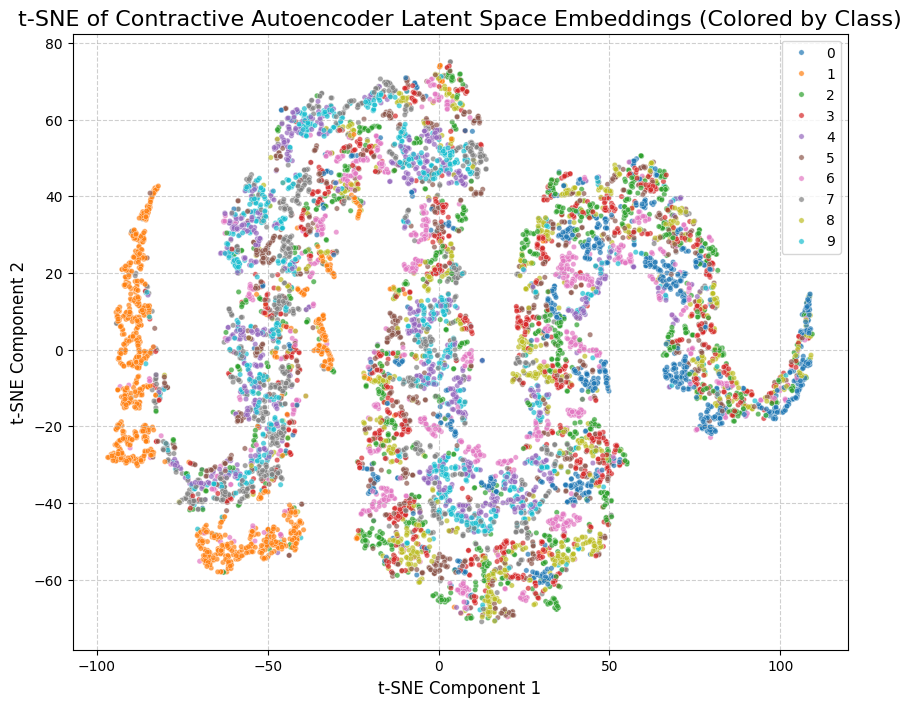

t-SNE plot for Contractive Autoencoder Latent Space generated.


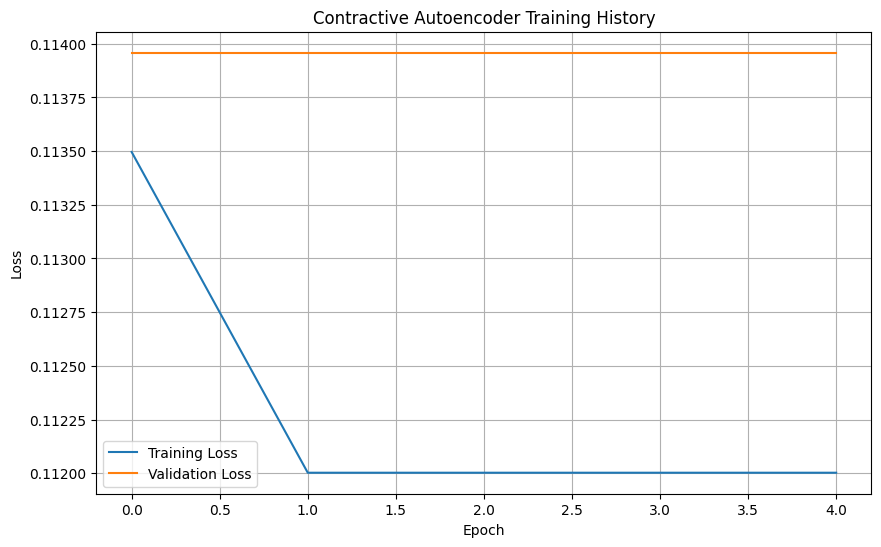


--- Visualizing Reconstructions (Contractive Autoencoder Example) ---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step


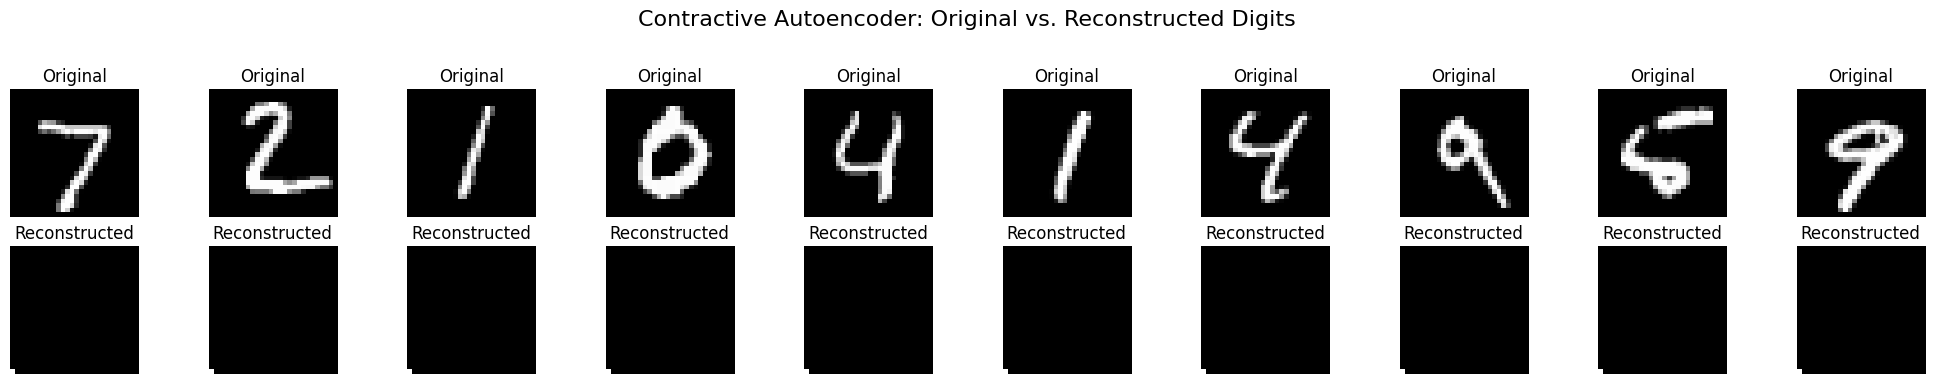


--- Running Interpolation Experiment for Contractive Autoencoder ---

Processing pair 1/20...
Selected Images: I1 (class 7), I2 (class 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


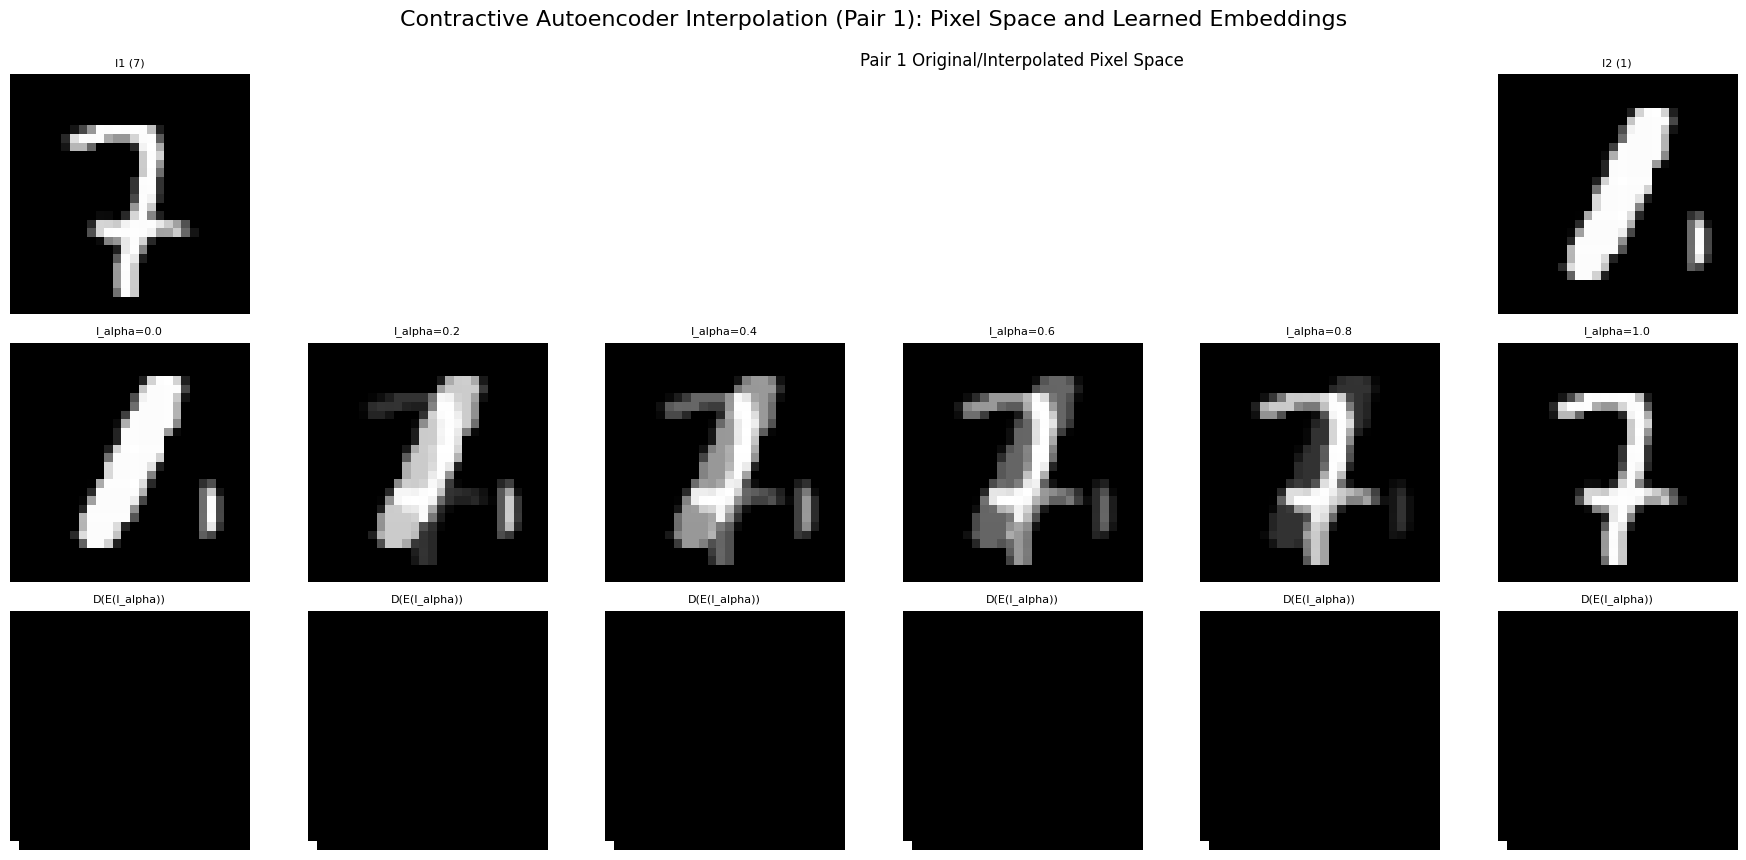

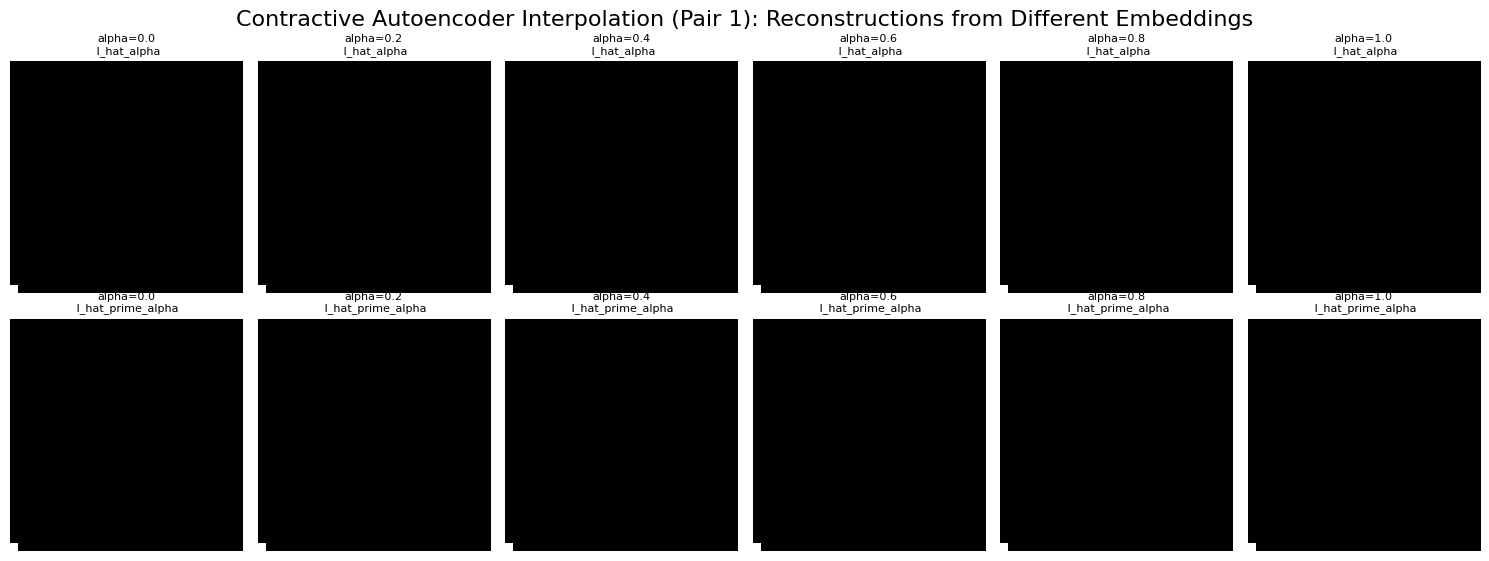


Metrics for Pair 1:
  alpha = 0.0: PSNR(I_hat_alpha, I_hat_prime_alpha) = inf dB, ||h_alpha - h_prime_alpha||_2 = 0.0000
  alpha = 0.2: PSNR(I_hat_alpha, I_hat_prime_alpha) = inf dB, ||h_alpha - h_prime_alpha||_2 = 2.3275
  alpha = 0.4: PSNR(I_hat_alpha, I_hat_prime_alpha) = 361.74 dB, ||h_alpha - h_prime_alpha||_2 = 3.6526
  alpha = 0.6: PSNR(I_hat_alpha, I_hat_prime_alpha) = 345.65 dB, ||h_alpha - h_prime_alpha||_2 = 3.7921
  alpha = 0.8: PSNR(I_hat_alpha, I_hat_prime_alpha) = 340.25 dB, ||h_alpha - h_prime_alpha||_2 = 2.5520
  alpha = 1.0: PSNR(I_hat_alpha, I_hat_prime_alpha) = inf dB, ||h_alpha - h_prime_alpha||_2 = 0.0000

Processing pair 2/20...
Selected Images: I1 (class 4), I2 (class 9)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 4

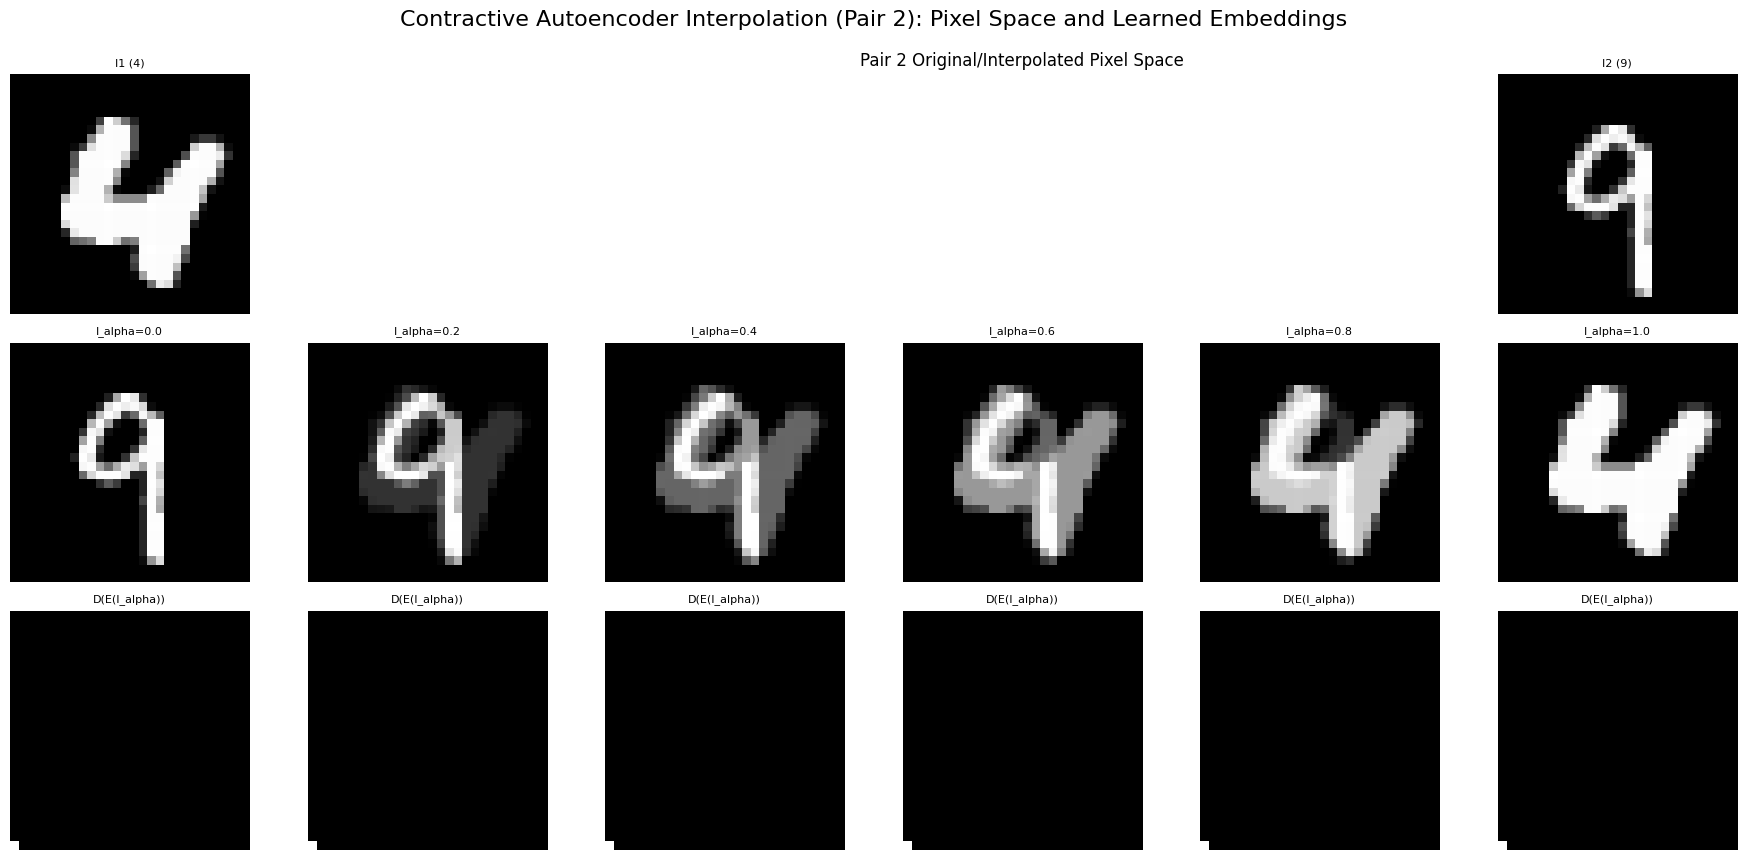

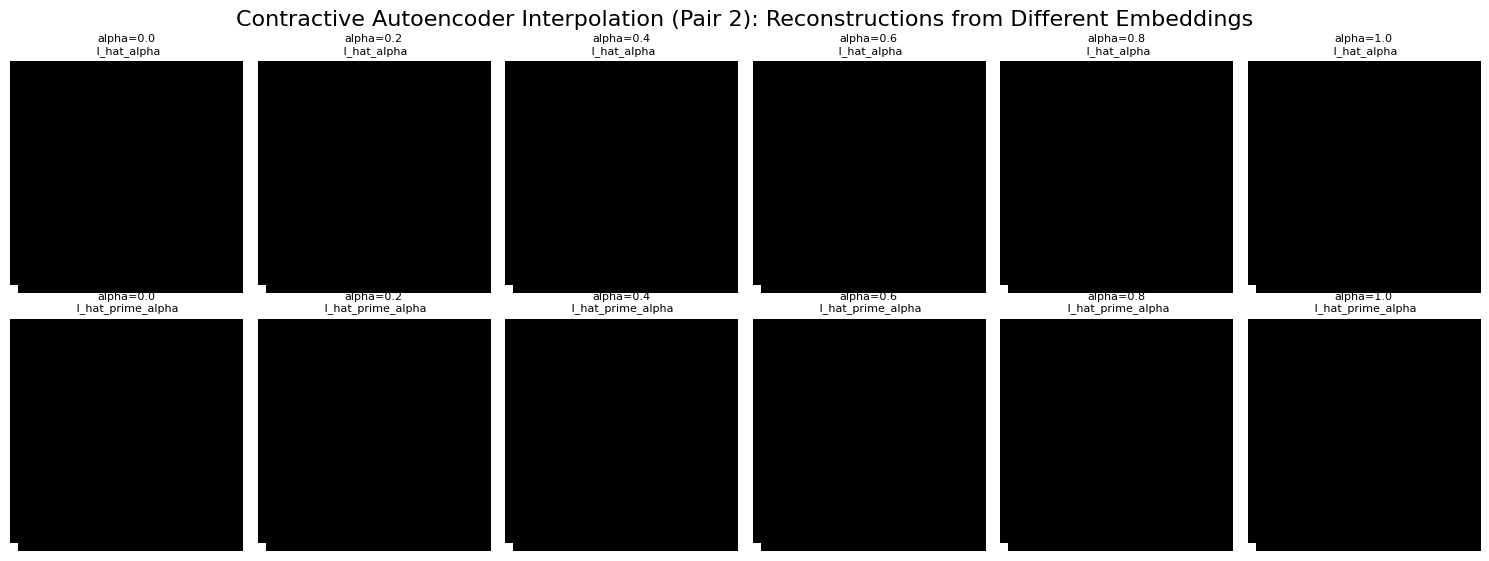


Metrics for Pair 2:
  alpha = 0.0: PSNR(I_hat_alpha, I_hat_prime_alpha) = inf dB, ||h_alpha - h_prime_alpha||_2 = 0.0000
  alpha = 0.2: PSNR(I_hat_alpha, I_hat_prime_alpha) = 358.96 dB, ||h_alpha - h_prime_alpha||_2 = 2.7909
  alpha = 0.4: PSNR(I_hat_alpha, I_hat_prime_alpha) = inf dB, ||h_alpha - h_prime_alpha||_2 = 4.0909
  alpha = 0.6: PSNR(I_hat_alpha, I_hat_prime_alpha) = inf dB, ||h_alpha - h_prime_alpha||_2 = 4.0770
  alpha = 0.8: PSNR(I_hat_alpha, I_hat_prime_alpha) = inf dB, ||h_alpha - h_prime_alpha||_2 = 2.6812
  alpha = 1.0: PSNR(I_hat_alpha, I_hat_prime_alpha) = inf dB, ||h_alpha - h_prime_alpha||_2 = 0.0000

Processing pair 3/20...
Selected Images: I1 (class 5), I2 (class 0)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/st

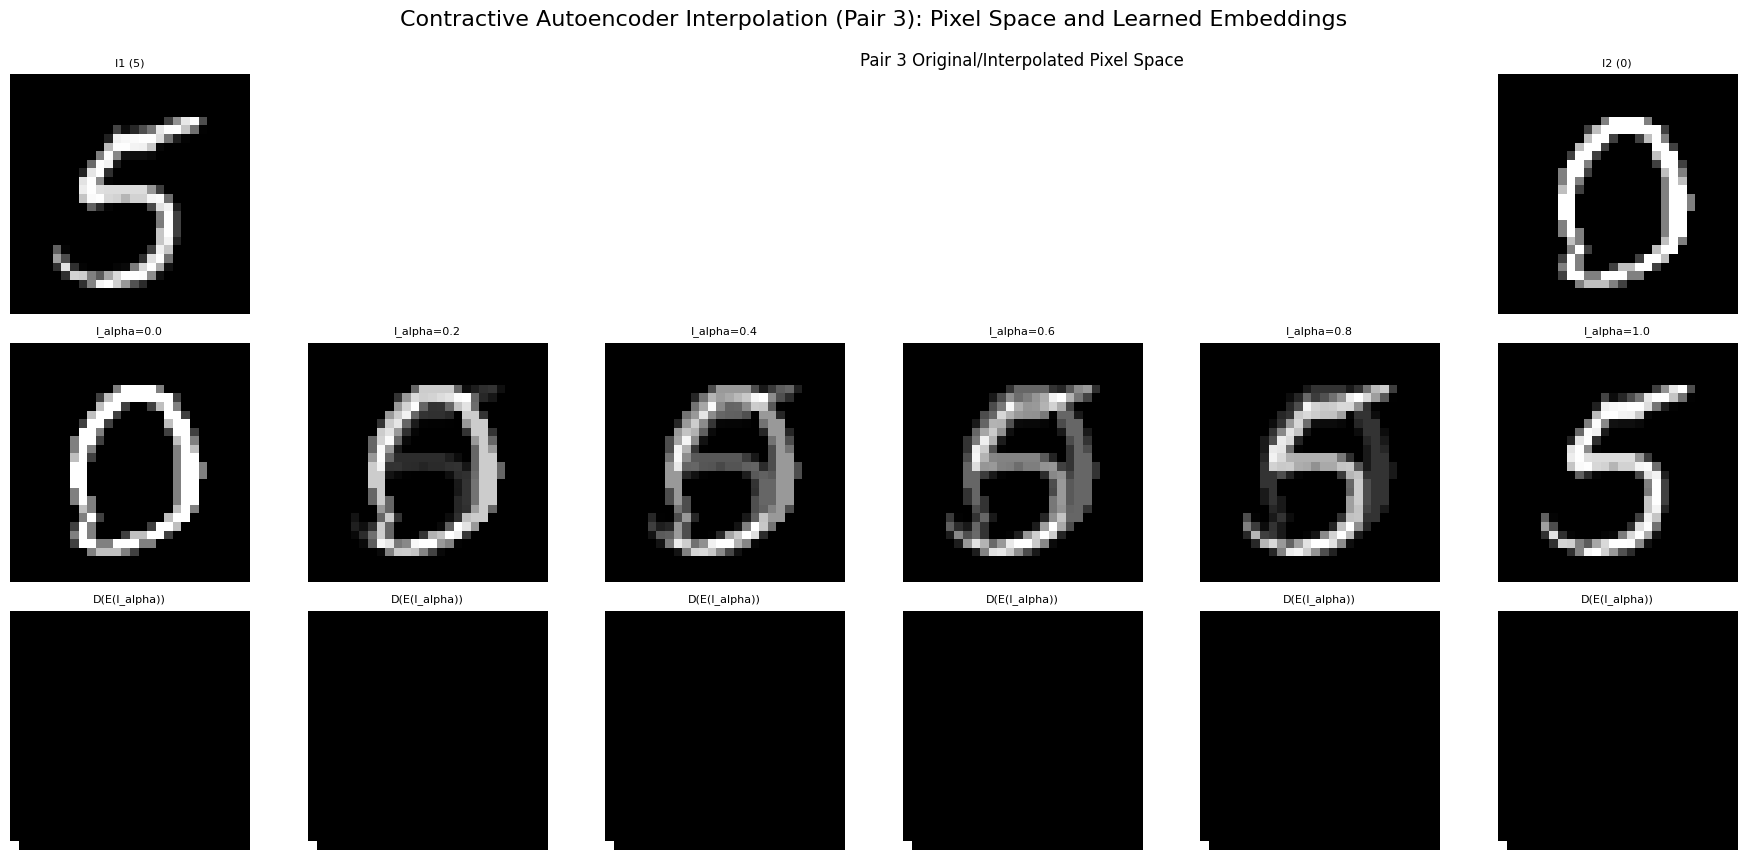

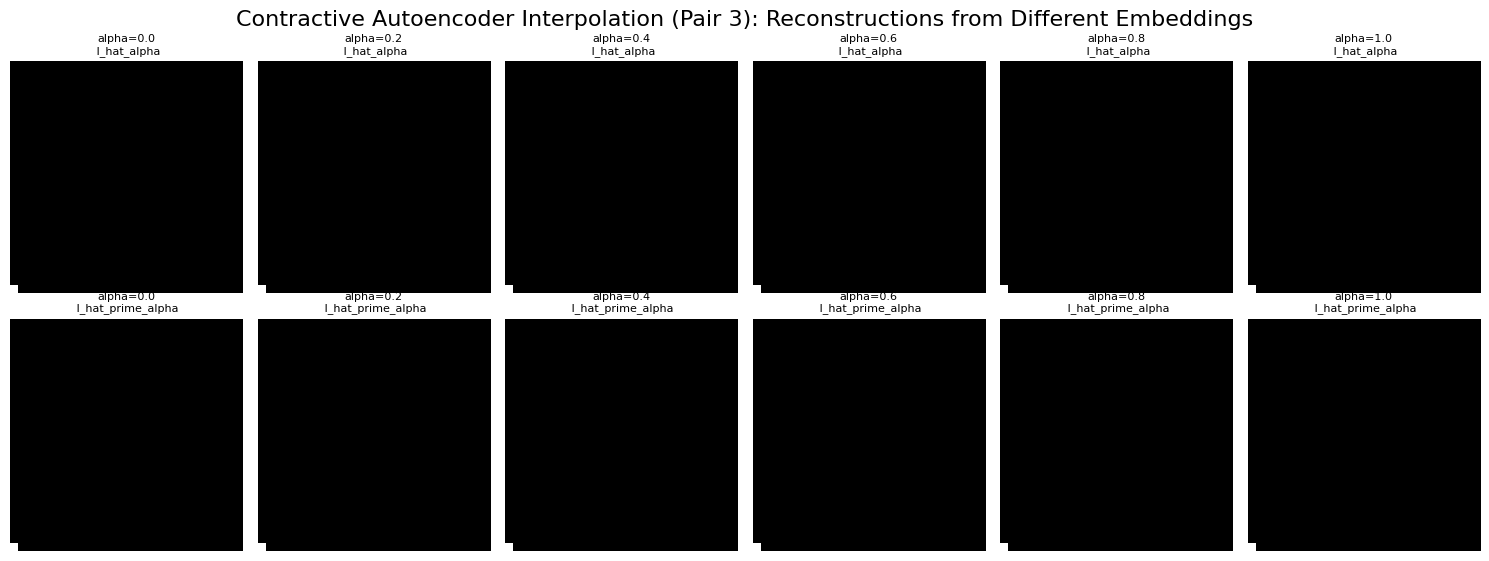


Metrics for Pair 3:
  alpha = 0.0: PSNR(I_hat_alpha, I_hat_prime_alpha) = inf dB, ||h_alpha - h_prime_alpha||_2 = 0.0000
  alpha = 0.2: PSNR(I_hat_alpha, I_hat_prime_alpha) = inf dB, ||h_alpha - h_prime_alpha||_2 = 3.3962
  alpha = 0.4: PSNR(I_hat_alpha, I_hat_prime_alpha) = 365.25 dB, ||h_alpha - h_prime_alpha||_2 = 5.5518
  alpha = 0.6: PSNR(I_hat_alpha, I_hat_prime_alpha) = 352.20 dB, ||h_alpha - h_prime_alpha||_2 = 5.8163
  alpha = 0.8: PSNR(I_hat_alpha, I_hat_prime_alpha) = 355.24 dB, ||h_alpha - h_prime_alpha||_2 = 3.8745
  alpha = 1.0: PSNR(I_hat_alpha, I_hat_prime_alpha) = inf dB, ||h_alpha - h_prime_alpha||_2 = 0.0000

Processing pair 4/20...
Selected Images: I1 (class 5), I2 (class 8)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 4

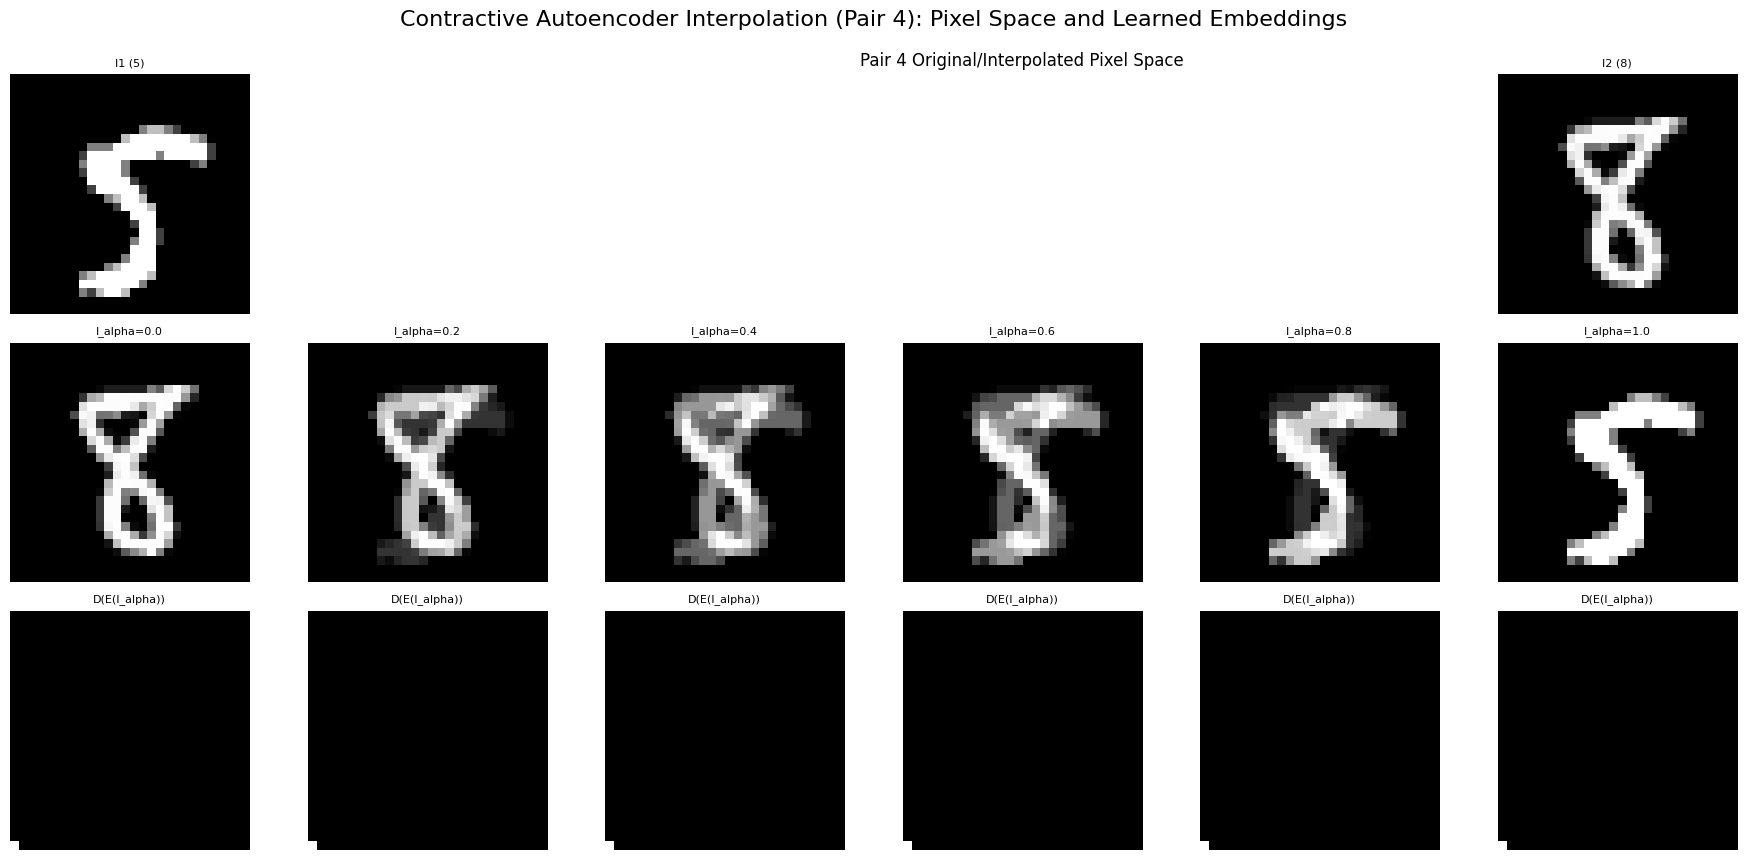

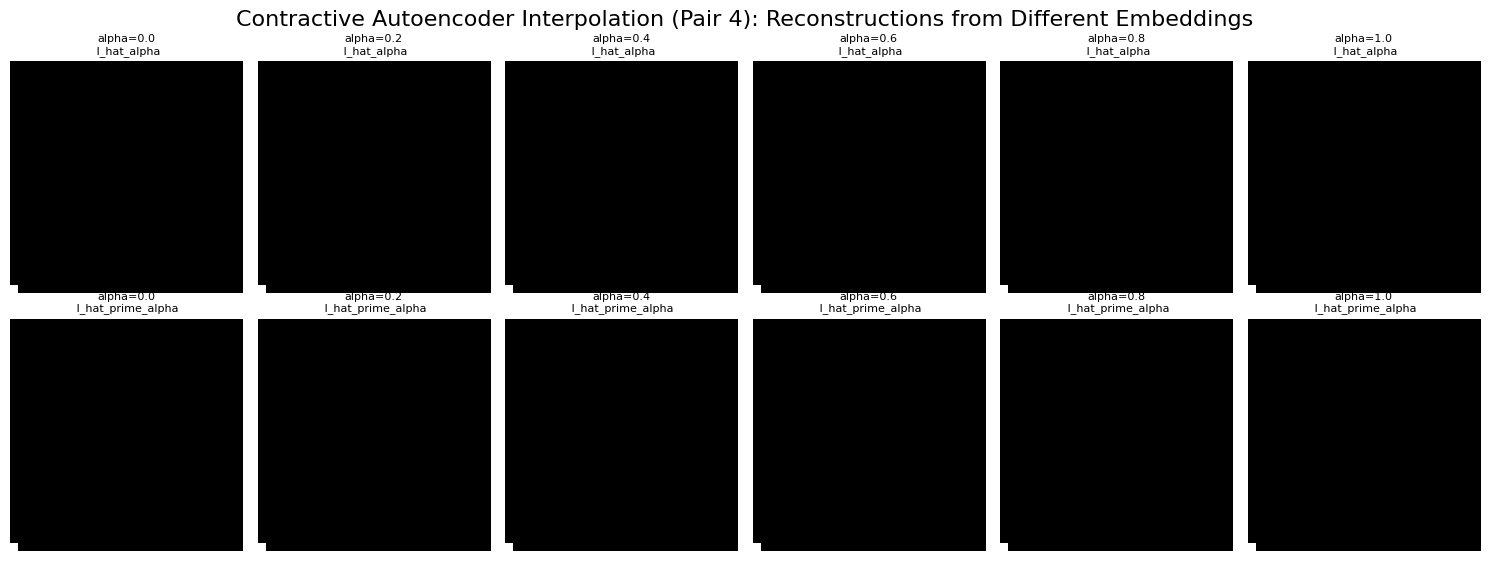


Metrics for Pair 4:
  alpha = 0.0: PSNR(I_hat_alpha, I_hat_prime_alpha) = inf dB, ||h_alpha - h_prime_alpha||_2 = 0.0000
  alpha = 0.2: PSNR(I_hat_alpha, I_hat_prime_alpha) = inf dB, ||h_alpha - h_prime_alpha||_2 = 3.4049
  alpha = 0.4: PSNR(I_hat_alpha, I_hat_prime_alpha) = inf dB, ||h_alpha - h_prime_alpha||_2 = 4.9348
  alpha = 0.6: PSNR(I_hat_alpha, I_hat_prime_alpha) = inf dB, ||h_alpha - h_prime_alpha||_2 = 4.6540
  alpha = 0.8: PSNR(I_hat_alpha, I_hat_prime_alpha) = inf dB, ||h_alpha - h_prime_alpha||_2 = 2.9510
  alpha = 1.0: PSNR(I_hat_alpha, I_hat_prime_alpha) = inf dB, ||h_alpha - h_prime_alpha||_2 = 0.0000

Processing pair 5/20...
Selected Images: I1 (class 8), I2 (class 5)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


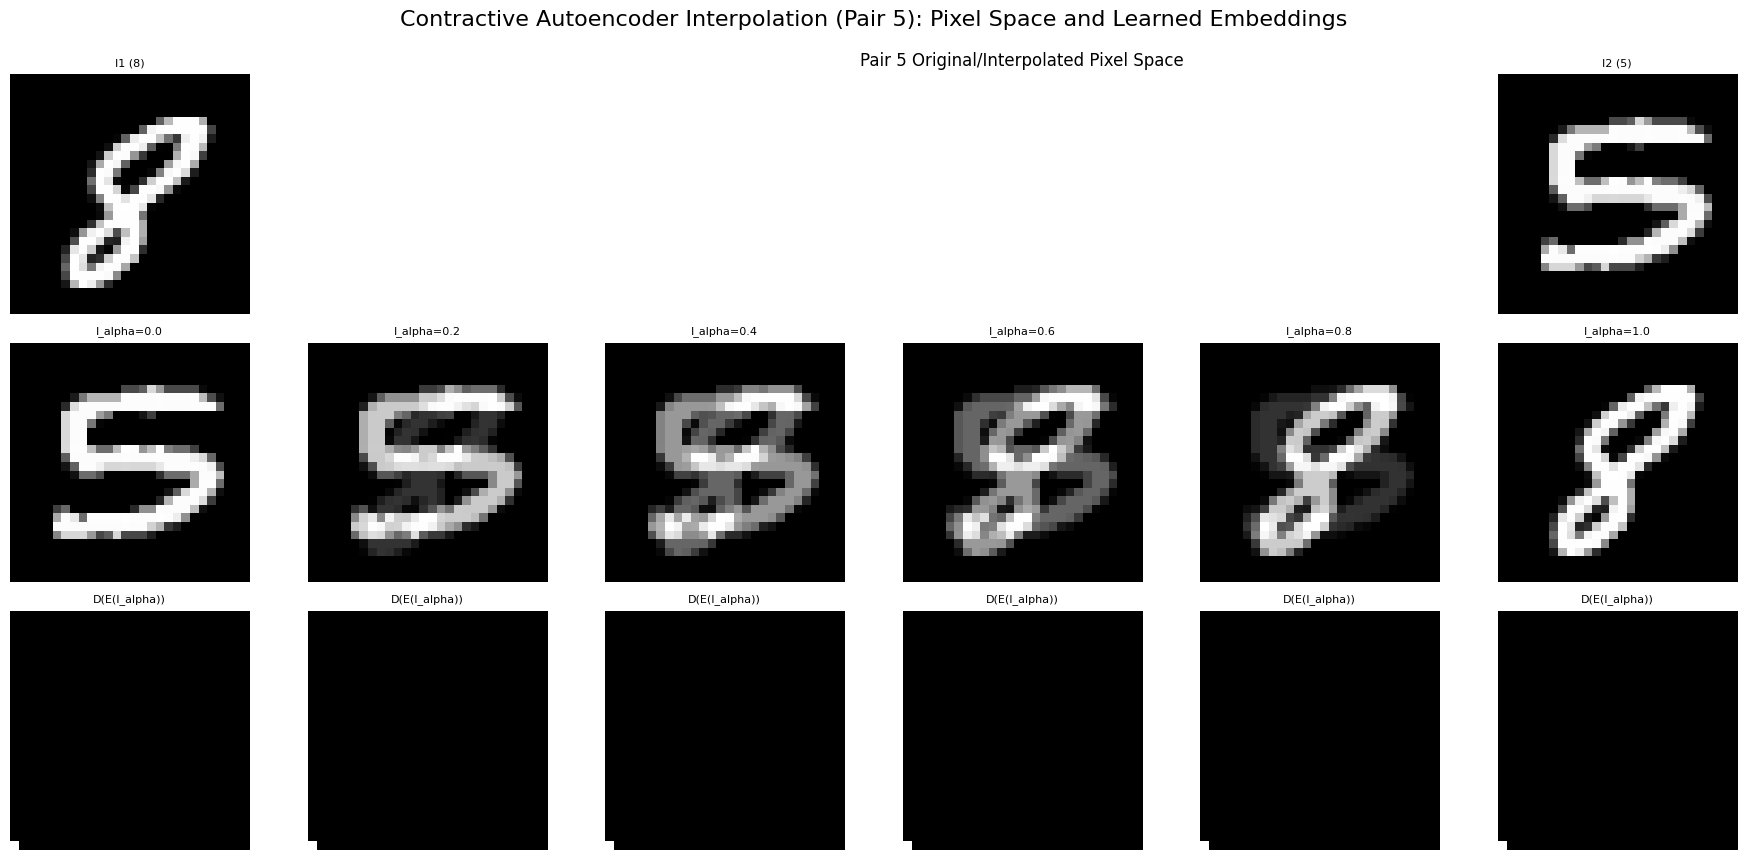

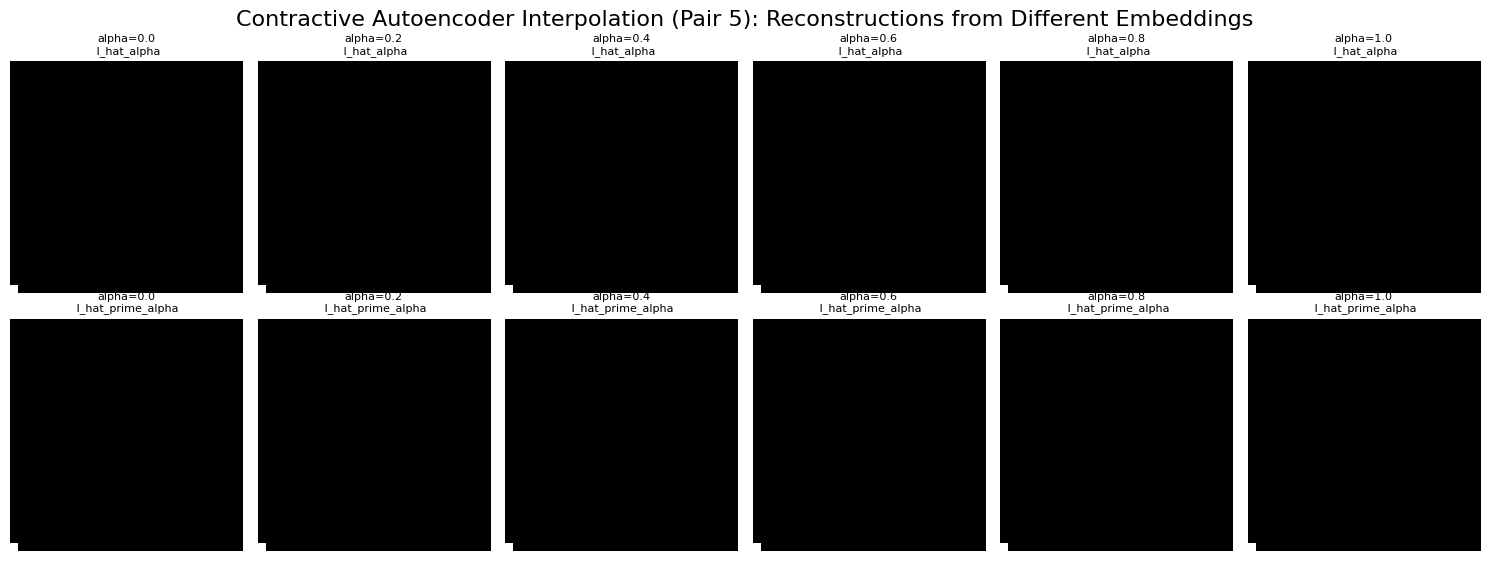


Metrics for Pair 5:
  alpha = 0.0: PSNR(I_hat_alpha, I_hat_prime_alpha) = inf dB, ||h_alpha - h_prime_alpha||_2 = 0.0000
  alpha = 0.2: PSNR(I_hat_alpha, I_hat_prime_alpha) = inf dB, ||h_alpha - h_prime_alpha||_2 = 4.3359
  alpha = 0.4: PSNR(I_hat_alpha, I_hat_prime_alpha) = inf dB, ||h_alpha - h_prime_alpha||_2 = 6.3194
  alpha = 0.6: PSNR(I_hat_alpha, I_hat_prime_alpha) = inf dB, ||h_alpha - h_prime_alpha||_2 = 6.2140
  alpha = 0.8: PSNR(I_hat_alpha, I_hat_prime_alpha) = inf dB, ||h_alpha - h_prime_alpha||_2 = 4.0408
  alpha = 1.0: PSNR(I_hat_alpha, I_hat_prime_alpha) = inf dB, ||h_alpha - h_prime_alpha||_2 = 0.0000

Processing pair 6/20...
Selected Images: I1 (class 8), I2 (class 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


KeyboardInterrupt: 

In [22]:
main_contractive_autoencoder()

Problem 1c

After training the autoencoders, you want to check if the embeddings of different digits
are different and embeddings within a class are similar.
For this purpose, you propose to perform the classification of the digits based on the embeddings obtained by the encoders and check the accuracy of classifications for each of the Auto-encoder. 
Report the classification accuracy for each of the AE and report which one is better. Use any inbuilt classifier to solve the classification problem.

Solution: 

1. Load datasets
2. Create new encoder function called build_unet_encoder_1
3. Create new dummy create_dummy_autoencoder_1
4. Create new decoder function called build_unet_decoder_1
5. Function called evaluate_embedding_classification 



In [16]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.linear_model import LogisticRegression # A simple, effective classifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier # Another option
from sklearn.svm import SVC # Support Vector Classifier, can be good

# Set a random seed for reproducibility
tf.random.set_seed(42)
np.random.seed(42)

# --- (Encoder, Decoder, Autoencoder creation and training helper functions would go here,
#      e.g., build_unet_encoder, build_unet_decoder, create_sparse_autoencoder, train_autoencoder,
#      plot_tsne_embeddings, plot_training_history, plot_reconstructions, select_random_pair,
#      generate_interpolations, run_interpolation_experiment.
#      They are not changed by this fix, so omitted for brevity but required for full code.) ---

# Example placeholder for necessary helper functions if this chunk is run standalone:
def build_unet_encoder_1(input_shape=(28, 28, 1), latent_dim=32):
    inputs = keras.Input(shape=input_shape)
    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    x = layers.MaxPooling2D((2, 2), padding='same')(x)
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D((2, 2), padding='same')(x)
    x = layers.Flatten()(x)
    e = layers.Dense(latent_dim, activation='relu')(x)
    return keras.Model(inputs, e, name='encoder')

# Placeholder for a dummy autoencoder for testing the classification part without full training
def create_dummy_autoencoder_1(input_shape, latent_dim):
    encoder = build_unet_encoder_1(input_shape, latent_dim)
    decoder = tf.keras.Model(inputs=encoder.output, outputs=layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(layers.Reshape((7,7,64))(layers.Dense(7*7*64)(encoder.output))))
    return tf.keras.Model(inputs=encoder.input, outputs=decoder(encoder.output)), encoder, decoder


def build_unet_decoder_1(latent_dim=32, output_shape=(28, 28, 1)):
    """
    Builds the decoder part of the U-Net-like autoencoder (without skip connections).
    
    Args:
        latent_dim (int): Dimensionality of the latent space embedding.
        output_shape (tuple): Desired shape of the output images.
        
    Returns:
        tf.keras.Model: The decoder model.
    """
    latent_inputs = keras.Input(shape=(latent_dim,), name='decoder_latent_input')

    # Reshape latent vector to start upsampling
    # This reshape needs to match the output shape before flattening in the encoder.
    # If the encoder's last Conv2D output before flattening was 7x7x64, then we reshape to that.
    x = layers.Dense(7 * 7 * 64, activation='relu', name='decoder_dense_from_latent')(latent_inputs)
    x = layers.Reshape((7, 7, 64), name='decoder_reshape_to_spatial')(x)

    # Decoder Pathway: Reconstructs the image from the latent representation.
    # Conv2DTranspose (or 'deconvolution') upsamples the features, and UpSampling2D increases spatial dimensions.
    
    # First upsampling to 14x14
    x = layers.Conv2DTranspose(64, (3, 3), activation='relu', padding='same', name='decoder_convT1')(x)
    x = layers.UpSampling2D((2, 2), name='decoder_upsample1')(x) # Output: 14x14x64
    
    # Second upsampling to 28x28
    x = layers.Conv2DTranspose(32, (3, 3), activation='relu', padding='same', name='decoder_convT2')(x)
    x = layers.UpSampling2D((2, 2), name='decoder_upsample2')(x) # Output: 28x28x32
    
    # Output layer: Uses a single channel (1) for grayscale image reconstruction.
    # Sigmoid activation scales pixel values to [0, 1], matching the input normalization.
    d = layers.Conv2D(output_shape[-1], (3, 3), activation='sigmoid', padding='same', name='decoder_output_reconstruction')(x) # Renamed to 'd' as per request

    return keras.Model(latent_inputs, d, name='decoder')

# --- New Function for Classification ---

def evaluate_embedding_classification(encoder_model, ae_name, train_images, train_labels, test_images, test_labels):
    """
    Evaluates the separability of embeddings by training a classifier on them.

    Args:
        encoder_model (tf.keras.Model): The trained encoder model.
        ae_name (str): Name of the autoencoder (e.g., "Sparse Autoencoder").
        train_images (np.array): Training images for the classifier.
        train_labels (np.array): Training labels for the classifier.
        test_images (np.array): Test images for the classifier.
        test_labels (np.array): Test labels for the classifier.
    """
    print(f"\n--- Evaluating Classification on {ae_name} Embeddings ---")

    # 1. Get embeddings for training and testing
    print("Extracting training embeddings...")
    train_embeddings = encoder_model.predict(train_images)
    print("Extracting test embeddings...")
    test_embeddings = encoder_model.predict(test_images)

    # 2. Train a Classifier
    # We can use Logistic Regression, K-Nearest Neighbors, or a simple SVM.
    # Logistic Regression is a good baseline for interpretability and speed.
    print("Training Logistic Regression classifier on embeddings...")
    classifier = LogisticRegression(max_iter=1000, random_state=42, n_jobs=-1) # Increased max_iter for convergence
    classifier.fit(train_embeddings, train_labels)

    # You could also try other classifiers:
    # classifier = KNeighborsClassifier(n_neighbors=5)
    # classifier.fit(train_embeddings, train_labels)

    # classifier = SVC(kernel='rbf', C=1.0, random_state=42) # SVM can be powerful but slower
    # classifier.fit(train_embeddings, train_labels)


    # 3. Evaluate Accuracy
    print("Making predictions on test embeddings...")
    test_predictions = classifier.predict(test_embeddings)
    accuracy = accuracy_score(test_labels, test_predictions)

    print(f"\nClassification Accuracy for {ae_name}: {accuracy:.4f}")
    print(f"--- Classification Evaluation for {ae_name} Completed ---")

    return accuracy

def create_sparse_autoencoder_1(input_shape=(28, 28, 1), latent_dim=64, activity_regularizer_strength=1e-5):
    """
    Creates a Sparse Autoencoder using the U-Net-like encoder and decoder.
    Applies L1 activity regularization to the latent space for sparsity.
    
    Args:
        1. Shape of the input images.
        2. Dimensionality of the latent space.
        3. Strength of the L1 activity regularizer for sparsity.
        
    Returns:
        tf.keras.Model: The Sparse Autoencoder model.
        tf.keras.Model: The encoder model (e).
        tf.keras.Model: The decoder model (d).
    """
    e = build_unet_encoder_1(input_shape, latent_dim)
    d = build_unet_decoder_1(latent_dim, input_shape)

    inputs = keras.Input(shape=input_shape, name='sparse_ae_input')
    h = e(inputs) # Get the embedding from the encoder
    
    # Apply L1 activity regularizer to the latent space for sparsity
    h = layers.ActivityRegularization(l1=activity_regularizer_strength, name='sparse_regularization')(h) 
    
    reconstruction = d(h) # Reconstruct using the decoder

    autoencoder = keras.Model(inputs, reconstruction, name='sparse_autoencoder')
    return autoencoder, e, d

def create_contractive_autoencoder_1(input_shape=(28, 28, 1), latent_dim=64):
    """
    Creates a Contractive Autoencoder structure using the U-Net-like encoder and decoder.
    
    Args:
        1. Shape of the input images.
        2. Dimensionality of the latent space.
        
    Returns:
        1. The Contractive Autoencoder model.
        2. The encoder model (e).
        3. The decoder model (d).
    """
    e = build_unet_encoder_1(input_shape, latent_dim)
    d = build_unet_decoder_1(latent_dim, input_shape)

    inputs = keras.Input(shape=input_shape, name='contractive_ae_input')
    h = e(inputs) # Get the embedding from the encoder
    reconstruction = d(h) # Reconstruct using the decoder

    autoencoder = keras.Model(inputs, reconstruction, name='contractive_autoencoder')
    
    return autoencoder, e, d

def train_autoencoder_1(model, train_data, epochs, batch_size, optimizer, loss_fn, validation_data=None):
    """
    A function for training the autoencoder.
    
    Args:
        model (tf.keras.Model): The autoencoder model to train.
        train_data (np.array): Training input data (images).
        epochs (int): Number of training epochs.
        batch_size (int): Batch size for training.
        optimizer (tf.keras.optimizers.Optimizer): Optimizer to use for training.
        loss_fn (tf.keras.losses.Loss): Loss function for training (e.g., MeanSquaredError).
        validation_data (tuple, optional): A tuple of (validation_inputs, validation_targets).
                                           For autoencoders, this is typically (val_images, val_images).
    """
    print(f"\nTraining {model.name}...")
    model.compile(optimizer=optimizer, loss=loss_fn)
    
   
    history = model.fit(
        train_data, train_data, # Autoencoders train on X, X
        epochs=epochs,
        batch_size=batch_size,
        shuffle=True,
        validation_data=(validation_data, validation_data) if validation_data is not None else None,
        verbose=1
    )
    print(f"Finished training {model.name}.")
    return history

def plot_tsne_embeddings_1(encoder_model, data, labels, title):
    """
    Plots t-SNE embeddings of the latent space, colored by ground-truth labels.
    
    Args:
        encoder_model (tf.keras.Model): The trained encoder model (e).
        data (np.array): Input images to generate embeddings from.
        labels (np.array): Ground-truth class labels for coloring the clusters.
        title (str): Title for the t-SNE plot.
    """
    print(f"\nGenerating t-SNE plot for {title}...")
    # Get embeddings (h) from the encoder
    embeddings = encoder_model.predict(data)

    # Perform t-SNE dimensionality reduction
    # Use a fixed random_state for reproducibility
    # Perplexity is sensitive, adjust if needed (usually 5 to 50)
    tsne = TSNE(n_components=2, random_state=42, perplexity=30) 
    tsne_embeddings = tsne.fit_transform(embeddings)

    # Plotting
    plt.figure(figsize=(10, 8))
    sns.scatterplot(
        x=tsne_embeddings[:, 0], y=tsne_embeddings[:, 1],
        hue=labels, # Color points by their ground-truth class label
        palette=sns.color_palette("tab10", n_colors=len(np.unique(labels))), # Use a distinct palette
        legend='full', # Show the legend for classes
        alpha=0.7, # Transparency for overlapping points
        s=15 # Marker size
    )
    plt.title(f't-SNE of {title} Embeddings (Colored by Class)', fontsize=16)
    plt.xlabel('t-SNE Component 1', fontsize=12)
    plt.ylabel('t-SNE Component 2', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()
    print(f"t-SNE plot for {title} generated.")


# --- Main Functions (modified to include classification) ---

def main_sparse_autoencoder_1():
    """
    Executes the code for the Sparse Autoencoder including the interpolation experiment
    and classification evaluation.
    """
    print("\n--- Executing Sparse Autoencoder ---")
    
    # Common training parameters
    epochs = 10
    batch_size = 128
    optimizer = keras.optimizers.Adam(learning_rate=1e-3)
    loss_fn = keras.losses.MeanSquaredError()

    # Create and train the Sparse Autoencoder
    sparse_autoencoder, e_sparse, d_sparse = create_sparse_autoencoder_1(input_shape, latent_dim, activity_regularizer_strength=1e-5)
    # Make sure create_sparse_autoencoder is defined or included
    # e_sparse here is your encoder model
    
    print("--- Starting Sparse Autoencoder training ---")
    sparse_autoencoder.compile(optimizer=optimizer, loss=loss_fn)
    sparse_autoencoder.fit(mn_train, mn_train, epochs=epochs, batch_size=batch_size,
                           shuffle=True, validation_data=(mn_test, mn_test), verbose=0) # verbose=0 to reduce training output
    print("--- Sparse Autoencoder training finished ---")

    # Run the classification evaluation
    sparse_accuracy = evaluate_embedding_classification(
        e_sparse, "Sparse Autoencoder", mn_train, mn_train_labels, mn_test, mn_test_labels
    )
    return sparse_accuracy # Return the accuracy for comparison


def main_contractive_autoencoder_1():
    """
    Executes the code for the Contractive Autoencoder including the interpolation experiment
    and classification evaluation.
    """
    print("\n--- Executing Contractive Autoencoder ---")
    
    # Common training parameters
    epochs = 10
    batch_size = 128
    optimizer = keras.optimizers.Adam(learning_rate=1e-3)
    loss_fn = keras.losses.MeanSquaredError()

    # Create and train the Contractive Autoencoder
    contractive_autoencoder, e_contractive, d_contractive = create_contractive_autoencoder_1(input_shape, latent_dim)
    # Make sure create_contractive_autoencoder is defined or included
    # e_contractive here is your encoder model

    print("--- Starting Contractive Autoencoder training ---")
    contractive_autoencoder.compile(optimizer=optimizer, loss=loss_fn)
    contractive_autoencoder.fit(mn_train, mn_train, epochs=epochs, batch_size=batch_size,
                                shuffle=True, validation_data=(mn_test, mn_test), verbose=0) # verbose=0 to reduce training output
    print("--- Contractive Autoencoder training finished ---")

    # Run the classification evaluation
    contractive_accuracy = evaluate_embedding_classification(
        e_contractive, "Contractive Autoencoder", mn_train, mn_train_labels, mn_test, mn_test_labels
    )
    return contractive_accuracy # Return the accuracy for comparison


In [17]:
# --- Main Entry Point ---
sparse_ae_accuracy = main_sparse_autoencoder_1()
contractive_ae_accuracy = main_contractive_autoencoder_1()

print("\n--- Final Comparison of Classification Accuracies ---")
print(f"Sparse Autoencoder Embedding Classification Accuracy: {sparse_ae_accuracy:.4f}")
print(f"Contractive Autoencoder Embedding Classification Accuracy: {contractive_ae_accuracy:.4f}")

if sparse_ae_accuracy > contractive_ae_accuracy:
    print("The Sparse Autoencoder's embeddings led to better classification accuracy.")
elif contractive_ae_accuracy > sparse_ae_accuracy:
    print("The Contractive Autoencoder's embeddings led to better classification accuracy.")
else:
    print("Both autoencoders' embeddings resulted in similar classification accuracies.")


--- Executing Sparse Autoencoder ---
--- Starting Sparse Autoencoder training ---


--- Sparse Autoencoder training finished ---

--- Evaluating Classification on Sparse Autoencoder Embeddings ---
Extracting training embeddings...
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step
Extracting test embeddings...
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
Training Logistic Regression classifier on embeddings...
Making predictions on test embeddings...

Classification Accuracy for Sparse Autoencoder: 0.8975
--- Classification Evaluation for Sparse Autoencoder Completed ---

--- Executing Contractive Autoencoder ---
--- Starting Contractive Autoencoder training ---
--- Contractive Autoencoder training finished ---

--- Evaluating Classification on Contractive Autoencoder Embeddings ---
Extracting training embeddings...
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step
Extracting test embeddings...
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
Training Logistic Regression classifier on embeddings...
Making predictions on test embeddings...

Classification Accuracy for Contractive Autoencoder: 